# Business Case: 

No-Churn Telecom is an established Telecom operator in Europe
with more than a decade in Business. Due to new players in the
market, telecom industry has become very competitive and
retaining customers becoming a challenge.
In spite of No-Churn initiatives of reducing tariffs and promoting
more offers, the churn rate ( percentage of customers migrating to
competitors) is well above 10%.
No-Churn wants to explore possibility of Machine Learning to help
with following use cases to retain competitive edge in the industry.

# PROJECT GOAL

Help No-Churn with their use cases with ML
1. Understanding the variables that are influencing the customers
to migrate.


2. Creating Churn risk scores that can be indicative to drive
retention campaigns.


3. Introduce new predicting variable “CHURN-FLAG” with values
YES(1) or NO(0) so that email campaigns with lucrative offers
can be targeted to Churn YES customers.
help to identify possible CHURN-FLAG YES customers and provide
more attention in customer touch point areas, including customer
care support, request fulfilment, auto categorizing tickets as high
priority for quick resolutions any questions they may have etc.,

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from matplotlib import rcParams
import os
import mysql.connector
from sqlalchemy import create_engine

In [27]:

!pip install sqlalchemy

In [2]:
from sqlalchemy import create_engine


In [2]:
## making connections to database server
connection= mysql.connector.connect(host = '18.136.157.135',
                                  user='dm_team3',
                                  password='DM!$!Team!27@9!20&')


In [3]:
## Check the number of databases available on the server
cursor=connection.cursor()
cursor.execute('show databases')
for i in cursor:
    print(i)

('information_schema',)
('project_telecom',)


In [4]:
## connecting the database
connection=mysql.connector.connect(host='18.136.157.135',
                                  user='dm_team3',
                                  password='DM!$!Team!27@9!20&',
                                  database='project_telecom')

In [5]:
db_tables=pd.read_sql_query('show tables',connection)
print(db_tables)

  Tables_in_project_telecom
0        telecom_churn_data


C:\Users\sahir\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [6]:
query = "select * from telecom_churn_data ;" # SQL statement
data = pd.read_sql(query,connection)#what Query and where to execute
print(data.shape)
data.head()

C:\Users\sahir\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


(4617, 21)


columns1 columns2 columns3   columns4 columns5 columns6 columns7 columns8  \
0       KS      128      415   382-4657       no      yes       25    265.1   
1       OH      107      415   371-7191       no      yes       26    161.6   
2       NJ      137      415   358-1921       no       no        0    243.4   
3       OH       84      408   375-9999      yes       no        0    299.4   
4       OK       75      415   330-6626      yes       no        0    166.7   

  columns9 columns10  ... columns12 columns13 columns14 columns15 columns16  \
0      110     45.07  ...        99     16.78     244.7        91     11.01   
1      123     27.47  ...       103     16.62     254.4       103     11.45   
2      114     41.38  ...       110      10.3     162.6       104      7.32   
3       71      50.9  ...        88      5.26     196.9        89      8.86   
4      113     28.34  ...       122     12.61     186.9       121      8.41   

  columns17 columns18 columns19 columns20 columns21  
0        10         3       2.7         1    False.  
1      13.7         3       3.7         1    False.  
2      12.2         5      3.29         0    False.  
3       6.6         7      1.78         2    False.  
4      10.1         3      2.73         3    False.  

[5 rows x 21 columns]

In [7]:
## Saving the  sql data in csv 

data.to_csv("data_client.csv")

In [2]:
df = pd.read_csv("data_client.csv")
df.head()

Unnamed: 0 columns1  columns2  columns3   columns4 columns5 columns6  \
0           0       KS       128       415   382-4657       no      yes   
1           1       OH       107       415   371-7191       no      yes   
2           2       NJ       137       415   358-1921       no       no   
3           3       OH        84       408   375-9999      yes       no   
4           4       OK        75       415   330-6626      yes       no   

   columns7  columns8  columns9  ...  columns12  columns13  columns14  \
0        25     265.1       110  ...         99      16.78      244.7   
1        26     161.6       123  ...        103      16.62      254.4   
2         0     243.4       114  ...        110      10.30      162.6   
3         0     299.4        71  ...         88       5.26      196.9   
4         0     166.7       113  ...        122      12.61      186.9   

   columns15  columns16  columns17  columns18  columns19  columns20  columns21  
0         91      11.01       10.0          3       2.70          1     False.  
1        103      11.45       13.7          3       3.70          1     False.  
2        104       7.32       12.2          5       3.29          0     False.  
3         89       8.86        6.6          7       1.78          2     False.  
4        121       8.41       10.1          3       2.73          3     False.  

[5 rows x 22 columns]

In [3]:
pd.set_option('display.max_columns',None)
df

Unnamed: 0 columns1  columns2  columns3   columns4 columns5 columns6  \
0              0       KS       128       415   382-4657       no      yes   
1              1       OH       107       415   371-7191       no      yes   
2              2       NJ       137       415   358-1921       no       no   
3              3       OH        84       408   375-9999      yes       no   
4              4       OK        75       415   330-6626      yes       no   
...          ...      ...       ...       ...        ...      ...      ...   
4612        4612       NY        57       510   345-7512       no      yes   
4613        4613       NM       177       408   343-6820       no      yes   
4614        4614       VT        67       408   338-4794       no      yes   
4615        4615       MI        98       415   355-8388       no      yes   
4616        4616       IN       140       415   409-6884       no       no   

      columns7  columns8  columns9  columns10  columns11  columns12  \
0           25     265.1       110      45.07      197.4         99   
1           26     161.6       123      27.47      195.5        103   
2            0     243.4       114      41.38      121.2        110   
3            0     299.4        71      50.90       61.9         88   
4            0     166.7       113      28.34      148.3        122   
...        ...       ...       ...        ...        ...        ...   
4612        25     144.0        81      24.48      187.2        112   
4613        29     189.0        91      32.13      303.1         96   
4614        33     127.5       126      21.68      296.1        129   
4615        23     168.9        98      28.71      226.3        117   
4616         0     204.7       100      34.80      126.8        107   

      columns13  columns14  columns15  columns16  columns17  columns18  \
0         16.78      244.7         91      11.01       10.0          3   
1         16.62      254.4        103      11.45       13.7          3   
2         10.30      162.6        104       7.32       12.2          5   
3          5.26      196.9         89       8.86        6.6          7   
4         12.61      186.9        121       8.41       10.1          3   
...         ...        ...        ...        ...        ...        ...   
4612      15.91      158.6        122       7.14        8.5          6   
4613      25.76      163.6        116       7.36       15.7          1   
4614      25.17      200.9         91       9.04       13.0          3   
4615      19.24      165.5         96       7.45       14.3          3   
4616      10.78      202.8        115       9.13       12.1          4   

      columns19  columns20 columns21  
0          2.70          1    False.  
1          3.70          1    False.  
2          3.29          0    False.  
3          1.78          2    False.  
4          2.73          3    False.  
...         ...        ...       ...  
4612       2.30          3    False.  
4613       4.24          3    False.  
4614       3.51          1    False.  
4615       3.86          0    False.  
4616       3.27          2    False.  

[4617 rows x 22 columns]

In [4]:
df.rename(columns={'columns1':'State','columns2':'Account_Length',
                   'columns3':'Area_code','columns4':'Phone',
                   'columns5':'International_Plan','columns6':'VMail_Plan',
                   'columns7':'VMail_Message','columns8':'Day_Mins',
                   'columns9':'Day_calls','columns10':'Day_Charge',
                   'columns11':'Eve_Mins',
                   'columns12':'Eve_calls','columns13':'Eve_Charge',
                   'columns14':'Night_Mins','columns15':'Night_Calls',
                   'columns16':'Night_Charge','columns17':'International_Mins',
                   'columns18':'International_Calls','columns19':'International_Charge',
                   'columns20':'CustServ_Calls','columns21':'Churn',
                   },inplace=True)

In [5]:
df

Unnamed: 0 State  Account_Length  Area_code      Phone  \
0              0    KS             128        415   382-4657   
1              1    OH             107        415   371-7191   
2              2    NJ             137        415   358-1921   
3              3    OH              84        408   375-9999   
4              4    OK              75        415   330-6626   
...          ...   ...             ...        ...        ...   
4612        4612    NY              57        510   345-7512   
4613        4613    NM             177        408   343-6820   
4614        4614    VT              67        408   338-4794   
4615        4615    MI              98        415   355-8388   
4616        4616    IN             140        415   409-6884   

     International_Plan VMail_Plan  VMail_Message  Day_Mins  Day_calls  \
0                    no        yes             25     265.1        110   
1                    no        yes             26     161.6        123   
2                    no         no              0     243.4        114   
3                   yes         no              0     299.4         71   
4                   yes         no              0     166.7        113   
...                 ...        ...            ...       ...        ...   
4612                 no        yes             25     144.0         81   
4613                 no        yes             29     189.0         91   
4614                 no        yes             33     127.5        126   
4615                 no        yes             23     168.9         98   
4616                 no         no              0     204.7        100   

      Day_Charge  Eve_Mins  Eve_calls  Eve_Charge  Night_Mins  Night_Calls  \
0          45.07     197.4         99       16.78       244.7           91   
1          27.47     195.5        103       16.62       254.4          103   
2          41.38     121.2        110       10.30       162.6          104   
3          50.90      61.9         88        5.26       196.9           89   
4          28.34     148.3        122       12.61       186.9          121   
...          ...       ...        ...         ...         ...          ...   
4612       24.48     187.2        112       15.91       158.6          122   
4613       32.13     303.1         96       25.76       163.6          116   
4614       21.68     296.1        129       25.17       200.9           91   
4615       28.71     226.3        117       19.24       165.5           96   
4616       34.80     126.8        107       10.78       202.8          115   

      Night_Charge  International_Mins  International_Calls  \
0            11.01                10.0                    3   
1            11.45                13.7                    3   
2             7.32                12.2                    5   
3             8.86                 6.6                    7   
4             8.41                10.1                    3   
...            ...                 ...                  ...   
4612          7.14                 8.5                    6   
4613          7.36                15.7                    1   
4614          9.04                13.0                    3   
4615          7.45                14.3                    3   
4616          9.13                12.1                    4   

      International_Charge  CustServ_Calls    Churn  
0                     2.70               1   False.  
1                     3.70               1   False.  
2                     3.29               0   False.  
3                     1.78               2   False.  
4                     2.73               3   False.  
...                    ...             ...      ...  
4612                  2.30               3   False.  
4613                  4.24               3   False.  
4614                  3.51               1   False.  
4615                  3.86               0   False.  
4616                  3.27               2   False.  

[4617

# Domain Analysis

-State: the US state in which the customer resides, indicated by a two-letter abbreviation; for example, OH or NJ

-Account Length: the number of days that this account has been active

-Area Code: the three-digit area code of the corresponding customer’s phone number

-Phone: the remaining seven-digit phone number

-VMail Plan: whether the customer has a voice mail feature: yes/no

-VMail Message: presumably the average number of voice mail messages per month

-Day Mins: the total number of calling minutes used during the day

-Day Calls: the total number of calls placed during the day

-Day Charge: the billed cost of daytime calls

-Eve Mins, Eve Calls, Eve Charge: the billed cost for calls placed during the evening

-Night Mins, Night Calls, Night Charge: the billed cost for calls placed during nighttime

-Intl Mins, Intl Calls, Intl Charge: the billed cost for international calls

-CustServ Calls: the number of calls placed to Customer Service

-Churn: whether the customer left the service: true/false

-The last attribute, Churn, is known as the target attribute–the attribute that we want the ML model to predict. Because the --target attribute is binary, our model will be performing binary prediction, also known as binary classification.

# Basic checks

In [13]:
df.head()

Unnamed: 0 State  Account_Length  Area_code      Phone International_Plan  \
0           0    KS             128        415   382-4657                 no   
1           1    OH             107        415   371-7191                 no   
2           2    NJ             137        415   358-1921                 no   
3           3    OH              84        408   375-9999                yes   
4           4    OK              75        415   330-6626                yes   

  VMail_Plan  VMail_Message  Day_Mins  Day_calls  Day_Charge  Eve_Mins  \
0        yes             25     265.1        110       45.07     197.4   
1        yes             26     161.6        123       27.47     195.5   
2         no              0     243.4        114       41.38     121.2   
3         no              0     299.4         71       50.90      61.9   
4         no              0     166.7        113       28.34     148.3   

   Eve_calls  Eve_Charge  Night_Mins  Night_Calls  Night_Charge  \
0         99       16.78       244.7           91         11.01   
1        103       16.62       254.4          103         11.45   
2        110       10.30       162.6          104          7.32   
3         88        5.26       196.9           89          8.86   
4        122       12.61       186.9          121          8.41   

   International_Mins  International_Calls  International_Charge  \
0                10.0                    3                  2.70   
1                13.7                    3                  3.70   
2                12.2                    5                  3.29   
3                 6.6                    7                  1.78   
4                10.1                    3                  2.73   

   CustServ_Calls    Churn  
0               1   False.  
1               1   False.  
2               0   False.  
3               2   False.  
4               3   False.

In [14]:
df.tail()

Unnamed: 0 State  Account_Length  Area_code      Phone  \
4612        4612    NY              57        510   345-7512   
4613        4613    NM             177        408   343-6820   
4614        4614    VT              67        408   338-4794   
4615        4615    MI              98        415   355-8388   
4616        4616    IN             140        415   409-6884   

     International_Plan VMail_Plan  VMail_Message  Day_Mins  Day_calls  \
4612                 no        yes             25     144.0         81   
4613                 no        yes             29     189.0         91   
4614                 no        yes             33     127.5        126   
4615                 no        yes             23     168.9         98   
4616                 no         no              0     204.7        100   

      Day_Charge  Eve_Mins  Eve_calls  Eve_Charge  Night_Mins  Night_Calls  \
4612       24.48     187.2        112       15.91       158.6          122   
4613       32.13     303.1         96       25.76       163.6          116   
4614       21.68     296.1        129       25.17       200.9           91   
4615       28.71     226.3        117       19.24       165.5           96   
4616       34.80     126.8        107       10.78       202.8          115   

      Night_Charge  International_Mins  International_Calls  \
4612          7.14                 8.5                    6   
4613          7.36                15.7                    1   
4614          9.04                13.0                    3   
4615          7.45                14.3                    3   
4616          9.13                12.1                    4   

      International_Charge  CustServ_Calls    Churn  
4612                  2.30               3   False.  
4613                  4.24               3   False.  
4614                  3.51               1   False.  
4615                  3.86               0   False.  
4616                  3.27               2   False.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4617 non-null   int64  
 1   State                 4617 non-null   object 
 2   Account_Length        4617 non-null   int64  
 3   Area_code             4617 non-null   int64  
 4   Phone                 4617 non-null   object 
 5   International_Plan    4617 non-null   object 
 6   VMail_Plan            4617 non-null   object 
 7   VMail_Message         4617 non-null   int64  
 8   Day_Mins              4617 non-null   float64
 9   Day_calls             4617 non-null   int64  
 10  Day_Charge            4617 non-null   float64
 11  Eve_Mins              4617 non-null   float64
 12  Eve_calls             4617 non-null   int64  
 13  Eve_Charge            4617 non-null   float64
 14  Night_Mins            4617 non-null   float64
 15  Night_Calls          

In [16]:
df.describe()

Unnamed: 0  Account_Length    Area_code  VMail_Message     Day_Mins  \
count  4617.000000     4617.000000  4617.000000    4617.000000  4617.000000   
mean   2308.000000      100.645224   437.046350       7.849903   180.447152   
std    1332.957426       39.597194    42.288212      13.592333    53.983540   
min       0.000000        1.000000   408.000000       0.000000     0.000000   
25%    1154.000000       74.000000   408.000000       0.000000   143.700000   
50%    2308.000000      100.000000   415.000000       0.000000   180.000000   
75%    3462.000000      127.000000   510.000000      17.000000   216.800000   
max    4616.000000      243.000000   510.000000      51.000000   351.500000   

         Day_calls   Day_Charge     Eve_Mins    Eve_calls   Eve_Charge  \
count  4617.000000  4617.000000  4617.000000  4617.000000  4617.000000   
mean    100.054364    30.676576   200.429088   100.179770    17.036703   
std      19.883027     9.177145    50.557001    19.821314     4.297332   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      87.000000    24.430000   165.900000    87.000000    14.100000   
50%     100.000000    30.600000   200.800000   101.000000    17.070000   
75%     113.000000    36.860000   234.000000   114.000000    19.890000   
max     165.000000    59.760000   363.700000   170.000000    30.910000   

        Night_Mins  Night_Calls  Night_Charge  International_Mins  \
count  4617.000000  4617.000000   4617.000000         4617.000000   
mean    200.623933    99.944120      9.028185           10.279294   
std      50.543616    19.935053      2.274488            2.757361   
min      23.200000    12.000000      1.040000            0.000000   
25%     167.100000    87.000000      7.520000            8.600000   
50%     200.800000   100.000000      9.040000           10.300000   
75%     234.900000   113.000000     10.570000           12.100000   
max     395.000000   175.000000     17.770000           20.000000   

       International_Calls  International_Charge  CustServ_Calls  
count          4617.000000           4617.000000     4617.000000  
mean              4.433831              2.775926        1.567035  
std               2.457615              0.744413        1.307019  
min               0.000000              0.000000        0.000000  
25%               3.000000              2.320000        1.000000  
50%               4.000000              2.780000        1.000000  
75%               6.000000              3.270000        2.000000  
max              20.000000              5.400000        9.000000

In [21]:
df.describe(include='O')

State      Phone International_Plan VMail_Plan    Churn
count   4617       4617               4617       4617     4617
unique    51       4617                  2          2        2
top       WV   382-4657                 no         no   False.
freq     149          1               4171       3381     3961

In [18]:
df.dtypes

Unnamed: 0                int64
State                    object
Account_Length            int64
Area_code                 int64
Phone                    object
International_Plan       object
VMail_Plan               object
VMail_Message             int64
Day_Mins                float64
Day_calls                 int64
Day_Charge              float64
Eve_Mins                float64
Eve_calls                 int64
Eve_Charge              float64
Night_Mins              float64
Night_Calls               int64
Night_Charge            float64
International_Mins      float64
International_Calls       int64
International_Charge    float64
CustServ_Calls            int64
Churn                    object
dtype: object

In [23]:
df.isnull().sum()

Unnamed: 0              0
State                   0
Account_Length          0
Area_code               0
Phone                   0
International_Plan      0
VMail_Plan              0
VMail_Message           0
Day_Mins                0
Day_calls               0
Day_Charge              0
Eve_Mins                0
Eve_calls               0
Eve_Charge              0
Night_Mins              0
Night_Calls             0
Night_Charge            0
International_Mins      0
International_Calls     0
International_Charge    0
CustServ_Calls          0
Churn                   0
dtype: int64

In [19]:
# Frequency tables for each categorical feature
for column in df.select_dtypes(include=['object']).columns:
    display(pd.crosstab(index=df[column], columns='% observations', normalize='columns'))

col_0  % observations
State                
AK           0.014945
AL           0.024691
AR           0.016677
AZ           0.017544
CA           0.009530
CO           0.019710
CT           0.019926
DC           0.017760
DE           0.019277
FL           0.018410
GA           0.016677
HI           0.017111
IA           0.014078
ID           0.023825
IL           0.017111
IN           0.019277
KS           0.020793
KY           0.019493
LA           0.015811
MA           0.021009
MD           0.019926
ME           0.020576
MI           0.021226
MN           0.024258
MO           0.018194
MS           0.019710
MT           0.019926
NC           0.017977
ND           0.017327
NE           0.017111
NH           0.019710
NJ           0.022959
NM           0.018194
NV           0.019277
NY           0.023608
OH           0.023825
OK           0.017327
OR           0.023175
PA           0.014728
RI           0.019493
SC           0.017977
SD           0.016461
TN           0.017977
TX           0.022742
UT           0.022525
VA           0.023608
VT           0.020576
WA           0.019277
WI           0.021442
WV           0.032272
WY           0.022959

col_0      % observations
Phone                    
 327-1058        0.000217
 327-1319        0.000217
 327-2040        0.000217
 327-2475        0.000217
 327-3053        0.000217
...                   ...
 422-8333        0.000217
 422-8344        0.000217
 422-8472        0.000217
 422-9831        0.000217
 422-9964        0.000217

[4617 rows x 1 columns]

col_0               % observations
International_Plan                
 no                         0.9034
 yes                        0.0966

col_0       % observations
VMail_Plan                
 no               0.732294
 yes              0.267706

col_0    % observations
Churn                  
 False.        0.857916
 True.         0.142084

## We can see immediately that:

-State appears to be quite evenly distributed

-Phone takes on too many unique values to be of any practical use. It's possible parsing out the prefix could have some value, but without more context on how these are allocated, we should avoid using it.

-Only 14% of customers churned, so there is some class imabalance, but nothing extreme.

-Most of the numeric features are surprisingly nicely distributed, with many showing bell-like gaussianity. VMail Message being a notable exception (and --Area Code showing up as a feature we should convert to non-numeric).

-WV(West Virginia) is the state with highest number of customer resides. 

-Most of the cusotmers donot have International and Vmail Plans.

# EDA

In [22]:
df.head(2)

Unnamed: 0 State  Account_Length  Area_code      Phone International_Plan  \
0           0    KS             128        415   382-4657                 no   
1           1    OH             107        415   371-7191                 no   

  VMail_Plan  VMail_Message  Day_Mins  Day_calls  Day_Charge  Eve_Mins  \
0        yes             25     265.1        110       45.07     197.4   
1        yes             26     161.6        123       27.47     195.5   

   Eve_calls  Eve_Charge  Night_Mins  Night_Calls  Night_Charge  \
0         99       16.78       244.7           91         11.01   
1        103       16.62       254.4          103         11.45   

   International_Mins  International_Calls  International_Charge  \
0                10.0                    3                   2.7   
1                13.7                    3                   3.7   

   CustServ_Calls    Churn  
0               1   False.  
1               1   False.

## State

In [30]:
import sweetviz as sv #  library for univariant analysis

my_report = sv.analyze(df)## pass the original dataframe

#my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Dashborad


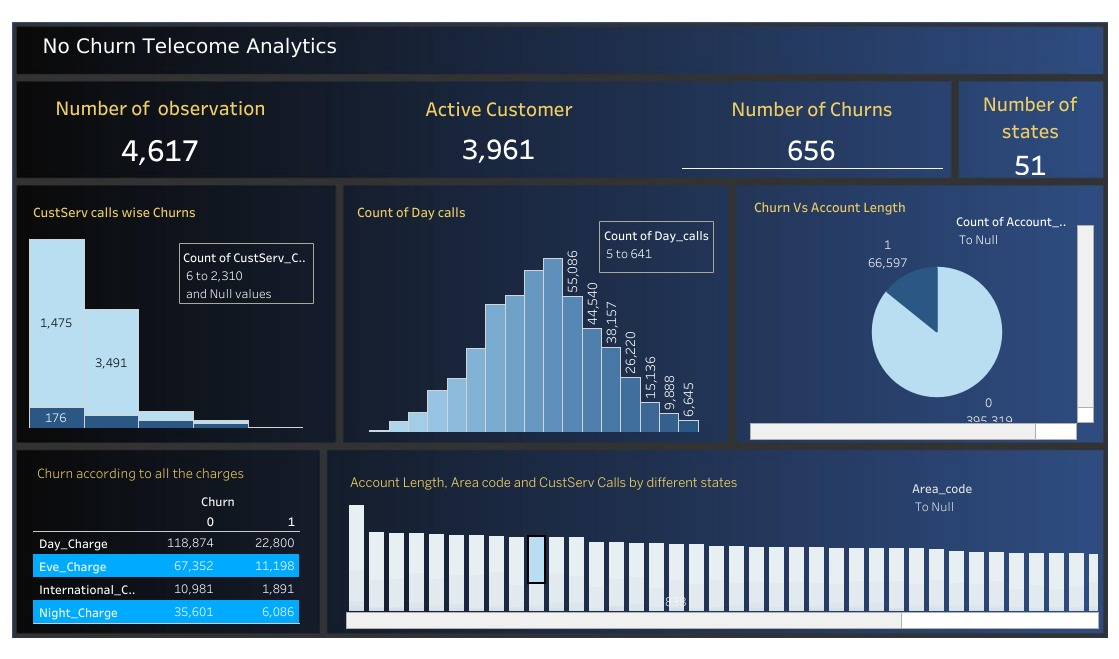

In [31]:
df.head(2)

Unnamed: 0 State  Account_Length  Area_code      Phone International_Plan  \
0           0    KS             128        415   382-4657                 no   
1           1    OH             107        415   371-7191                 no   

  VMail_Plan  VMail_Message  Day_Mins  Day_calls  Day_Charge  Eve_Mins  \
0        yes             25     265.1        110       45.07     197.4   
1        yes             26     161.6        123       27.47     195.5   

   Eve_calls  Eve_Charge  Night_Mins  Night_Calls  Night_Charge  \
0         99       16.78       244.7           91         11.01   
1        103       16.62       254.4          103         11.45   

   International_Mins  International_Calls  International_Charge  \
0                10.0                    3                   2.7   
1                13.7                    3                   3.7   

   CustServ_Calls    Churn  
0               1   False.  
1               1   False.

### univariate analysis

- Sates :It has 51 distinct values

- Account_Length :account length ranges from min 1 to max 243 value. Account length forms a normal distribution.1.4% of the values belong to 90 which is he highest.

- Area_code : Area code has 3 distinct values that are 415, 408 and 510. Where 50% of the area code is 415.

- Phone :Phone number all the values are unquie.

- International Plan :It has 2 distinct values yes and no. Where 90% of the values are no which means 90% of the customers do not have international plans, but 10% have international plan.

- VMail_Plan : It has 2 distinct values yes and no. Where 73% of the values are no which means 73% of the customers do not have Voice Mail Plan , only 27% have Voice Mail plan.

- Voice Mail Message :Voice Mail Message ranges from min 0 to max 51 value. The distribution is skewed with 0.124 of kurtosis. Here 73.2% of the values are 0 which is the highest.

- Day_Mins : It ranges from 0 to 352 with 2 zero values. It is negativly skewed with -0.042 kurtosis.

- day_calls - It has a negative skewness of -0.081 and a range between 0-165 also with a kurtosis of 0.196

- Day_Charge - It has a negative skewness of -0.003 and a range between 0-59.8 also with a kurtosis of -0.042

- Eve_Mins -  It has a negative skewness of -0.005 and a range between 0-364 also with a kurtosis of 0.044

- Eve_calls -  It has a negative skewness of -0.018 and a range between 0-170 also with a kurtosis of 0.136

- Eve_Charge -  It has a negative skewness of -0.005 and a range between 0-30.9 also with a kurtosis of 0.044

- Night_Mins -  It has a positive skewness of 0.021 and a range between 23-395 also with a kurtosis of 0.061

- Night_Calls - It has a positive skewness of 0.031 and a range between 12-175 also with a kurtosis of 0.069

- Night_Charge - It has a positive skewness of 0.021 and a range between 1-17.8 also with a kurtosis of 0.061

- International_Mins - It has a negative skewness of -0.221 and a range between 0-20 also with a kurtosis of 0.672

- International_Calls - It has a positive skewness of 1.37 and a range between 0-20 also with a kurtosis of 3.30

- International_Charge - It has a negative skewness of -0.221 and a range between 0-5.40 also with a kurtosis of 0.673

- CustServ_Calls - It is a categorical data with 10 distinct values 

- Churn - It is the output variable with 2 distinct values:'true' and 'false'. We can aslo say that the variable is highly imbalanced with more than 80% data in False category

 



In [71]:
df.columns

Index(['Unnamed: 0', 'State', 'Account_Length', 'Area_code', 'Phone',
       'International_Plan', 'VMail_Plan', 'VMail_Message', 'Day_Mins',
       'Day_calls', 'Day_Charge', 'Eve_Mins', 'Eve_calls', 'Eve_Charge',
       'Night_Mins', 'Night_Calls', 'Night_Charge', 'International_Mins',
       'International_Calls', 'International_Charge', 'CustServ_Calls',
       'Churn'],
      dtype='object')

In [44]:
num=df[['Account_Length','VMail_Message','Day_Mins','Day_calls','Day_Charge',
                  'Eve_Mins','Eve_calls','Eve_Charge','Night_Mins','Night_Calls','Night_Charge',
                  'International_Mins','International_Calls','International_Charge','CustServ_Calls']]

In [45]:
num.head(2)

Account_Length  VMail_Message  Day_Mins  Day_calls  Day_Charge  Eve_Mins  \
0             128             25     265.1        110       45.07     197.4   
1             107             26     161.6        123       27.47     195.5   

   Eve_calls  Eve_Charge  Night_Mins  Night_Calls  Night_Charge  \
0         99       16.78       244.7           91         11.01   
1        103       16.62       254.4          103         11.45   

   International_Mins  International_Calls  International_Charge  \
0                10.0                    3                   2.7   
1                13.7                    3                   3.7   

   CustServ_Calls  
0               1  
1               1

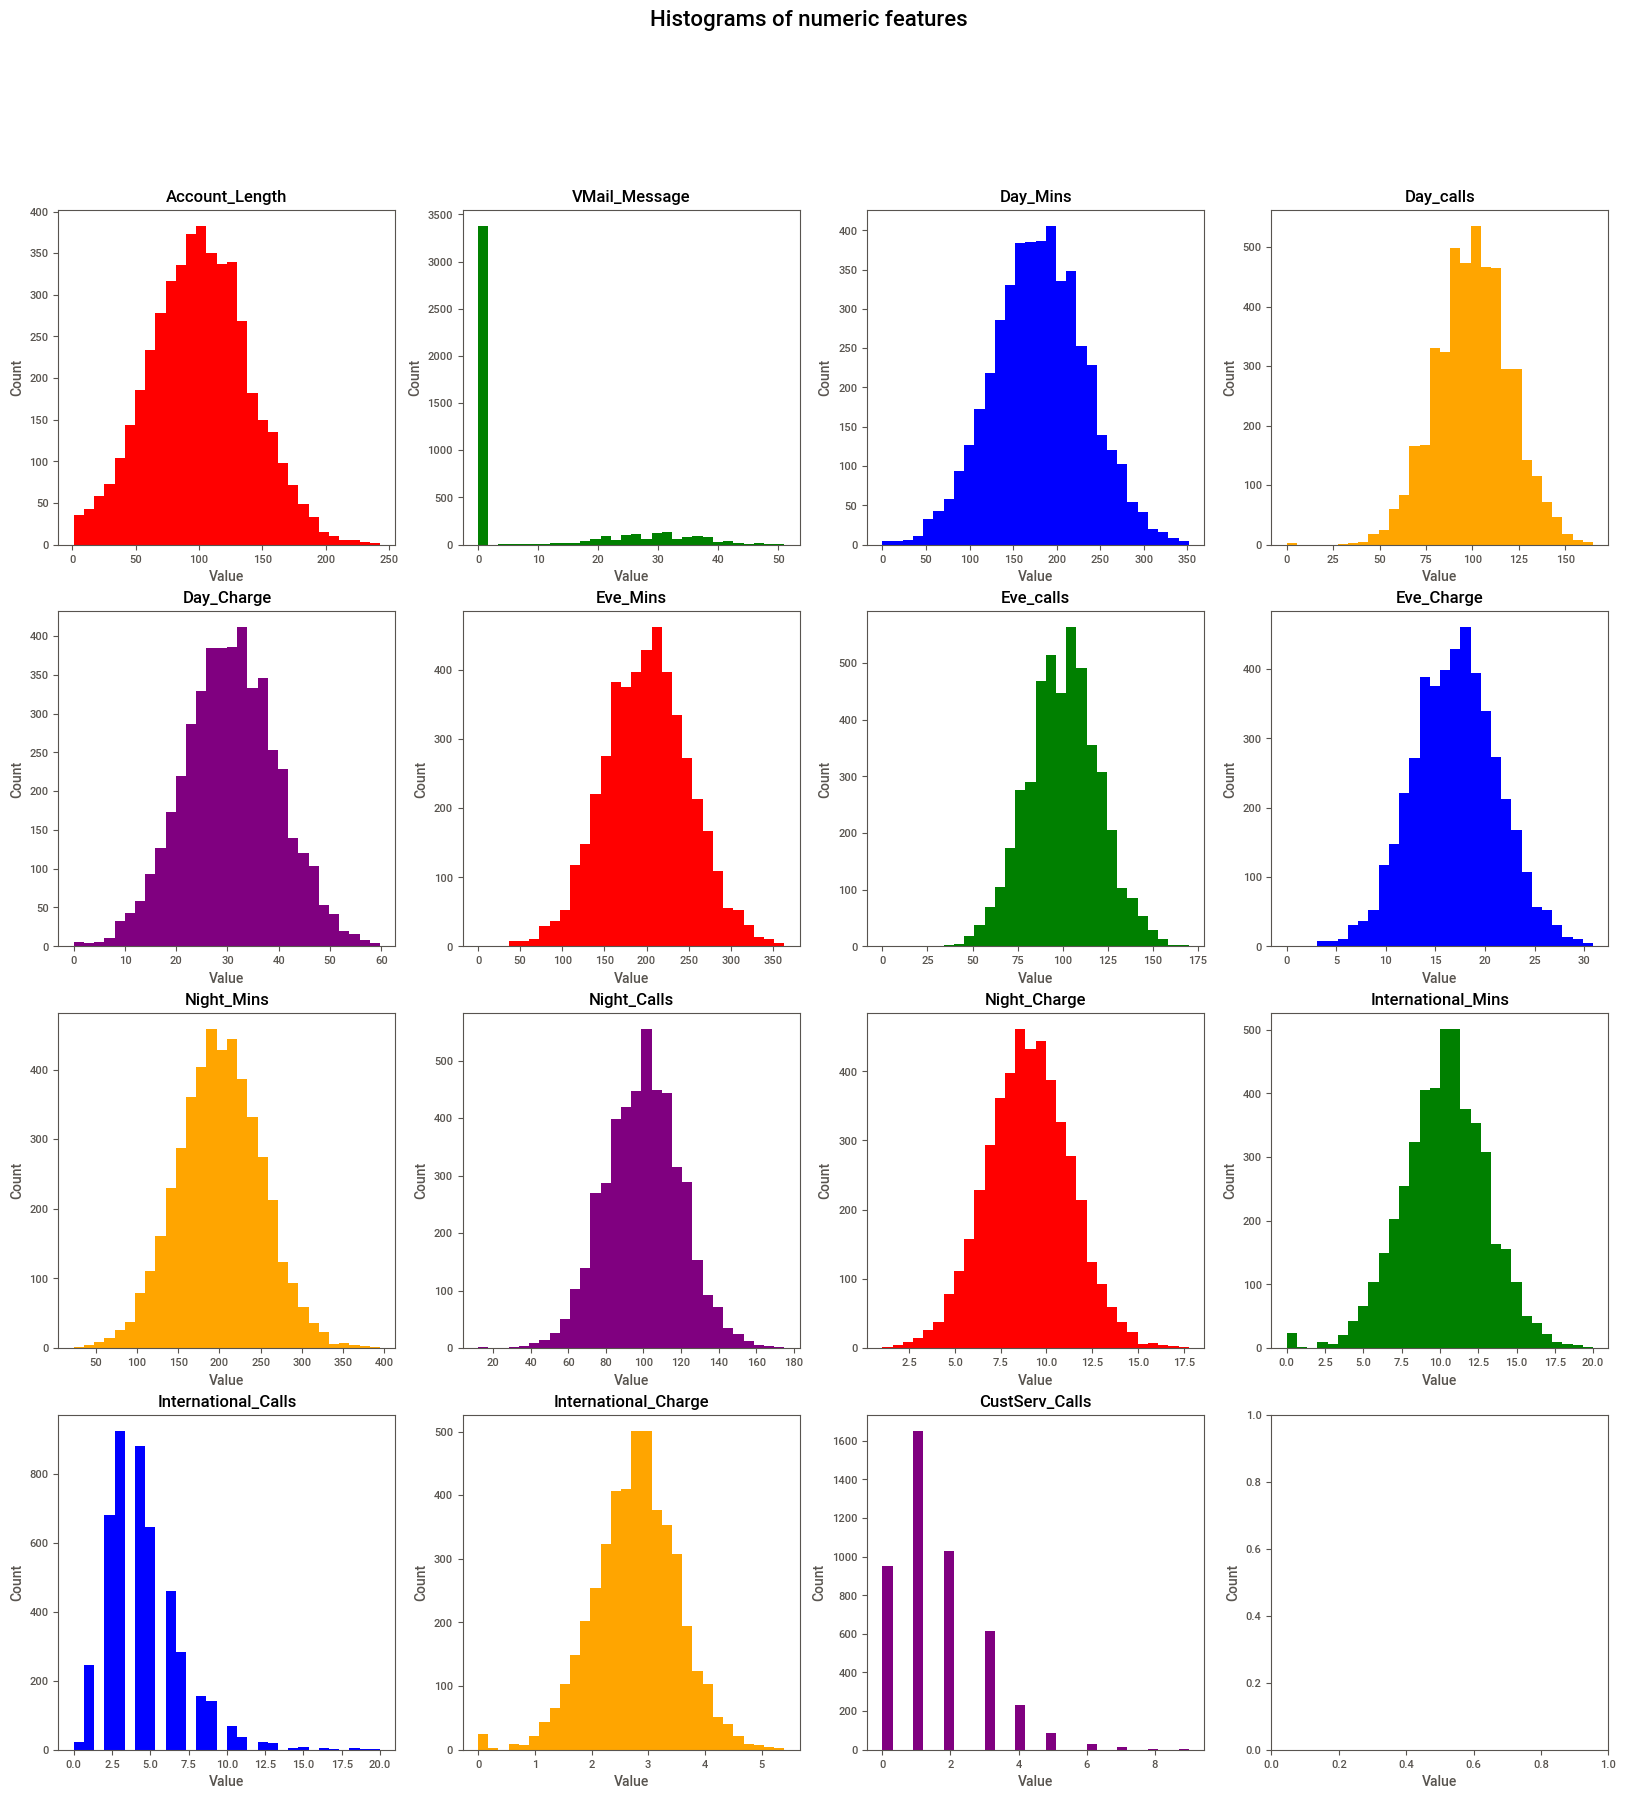

In [51]:
import matplotlib.pyplot as plt

# Define the colors for the histograms
colors = ['red', 'green', 'blue', 'orange', 'purple']

# Repeat the colors if necessary
while len(colors) < len(df.columns):
    colors = colors * 2

# Generate the histograms
num_cols = len(num.columns)
num_rows = int(num_cols/4) + (num_cols % 4 > 0)
fig, axs = plt.subplots(nrows=num_rows, ncols=4, figsize=(20, 5*num_rows))
for i, col in enumerate(num.columns):
    row_index = int(i/4)
    col_index = i % 4
    axs[row_index, col_index].hist(num[col], bins=30, color=colors[i])
    axs[row_index, col_index].set_title(col)

# Set the labels and titles for the plots
fig.suptitle('Histograms of numeric features', fontsize=16)
for ax in axs.flat:
    ax.set_xlabel("Value")
    ax.set_ylabel("Count")

# Show the plot
plt.show()







- International_Mins and International_Charge are almost normally distributed

### Bivariate Analysis on data

In [53]:

d1=df[['State','Phone','International_Plan','VMail_Plan']]
d2=df[['Account_Length','Area_code','VMail_Message','Day_Mins','Day_calls','Day_Charge','Eve_Mins','Eve_calls','Eve_Charge','Night_Mins','Night_Calls','Night_Charge','International_Mins','International_Calls','International_Charge','CustServ_Calls']]

In [55]:
d1.dtypes

State                 object
Phone                 object
International_Plan    object
VMail_Plan            object
dtype: object

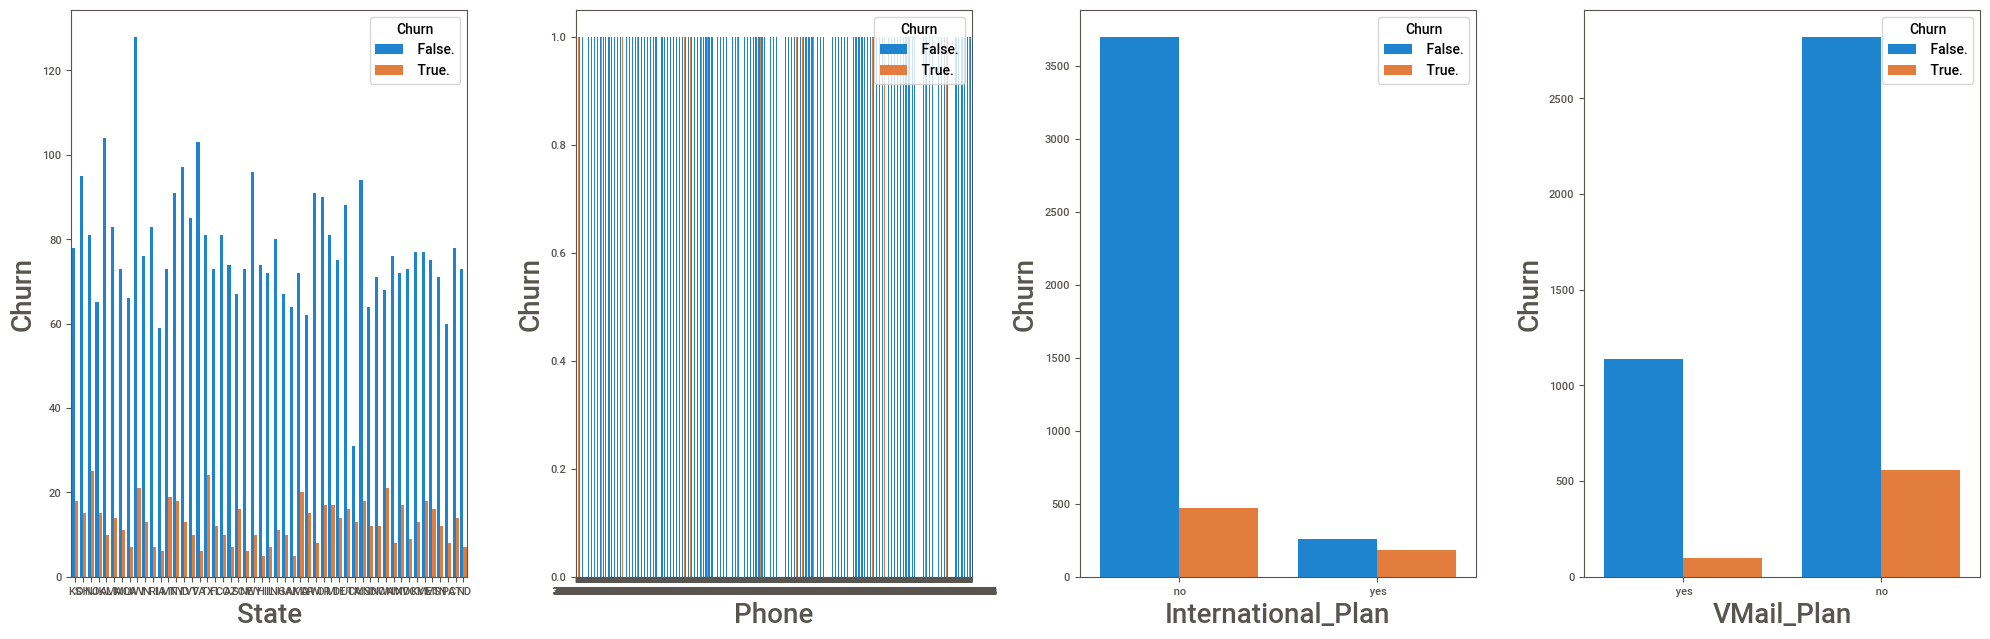

In [57]:
plt.figure(figsize=(20,25), facecolor='white')#To set canvas 
plotnumber = 1 #counter

for column in d1:#accessing the columns 
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.countplot(x=d1[column],hue=df['Churn'])
        plt.xlabel(column,fontsize=20)#assign name to x-axis and set font-20
        plt.ylabel('Churn',fontsize=20)
    plotnumber+=1#counter increment
plt.tight_layout()


- There is no direct relationship between the categorical and target variable

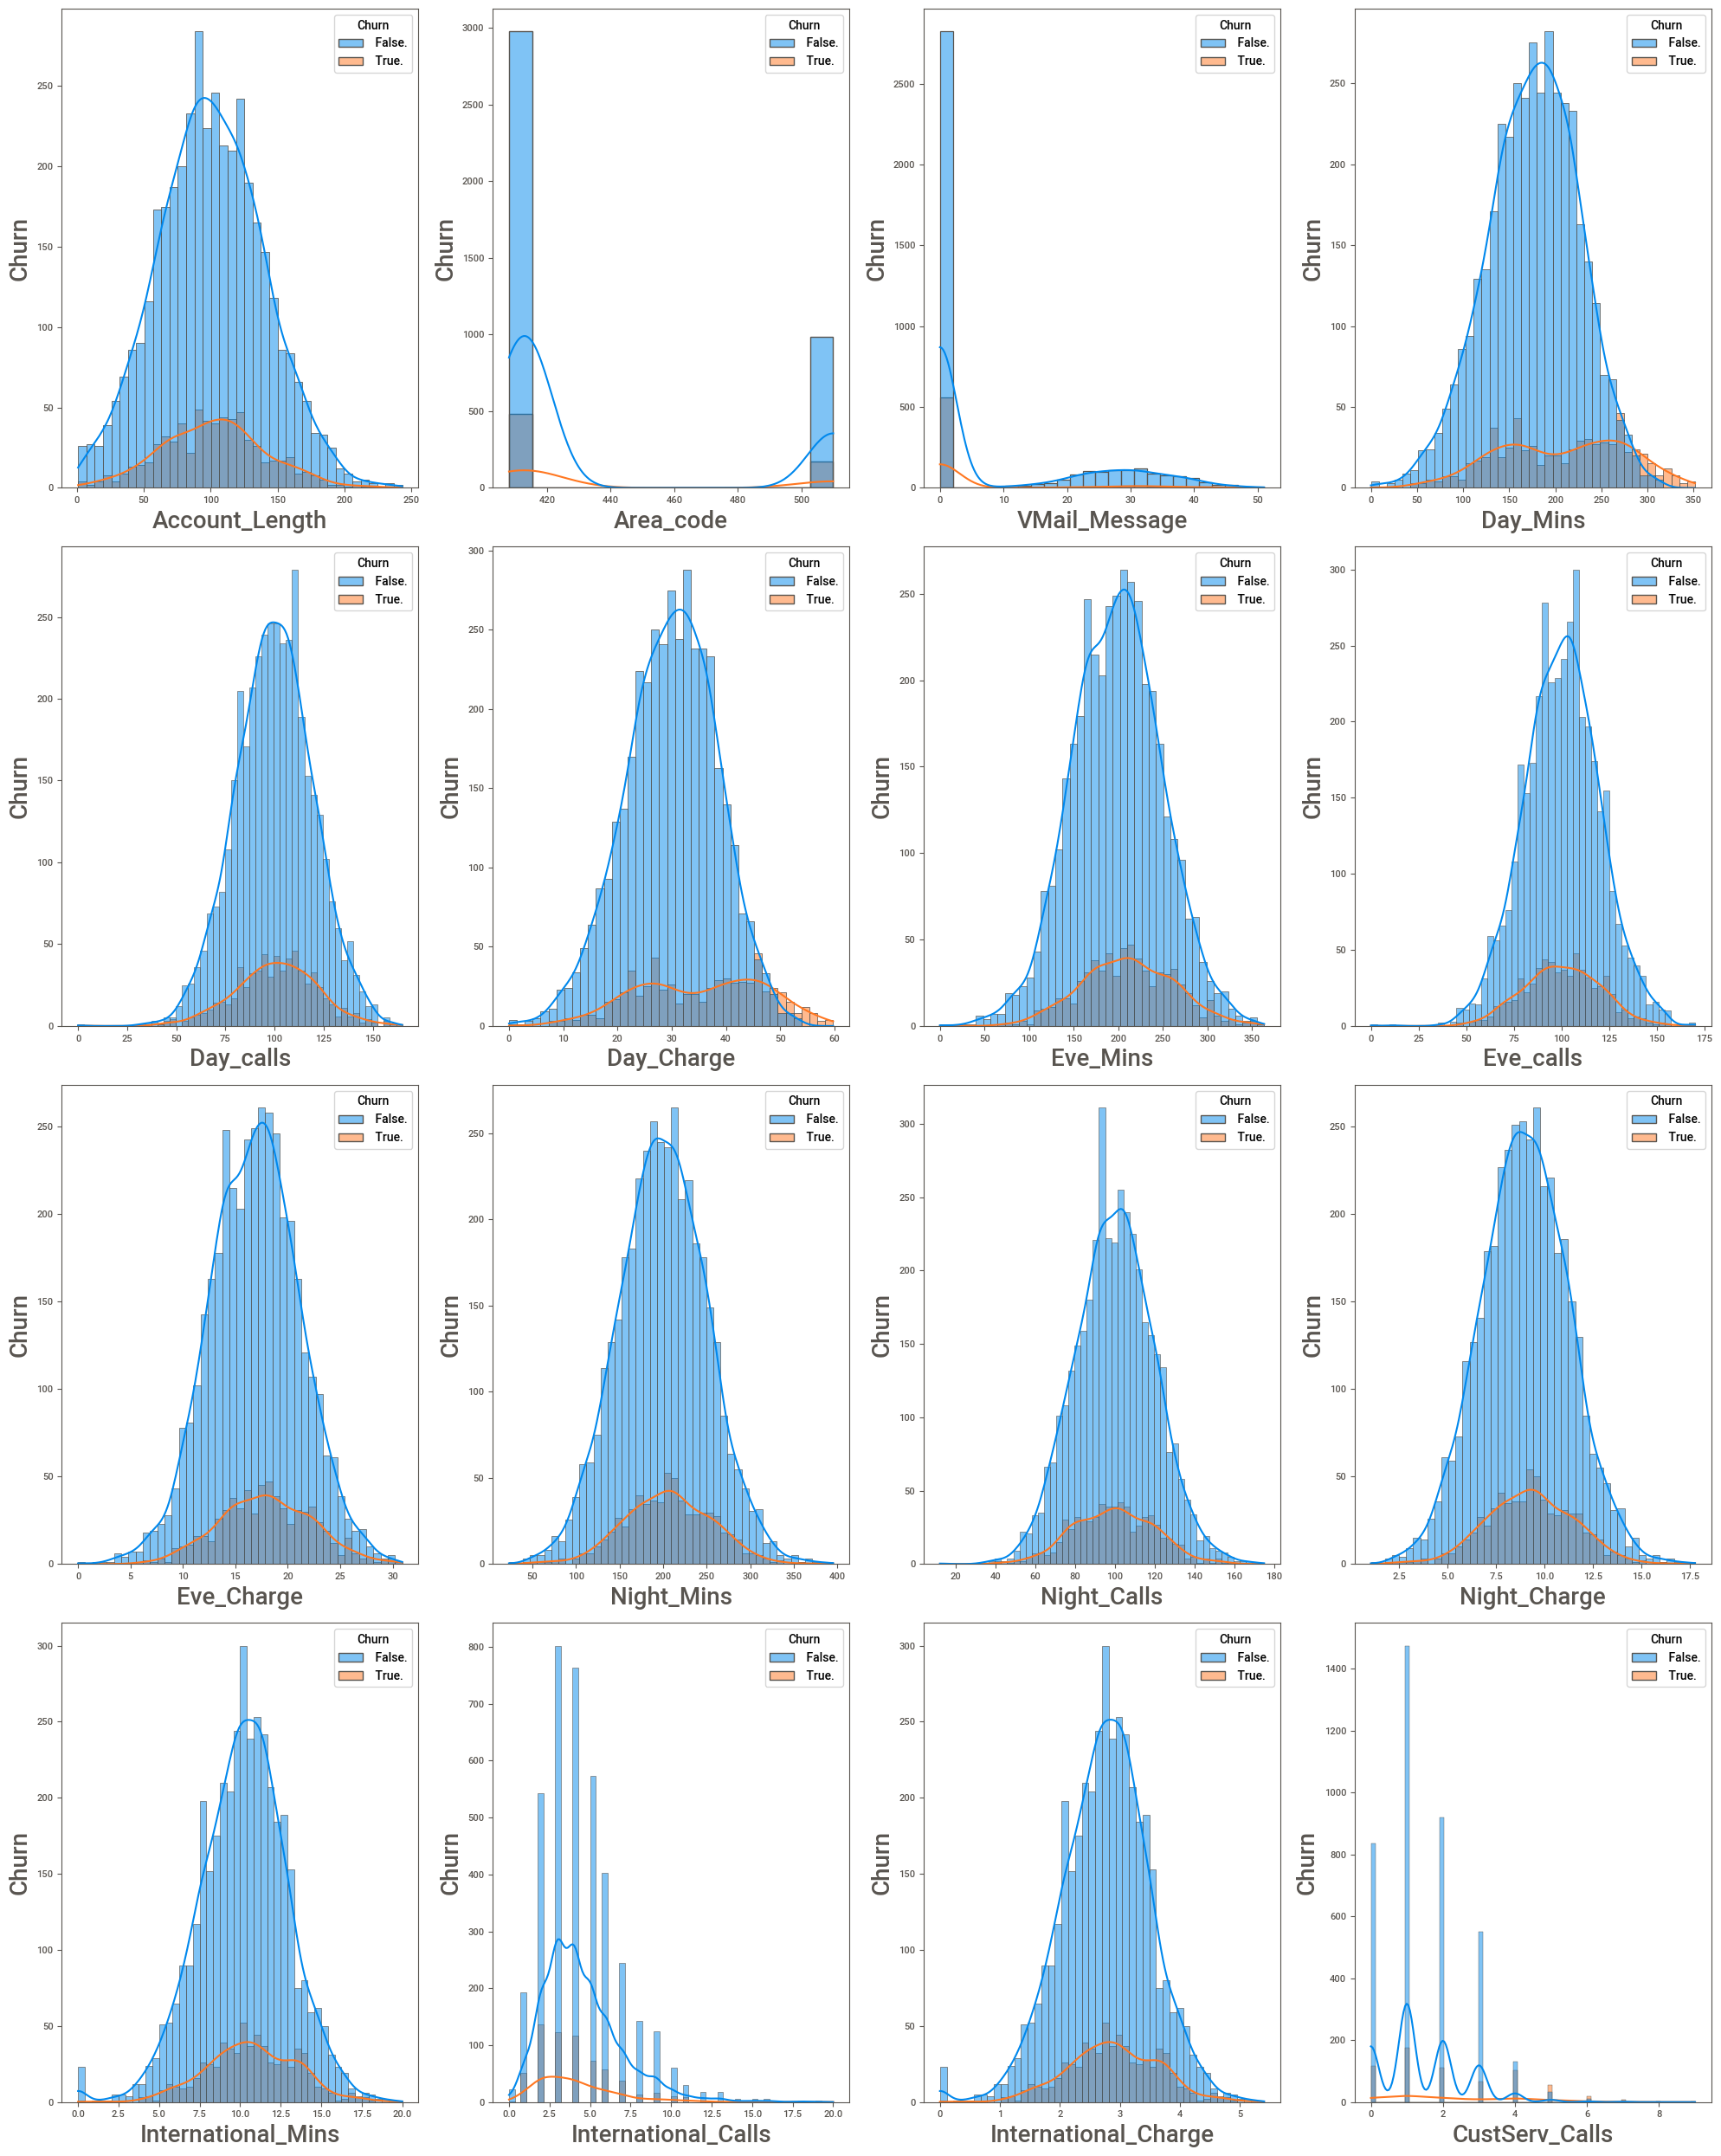

In [58]:
plt.figure(figsize=(20,25), facecolor='white')#To set canvas 
plotnumber = 1#counter

for column in d2:#accessing the columns 
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.histplot(x=d2[column],hue=df['Churn'],kde=True)
        plt.xlabel(column,fontsize=20)#assign name to x-axis and set font-20
        plt.ylabel('Churn',fontsize=20)
    plotnumber+=1#counter increment
plt.tight_layout()

Unnamed: 0


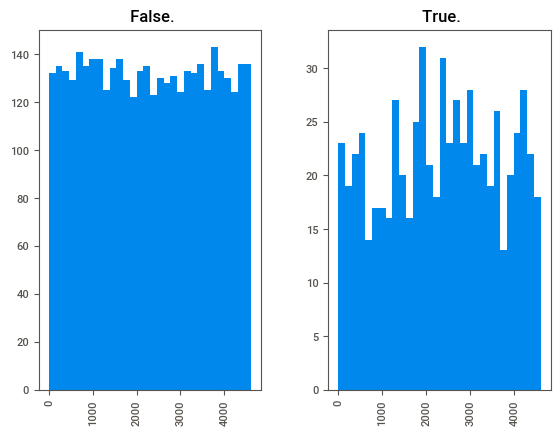

Account_Length


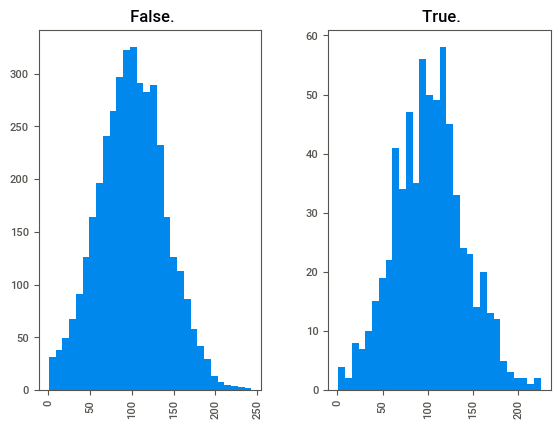

Area_code


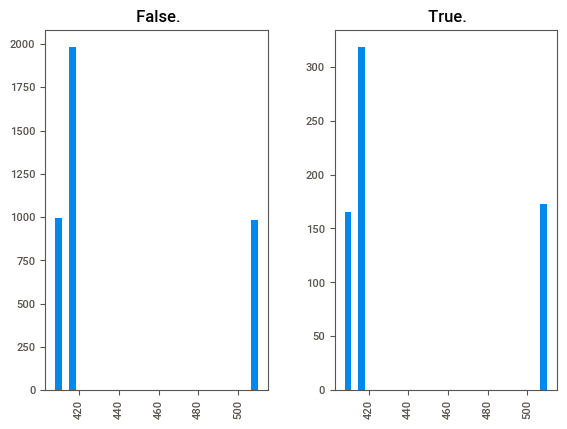

VMail_Message


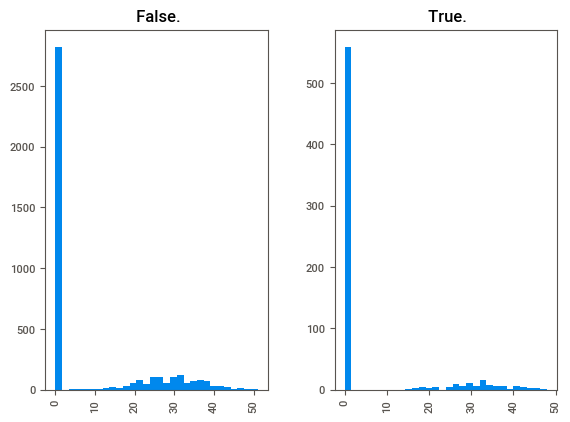

Day_Mins


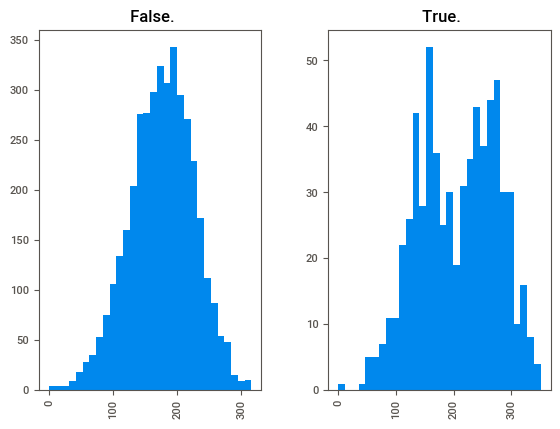

Day_calls


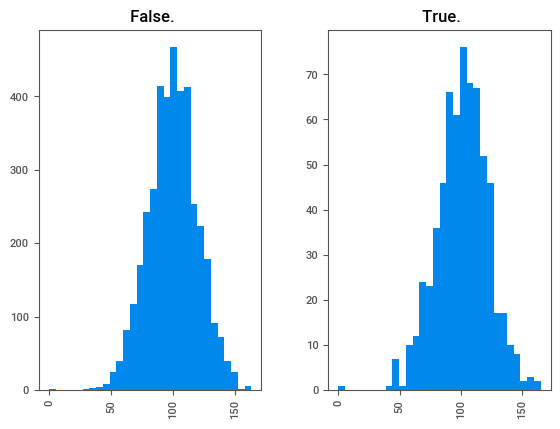

Day_Charge


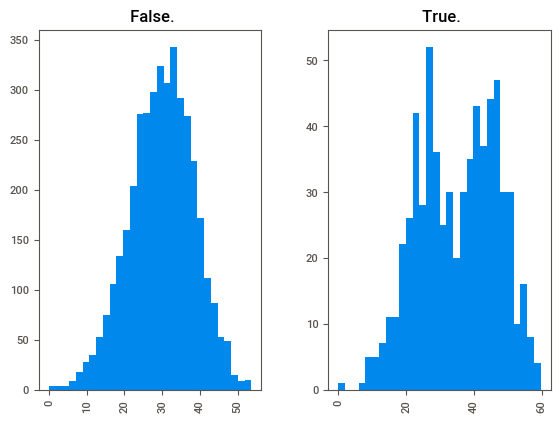

Eve_Mins


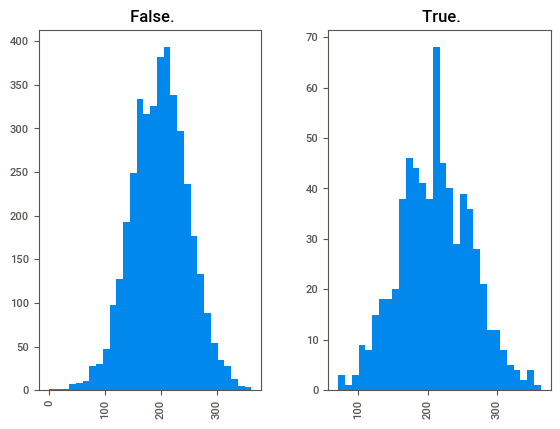

Eve_calls


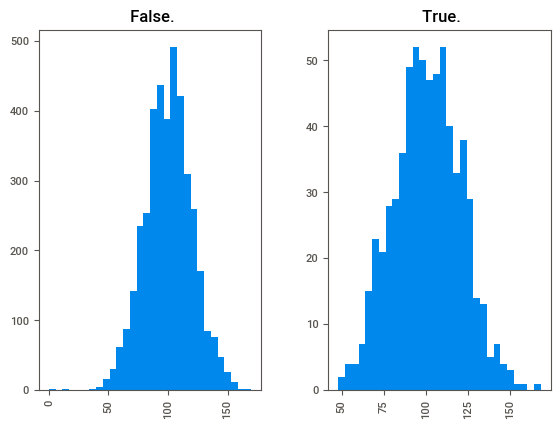

Eve_Charge


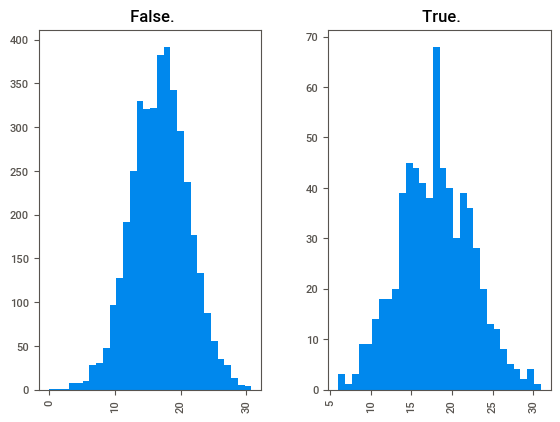

Night_Mins


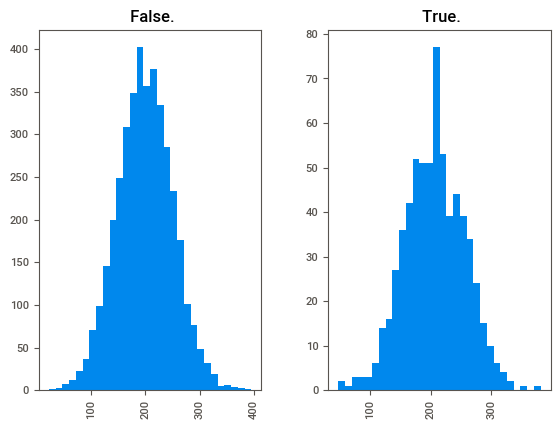

Night_Calls


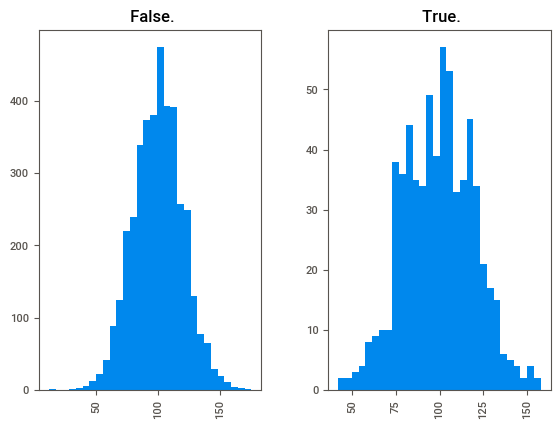

Night_Charge


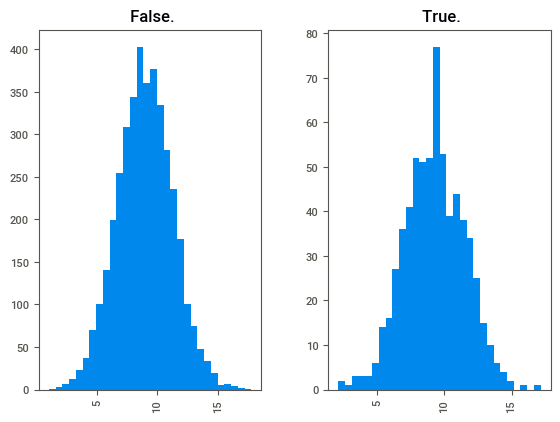

International_Mins


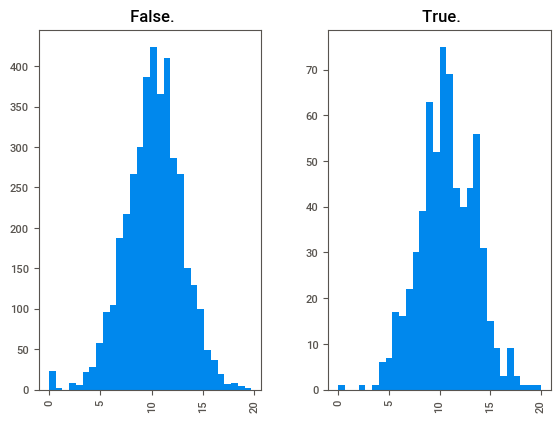

International_Calls


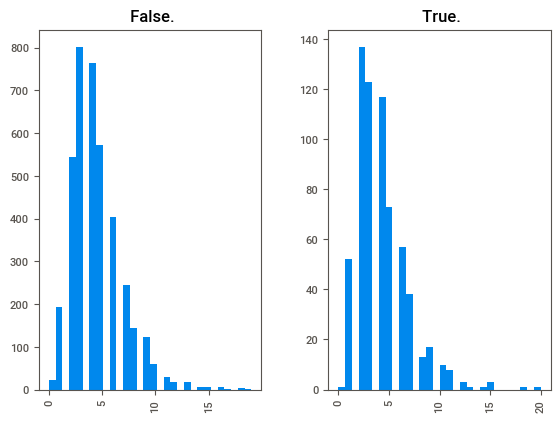

International_Charge


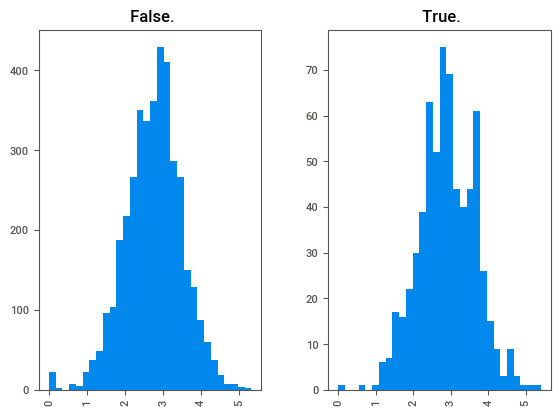

CustServ_Calls


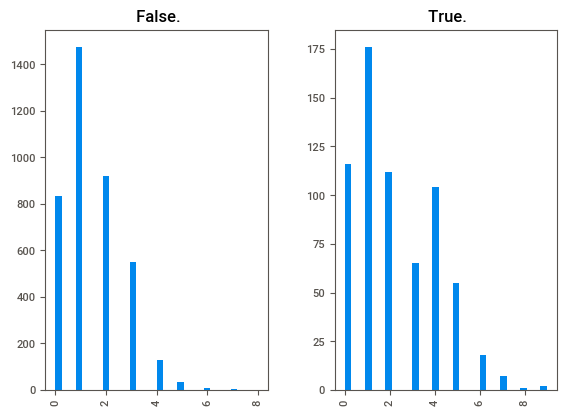

In [62]:
for column in df.select_dtypes(exclude=['object']).columns:
    print(column)
    hist = df[[column, 'Churn']].hist(by='Churn', bins=30)
    plt.show()

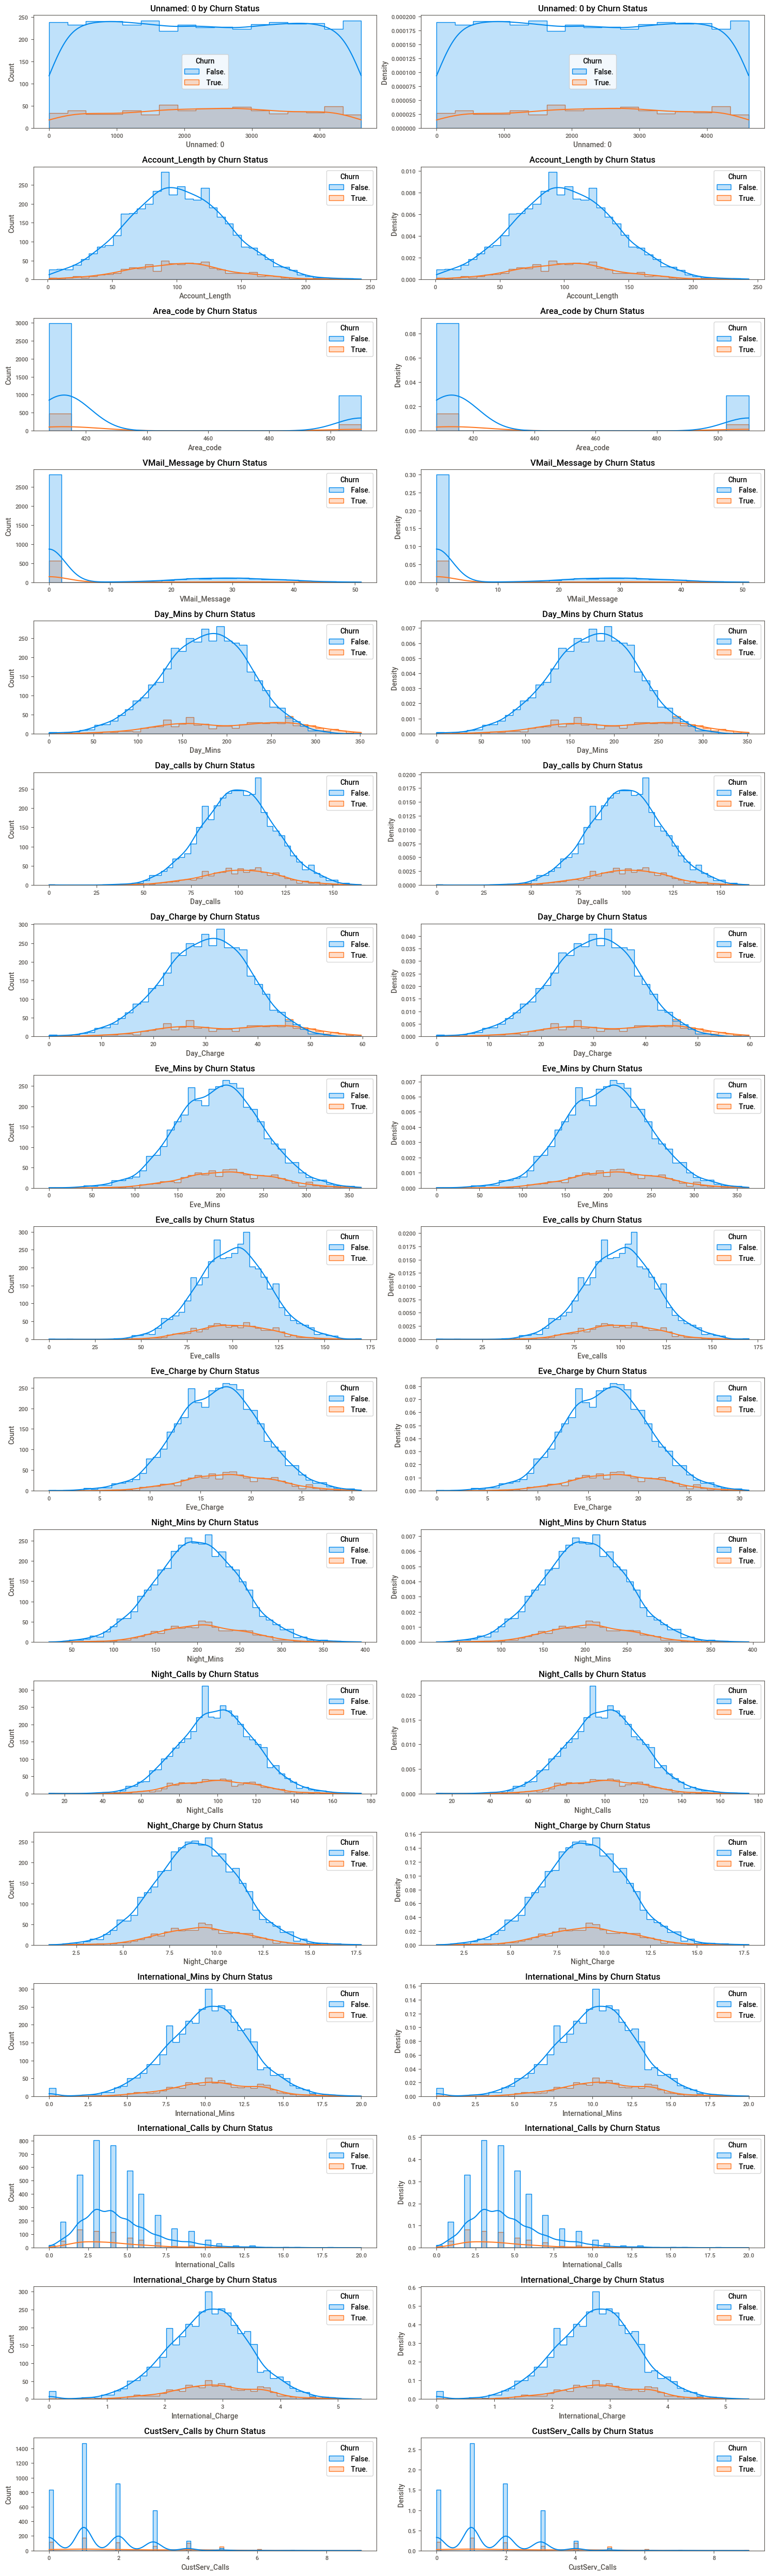

In [65]:


# Create a list of numerical column names
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Create a figure with subplots for each numerical column
fig, axes = plt.subplots(nrows=len(num_cols), ncols=2, figsize=(15, 50))

# Loop through the columns and create a histogram for each one, split by churn status
for i, col in enumerate(num_cols):
    sns.histplot(data=df, x=col, hue='Churn', element='step', kde=True, ax=axes[i, 0])
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Count')
    axes[i, 0].set_title(f'{col} by Churn Status')

    sns.histplot(data=df, x=col, hue='Churn', element='step', stat='density', kde=True, ax=axes[i, 1])
    axes[i, 1].set_xlabel(col)
    axes[i, 1].set_ylabel('Density')
    axes[i, 1].set_title(f'{col} by Churn Status')

# Adjust spacing between subplots and save the figure
plt.tight_layout()
plt.savefig('numerical_histograms.png')
plt.show()


### Notice

We see several features that essentially have 100% correlation with one another. Including these feature pairs in some machine learning algorithms can create catastrophic problems, while in others it will only introduce minor redundancy and bias. We can remove one feature from each of the highly correlated pairs

## Conversion of categorical data 

In [72]:
df.head()

Unnamed: 0 State  Account_Length  Area_code      Phone International_Plan  \
0           0    KS             128        415   382-4657                 no   
1           1    OH             107        415   371-7191                 no   
2           2    NJ             137        415   358-1921                 no   
3           3    OH              84        408   375-9999                yes   
4           4    OK              75        415   330-6626                yes   

  VMail_Plan  VMail_Message  Day_Mins  Day_calls  Day_Charge  Eve_Mins  \
0        yes             25     265.1        110       45.07     197.4   
1        yes             26     161.6        123       27.47     195.5   
2         no              0     243.4        114       41.38     121.2   
3         no              0     299.4         71       50.90      61.9   
4         no              0     166.7        113       28.34     148.3   

   Eve_calls  Eve_Charge  Night_Mins  Night_Calls  Night_Charge  \
0         99       16.78       244.7           91         11.01   
1        103       16.62       254.4          103         11.45   
2        110       10.30       162.6          104          7.32   
3         88        5.26       196.9           89          8.86   
4        122       12.61       186.9          121          8.41   

   International_Mins  International_Calls  International_Charge  \
0                10.0                    3                  2.70   
1                13.7                    3                  3.70   
2                12.2                    5                  3.29   
3                 6.6                    7                  1.78   
4                10.1                    3                  2.73   

   CustServ_Calls    Churn  
0               1   False.  
1               1   False.  
2               0   False.  
3               2   False.  
4               3   False.

In [73]:
df.State.value_counts()

WV    149
AL    114
MN    112
OH    110
ID    110
VA    109
NY    109
OR    107
NJ    106
WY    106
TX    105
UT    104
WI     99
MI     98
MA     97
KS     96
VT     95
ME     95
CT     92
MD     92
MT     92
MS     91
NH     91
CO     91
KY     90
RI     90
NV     89
IN     89
DE     89
WA     89
FL     85
NM     84
MO     84
SC     83
NC     83
TN     83
DC     82
AZ     81
ND     80
OK     80
HI     79
NE     79
IL     79
AR     77
GA     77
SD     76
LA     73
AK     69
PA     68
IA     65
CA     44
Name: State, dtype: int64

In [8]:
df.State=df.State.map({'AK':48, 'AL':2, 'AR':44, 'AZ':38, 'CA':51, 'CO':24, 'CT':19, 'DC':37, 'DE':29, 'FL':31, 'GA':45,
       'HI':41, 'IA':50, 'ID':5, 'IL':43, 'IN':28, 'KS':16, 'KY':25, 'LA':47, 'MA':15, 'MD':20, 'ME':18,
       'MI':14, 'MN':3, 'MO':33, 'MS':22, 'MT':21, 'NC':35, 'ND':39, 'NE':42, 'NH':23, 'NJ':9, 'NM':32,
       'NV':27, 'NY':7, 'OH':4, 'OK':40, 'OR':8, 'PA':49, 'RI':26, 'SC':34, 'SD':46, 'TN':36, 'TX':11,
       'UT':12, 'VA':6, 'VT':17, 'WA':30, 'WI':13, 'WV':1, 'WY':10})

In [6]:
df.head()

Unnamed: 0  State  Account_Length  Area_code      Phone International_Plan  \
0           0     16             128        415   382-4657                 no   
1           1      4             107        415   371-7191                 no   
2           2      9             137        415   358-1921                 no   
3           3      4              84        408   375-9999                yes   
4           4     40              75        415   330-6626                yes   

  VMail_Plan  VMail_Message  Day_Mins  Day_calls  Day_Charge  Eve_Mins  \
0        yes             25     265.1        110       45.07     197.4   
1        yes             26     161.6        123       27.47     195.5   
2         no              0     243.4        114       41.38     121.2   
3         no              0     299.4         71       50.90      61.9   
4         no              0     166.7        113       28.34     148.3   

   Eve_calls  Eve_Charge  Night_Mins  Night_Calls  Night_Charge  \
0         99       16.78       244.7           91         11.01   
1        103       16.62       254.4          103         11.45   
2        110       10.30       162.6          104          7.32   
3         88        5.26       196.9           89          8.86   
4        122       12.61       186.9          121          8.41   

   International_Mins  International_Calls  International_Charge  \
0                10.0                    3                  2.70   
1                13.7                    3                  3.70   
2                12.2                    5                  3.29   
3                 6.6                    7                  1.78   
4                10.1                    3                  2.73   

   CustServ_Calls    Churn  
0               1   False.  
1               1   False.  
2               0   False.  
3               2   False.  
4               3   False.

In [9]:
df.International_Plan.value_counts()

 no     4171
 yes     446
Name: International_Plan, dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder


In [11]:
le=LabelEncoder()

In [12]:
df.International_Plan=le.fit_transform(df.International_Plan)
df.VMail_Plan=le.fit_transform(df.VMail_Plan)
df.Churn=le.fit_transform(df.Churn)

In [13]:
df.head()

Unnamed: 0  State  Account_Length  Area_code      Phone  \
0           0     16             128        415   382-4657   
1           1      4             107        415   371-7191   
2           2      9             137        415   358-1921   
3           3      4              84        408   375-9999   
4           4     40              75        415   330-6626   

   International_Plan  VMail_Plan  VMail_Message  Day_Mins  Day_calls  \
0                   0           1             25     265.1        110   
1                   0           1             26     161.6        123   
2                   0           0              0     243.4        114   
3                   1           0              0     299.4         71   
4                   1           0              0     166.7        113   

   Day_Charge  Eve_Mins  Eve_calls  Eve_Charge  Night_Mins  Night_Calls  \
0       45.07     197.4         99       16.78       244.7           91   
1       27.47     195.5        103       16.62       254.4          103   
2       41.38     121.2        110       10.30       162.6          104   
3       50.90      61.9         88        5.26       196.9           89   
4       28.34     148.3        122       12.61       186.9          121   

   Night_Charge  International_Mins  International_Calls  \
0         11.01                10.0                    3   
1         11.45                13.7                    3   
2          7.32                12.2                    5   
3          8.86                 6.6                    7   
4          8.41                10.1                    3   

   International_Charge  CustServ_Calls  Churn  
0                  2.70               1      0  
1                  3.70               1      0  
2                  3.29               0      0  
3                  1.78               2      0  
4                  2.73               3      0

In [10]:
df.Churn.value_counts()

0    3961
1     656
Name: Churn, dtype: int64

In [13]:
df

Unnamed: 0  State  Account_Length  Area_code      Phone  \
0              0     16             128        415   382-4657   
1              1      4             107        415   371-7191   
2              2      9             137        415   358-1921   
3              3      4              84        408   375-9999   
4              4     40              75        415   330-6626   
...          ...    ...             ...        ...        ...   
4612        4612      7              57        510   345-7512   
4613        4613     32             177        408   343-6820   
4614        4614     17              67        408   338-4794   
4615        4615     14              98        415   355-8388   
4616        4616     28             140        415   409-6884   

      International_Plan  VMail_Plan  VMail_Message  Day_Mins  Day_calls  \
0                      0           1             25     265.1        110   
1                      0           1             26     161.6        123   
2                      0           0              0     243.4        114   
3                      1           0              0     299.4         71   
4                      1           0              0     166.7        113   
...                  ...         ...            ...       ...        ...   
4612                   0           1             25     144.0         81   
4613                   0           1             29     189.0         91   
4614                   0           1             33     127.5        126   
4615                   0           1             23     168.9         98   
4616                   0           0              0     204.7        100   

      Day_Charge  Eve_Mins  Eve_calls  Eve_Charge  Night_Mins  Night_Calls  \
0          45.07     197.4         99       16.78       244.7           91   
1          27.47     195.5        103       16.62       254.4          103   
2          41.38     121.2        110       10.30       162.6          104   
3          50.90      61.9         88        5.26       196.9           89   
4          28.34     148.3        122       12.61       186.9          121   
...          ...       ...        ...         ...         ...          ...   
4612       24.48     187.2        112       15.91       158.6          122   
4613       32.13     303.1         96       25.76       163.6          116   
4614       21.68     296.1        129       25.17       200.9           91   
4615       28.71     226.3        117       19.24       165.5           96   
4616       34.80     126.8        107       10.78       202.8          115   

      Night_Charge  International_Mins  International_Calls  \
0            11.01                10.0                    3   
1            11.45                13.7                    3   
2             7.32                12.2                    5   
3             8.86                 6.6                    7   
4             8.41                10.1                    3   
...            ...                 ...                  ...   
4612          7.14                 8.5                    6   
4613          7.36                15.7                    1   
4614          9.04                13.0                    3   
4615          7.45                14.3                    3   
4616          9.13                12.1                    4   

      International_Charge  CustServ_Calls  Churn  
0                     2.70               1      0  
1                     3.70               1      0  
2                     3.29               0      0  
3                     1.78               2      0  
4                     2.73               3      0  
...                    ...             ...    ...  
4612                  2.30               3      0  
4613                  4.24               3      0  
4614                  3.51               1      0  
4615                  3.86               0      0  
4616                  3.27               2    

## handling outliers

In [11]:
df.head()

Unnamed: 0  State  Account_Length  Area_code      Phone  \
0           0     16             128        415   382-4657   
1           1      4             107        415   371-7191   
2           2      9             137        415   358-1921   
3           3      4              84        408   375-9999   
4           4     40              75        415   330-6626   

   International_Plan  VMail_Plan  VMail_Message  Day_Mins  Day_calls  \
0                   0           1             25     265.1        110   
1                   0           1             26     161.6        123   
2                   0           0              0     243.4        114   
3                   1           0              0     299.4         71   
4                   1           0              0     166.7        113   

   Day_Charge  Eve_Mins  Eve_calls  Eve_Charge  Night_Mins  Night_Calls  \
0       45.07     197.4         99       16.78       244.7           91   
1       27.47     195.5        103       16.62       254.4          103   
2       41.38     121.2        110       10.30       162.6          104   
3       50.90      61.9         88        5.26       196.9           89   
4       28.34     148.3        122       12.61       186.9          121   

   Night_Charge  International_Mins  International_Calls  \
0         11.01                10.0                    3   
1         11.45                13.7                    3   
2          7.32                12.2                    5   
3          8.86                 6.6                    7   
4          8.41                10.1                    3   

   International_Charge  CustServ_Calls  Churn  
0                  2.70               1      0  
1                  3.70               1      0  
2                  3.29               0      0  
3                  1.78               2      0  
4                  2.73               3      0

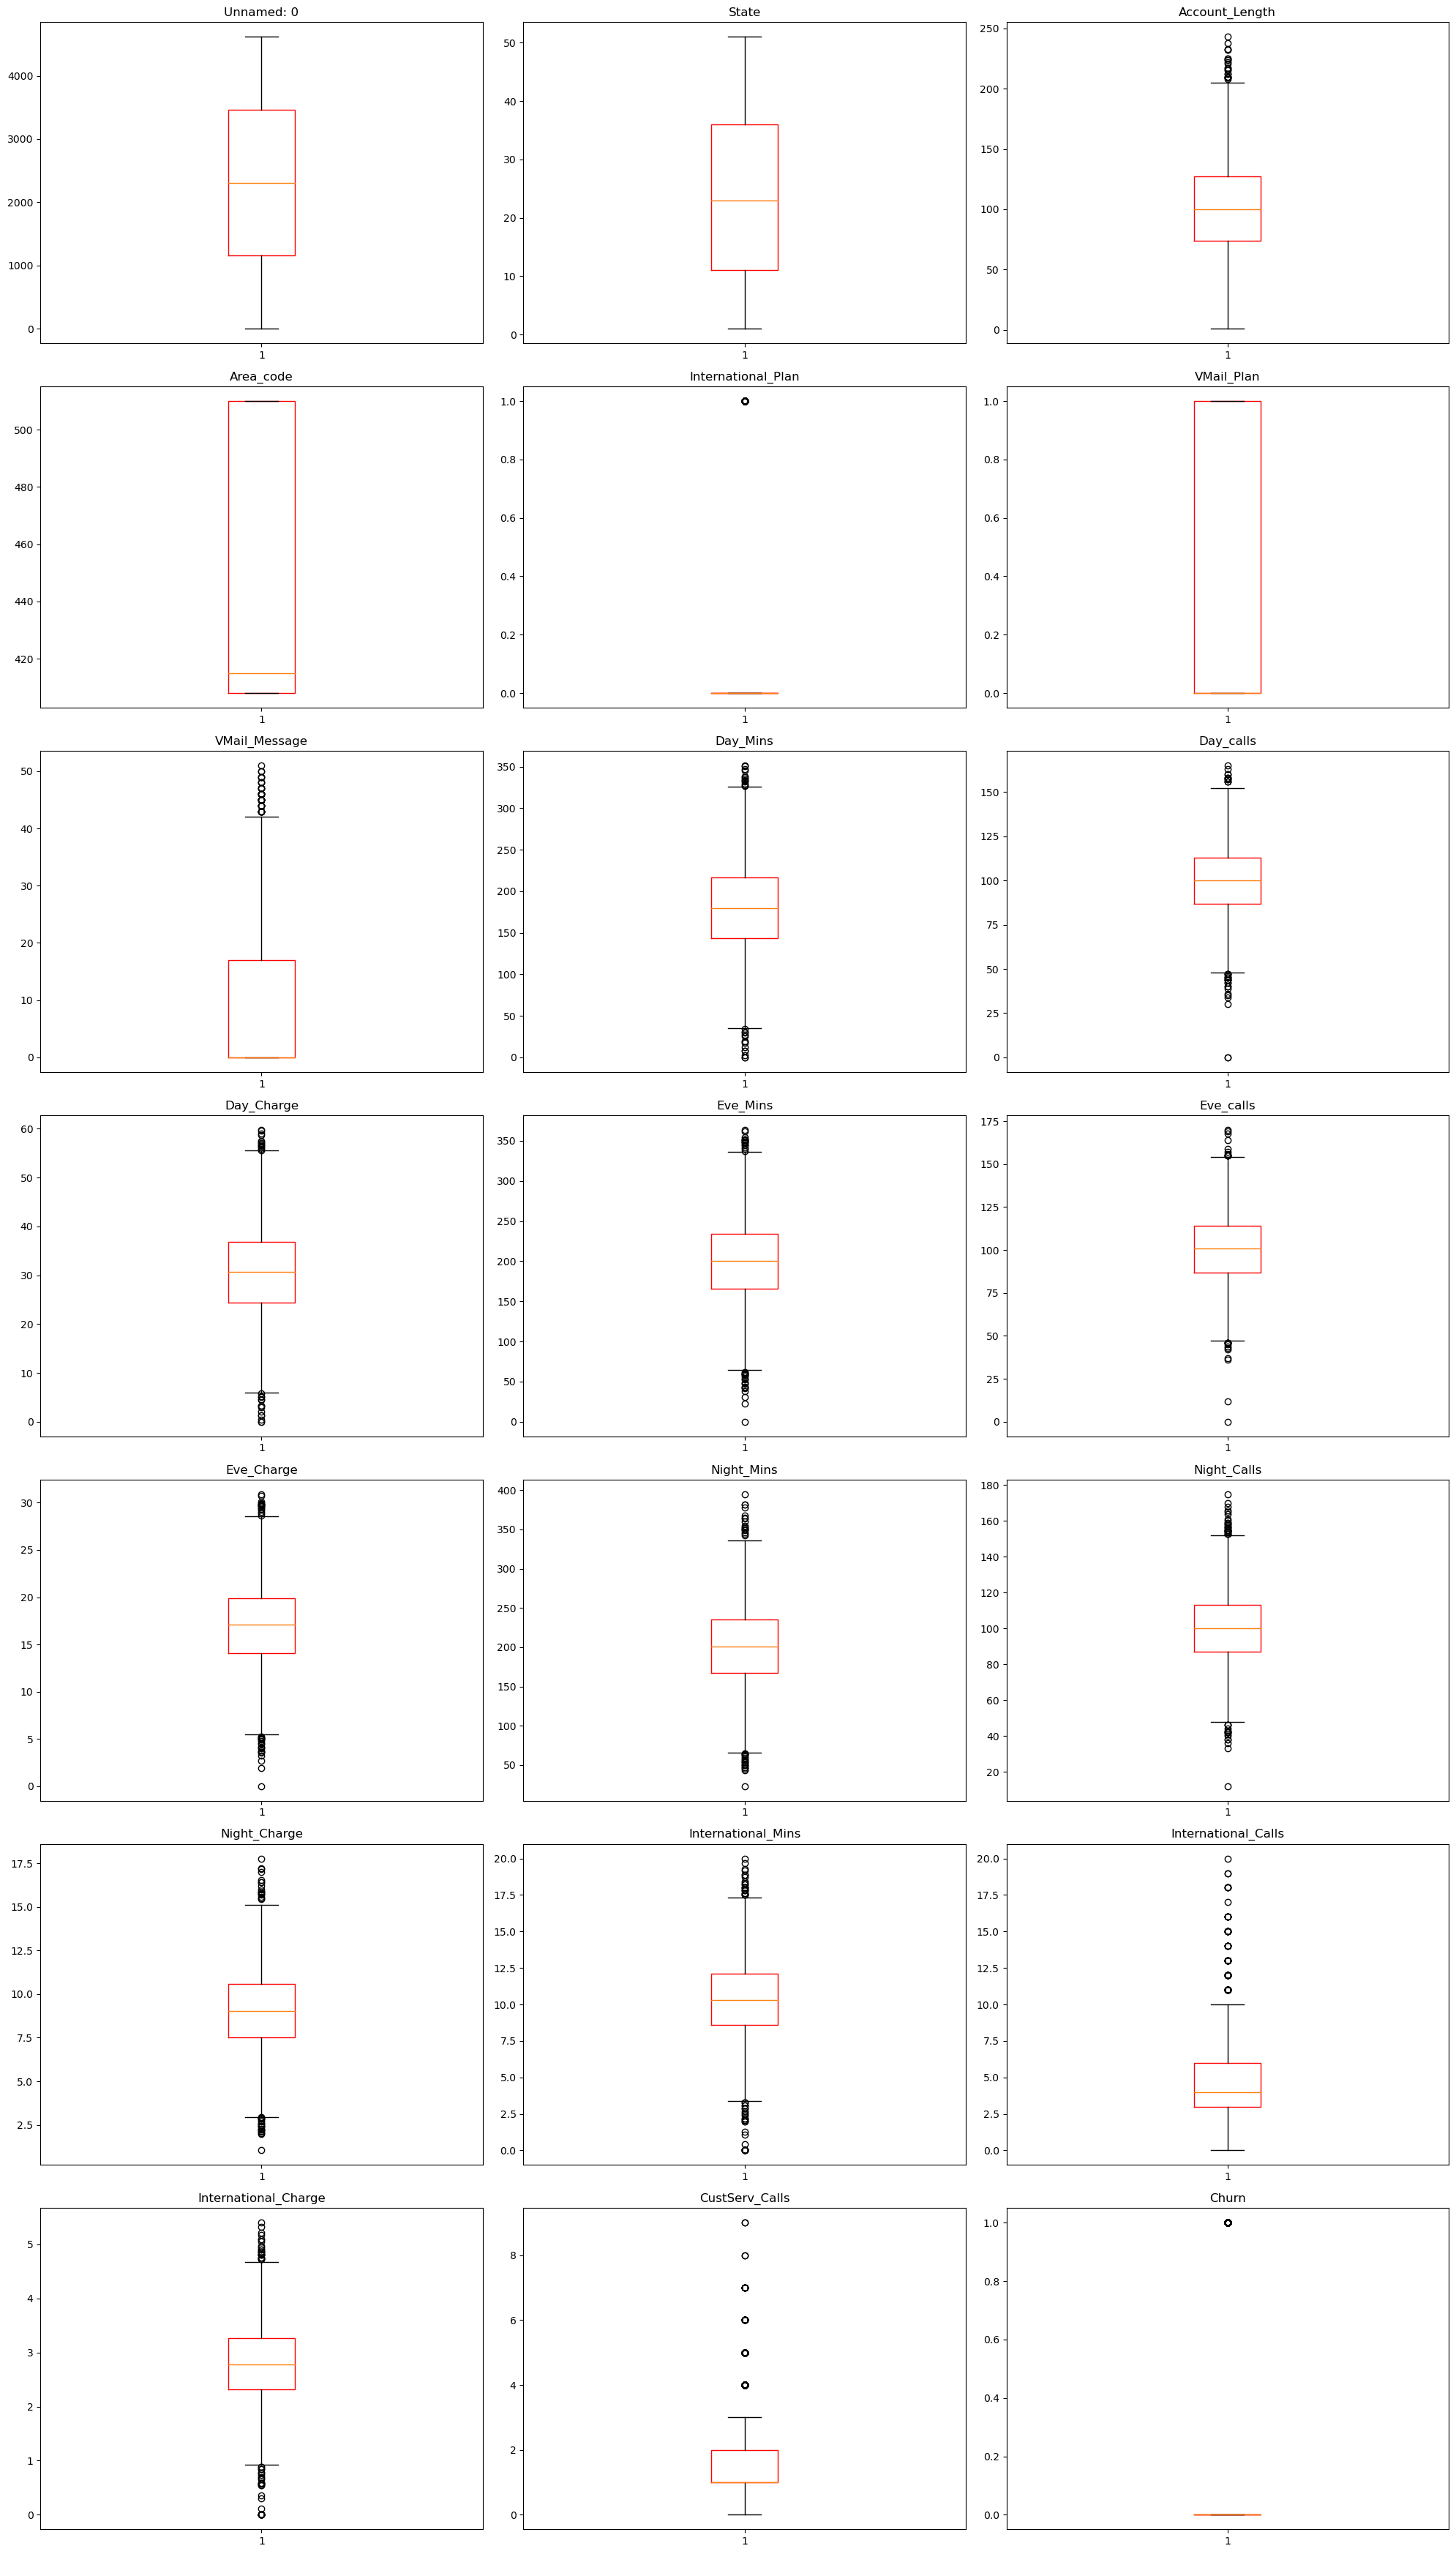

In [14]:
numeric_cols = df.select_dtypes(include=[float, int]).columns
num_plots = len(numeric_cols)
num_cols = 3  # number of columns per row
num_rows = int(np.ceil(num_plots/num_cols))

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 5*num_rows))

for i, col_name in enumerate(numeric_cols):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].boxplot(df[col_name], boxprops=dict(color='red'))
    axes[row, col].set_title(col_name)


plt.tight_layout()  # adjust subplot spacing
plt.show()



### account_length

<AxesSubplot:xlabel='Account_Length'>

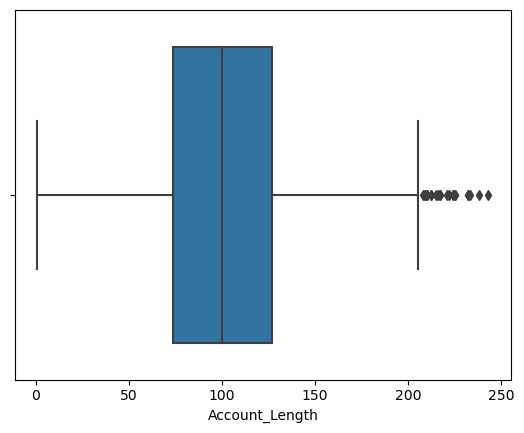

In [12]:
sns.boxplot(x=df.Account_Length)

C:\Users\sahir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

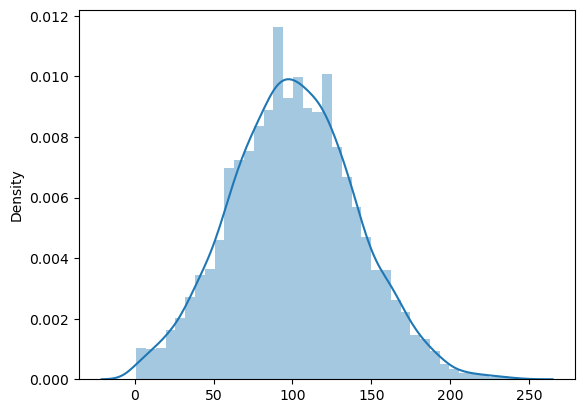

In [13]:
sns.distplot(x=df.Account_Length)

In [15]:
from scipy import stats

IQR=stats.iqr(df.Account_Length,interpolation='midpoint')
IQR

53.0

In [16]:
Q1=df.Account_Length.quantile(0.25)
Q3=df.Account_Length.quantile(0.75)

min_limit= Q1-1.5*IQR
max_limit= Q3+1.5*IQR

In [17]:
min_limit

-5.5

In [18]:
max_limit

206.5

In [19]:
df.loc[df['Account_Length']<min_limit]

Empty DataFrame
Columns: [Unnamed: 0, State, Account_Length, Area_code, Phone, International_Plan, VMail_Plan, VMail_Message, Day_Mins, Day_calls, Day_Charge, Eve_Mins, Eve_calls, Eve_Charge, Night_Mins, Night_Calls, Night_Charge, International_Mins, International_Calls, International_Charge, CustServ_Calls, Churn]
Index: []

In [20]:
len(df.loc[df['Account_Length']>max_limit])

23

In [21]:
df.shape

(4617, 22)

In [22]:
df.shape[0]
len(df.loc[df['Account_Length']>max_limit]) 
23/4617*100

0.4981589776911414

In [23]:
df.loc[df['Account_Length']>max_limit,'Account_Length']=np.median(df.Account_Length)

<AxesSubplot:xlabel='Account_Length'>

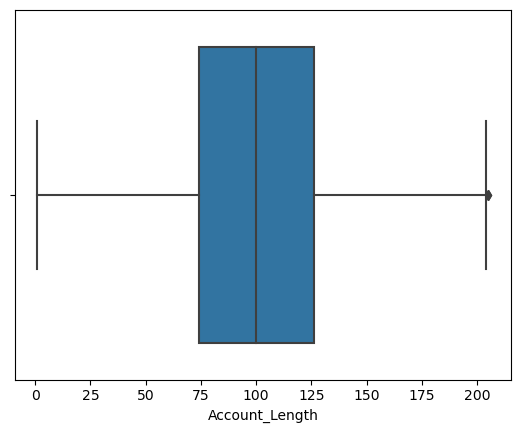

In [24]:
sns.boxplot(x=df.Account_Length)

In [25]:
df.head(2)

Unnamed: 0  State  Account_Length  Area_code      Phone  \
0           0     16             128        415   382-4657   
1           1      4             107        415   371-7191   

   International_Plan  VMail_Plan  VMail_Message  Day_Mins  Day_calls  \
0                   0           1             25     265.1        110   
1                   0           1             26     161.6        123   

   Day_Charge  Eve_Mins  Eve_calls  Eve_Charge  Night_Mins  Night_Calls  \
0       45.07     197.4         99       16.78       244.7           91   
1       27.47     195.5        103       16.62       254.4          103   

   Night_Charge  International_Mins  International_Calls  \
0         11.01                10.0                    3   
1         11.45                13.7                    3   

   International_Charge  CustServ_Calls  Churn  
0                   2.7               1      0  
1                   3.7               1      0

### International_Plan

C:\Users\sahir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

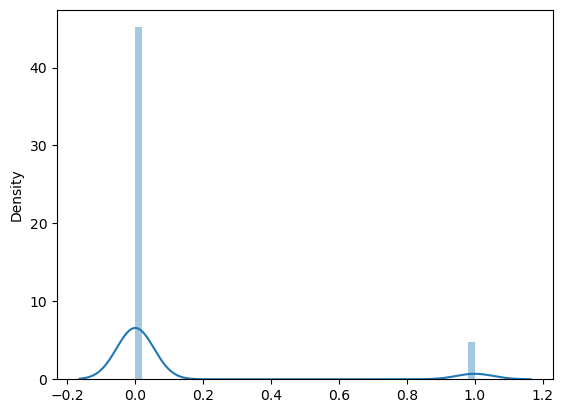

In [26]:
sns.distplot(x=df.International_Plan)

In [27]:
IQR=stats.iqr(df.International_Plan,interpolation='midpoint')
IQR

0.0

In [28]:
Q1=df.International_Plan.quantile(0.25)
Q3=df.International_Plan.quantile(0.75)

min_limit= Q1-1.5*IQR
max_limit= Q3+1.5*IQR

In [29]:
min_limit

0.0

In [30]:
max_limit

0.0

In [31]:
len(df.loc[df['International_Plan']>max_limit])

446

In [32]:
df.loc[df['International_Plan']<min_limit]

Empty DataFrame
Columns: [Unnamed: 0, State, Account_Length, Area_code, Phone, International_Plan, VMail_Plan, VMail_Message, Day_Mins, Day_calls, Day_Charge, Eve_Mins, Eve_calls, Eve_Charge, Night_Mins, Night_Calls, Night_Charge, International_Mins, International_Calls, International_Charge, CustServ_Calls, Churn]
Index: []

In [33]:
df.shape[0]
len(df.loc[df['Account_Length']>max_limit]) 
446/4617*100

9.65995235001083

In [34]:
df.head(2)

Unnamed: 0  State  Account_Length  Area_code      Phone  \
0           0     16             128        415   382-4657   
1           1      4             107        415   371-7191   

   International_Plan  VMail_Plan  VMail_Message  Day_Mins  Day_calls  \
0                   0           1             25     265.1        110   
1                   0           1             26     161.6        123   

   Day_Charge  Eve_Mins  Eve_calls  Eve_Charge  Night_Mins  Night_Calls  \
0       45.07     197.4         99       16.78       244.7           91   
1       27.47     195.5        103       16.62       254.4          103   

   Night_Charge  International_Mins  International_Calls  \
0         11.01                10.0                    3   
1         11.45                13.7                    3   

   International_Charge  CustServ_Calls  Churn  
0                   2.7               1      0  
1                   3.7               1      0

### VMail_Message

C:\Users\sahir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

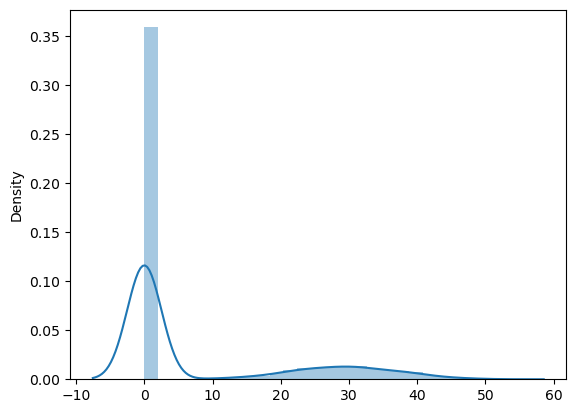

In [35]:
sns.distplot(x=df.VMail_Message)

In [36]:
IQR=stats.iqr(df.VMail_Message,interpolation='midpoint')
IQR

17.0

In [37]:
Q1=df.VMail_Message.quantile(0.25)
Q3=df.VMail_Message.quantile(0.75)

min_limit= Q1-1.5*IQR
max_limit= Q3+1.5*IQR

In [38]:
min_limit

-25.5

In [39]:
max_limit

42.5

In [40]:
len(df.loc[df['VMail_Message']>max_limit])

51

In [41]:
df.loc[df['VMail_Message']<min_limit]

Empty DataFrame
Columns: [Unnamed: 0, State, Account_Length, Area_code, Phone, International_Plan, VMail_Plan, VMail_Message, Day_Mins, Day_calls, Day_Charge, Eve_Mins, Eve_calls, Eve_Charge, Night_Mins, Night_Calls, Night_Charge, International_Mins, International_Calls, International_Charge, CustServ_Calls, Churn]
Index: []

In [42]:
df.shape[0]
len(df.loc[df['VMail_Message']>max_limit]) 
51/4617*100

1.1046133853151396

In [43]:
df.loc[df['VMail_Message']>max_limit,'VMail_Message']=np.median(df.VMail_Message)

<AxesSubplot:xlabel='VMail_Message'>

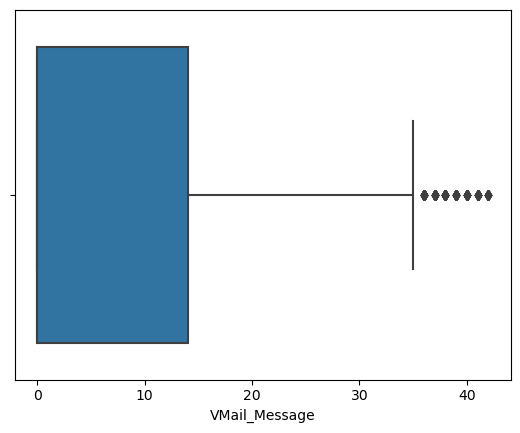

In [44]:
sns.boxplot(x=df.VMail_Message)

In [45]:
df.head()

Unnamed: 0  State  Account_Length  Area_code      Phone  \
0           0     16             128        415   382-4657   
1           1      4             107        415   371-7191   
2           2      9             137        415   358-1921   
3           3      4              84        408   375-9999   
4           4     40              75        415   330-6626   

   International_Plan  VMail_Plan  VMail_Message  Day_Mins  Day_calls  \
0                   0           1             25     265.1        110   
1                   0           1             26     161.6        123   
2                   0           0              0     243.4        114   
3                   1           0              0     299.4         71   
4                   1           0              0     166.7        113   

   Day_Charge  Eve_Mins  Eve_calls  Eve_Charge  Night_Mins  Night_Calls  \
0       45.07     197.4         99       16.78       244.7           91   
1       27.47     195.5        103       16.62       254.4          103   
2       41.38     121.2        110       10.30       162.6          104   
3       50.90      61.9         88        5.26       196.9           89   
4       28.34     148.3        122       12.61       186.9          121   

   Night_Charge  International_Mins  International_Calls  \
0         11.01                10.0                    3   
1         11.45                13.7                    3   
2          7.32                12.2                    5   
3          8.86                 6.6                    7   
4          8.41                10.1                    3   

   International_Charge  CustServ_Calls  Churn  
0                  2.70               1      0  
1                  3.70               1      0  
2                  3.29               0      0  
3                  1.78               2      0  
4                  2.73               3      0

### Day_Mins

C:\Users\sahir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

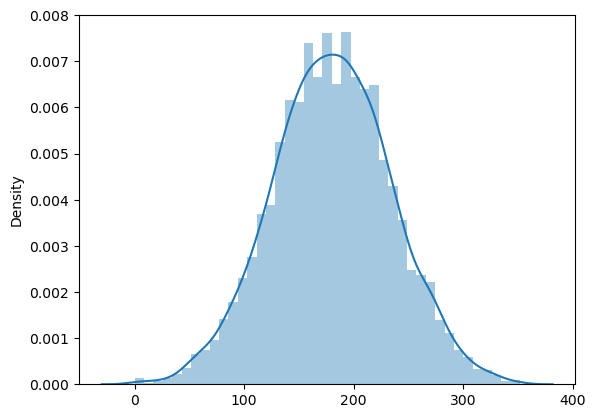

In [46]:
sns.distplot(x=df.Day_Mins)

In [47]:
IQR=stats.iqr(df.Day_Mins,interpolation='midpoint')
IQR

73.10000000000002

In [48]:
Q1=df.Day_Mins.quantile(0.25)
Q3=df.Day_Mins.quantile(0.75)

min_limit= Q1-1.5*IQR
max_limit= Q3+1.5*IQR

In [49]:
min_limit

34.049999999999955

In [50]:
max_limit

326.45000000000005

In [51]:
len(df.loc[df['Day_Mins']<min_limit])

14

In [52]:
len(df.loc[df['Day_Mins']>max_limit])

13

In [53]:
df.shape[0]
len(df.loc[df['Day_Mins']>max_limit]) 
13/4617*100

0.2815681178254278

In [54]:
df.shape[0]
len(df.loc[df['Day_Mins']<min_limit]) 
14/4617*100

0.30322720381199914

In [55]:
df.loc[df['Day_Mins']>max_limit,'Day_Mins']=np.median(df.Day_Mins)

In [56]:
df.loc[df['Day_Mins']<min_limit,'Day_Mins']=np.median(df.Day_Mins)

<AxesSubplot:xlabel='Day_Mins'>

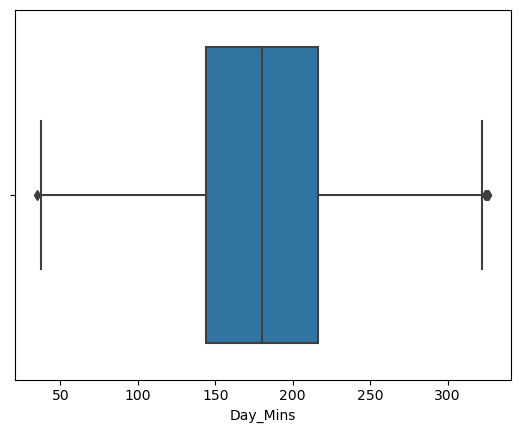

In [57]:
sns.boxplot(x=df.Day_Mins)

In [58]:
df.head(2)

Unnamed: 0  State  Account_Length  Area_code      Phone  \
0           0     16             128        415   382-4657   
1           1      4             107        415   371-7191   

   International_Plan  VMail_Plan  VMail_Message  Day_Mins  Day_calls  \
0                   0           1             25     265.1        110   
1                   0           1             26     161.6        123   

   Day_Charge  Eve_Mins  Eve_calls  Eve_Charge  Night_Mins  Night_Calls  \
0       45.07     197.4         99       16.78       244.7           91   
1       27.47     195.5        103       16.62       254.4          103   

   Night_Charge  International_Mins  International_Calls  \
0         11.01                10.0                    3   
1         11.45                13.7                    3   

   International_Charge  CustServ_Calls  Churn  
0                   2.7               1      0  
1                   3.7               1      0

### Day_calls 

C:\Users\sahir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

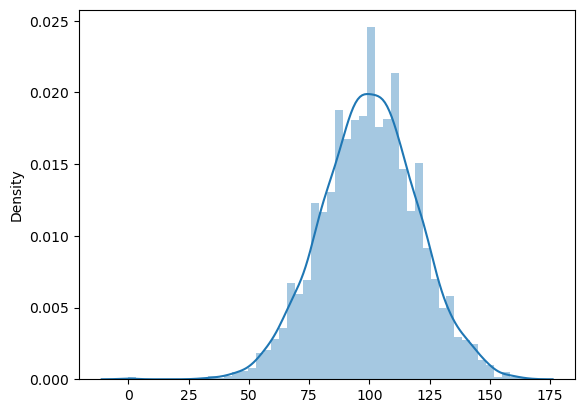

In [59]:
sns.distplot(x=df.Day_calls)

In [60]:
IQR=stats.iqr(df.Day_calls,interpolation='midpoint')
IQR

26.0

In [61]:
Q1=df.Day_calls.quantile(0.25)
Q3=df.Day_calls.quantile(0.75)

min_limit= Q1-1.5*IQR
max_limit= Q3+1.5*IQR

In [62]:
min_limit

48.0

In [63]:
max_limit

152.0

In [64]:
len(df.loc[df['Day_calls']<min_limit])

22

In [65]:
len(df.loc[df['Day_calls']>max_limit])

12

In [66]:
df.shape[0]
len(df.loc[df['Day_calls']>max_limit]) 
12/4617*100

0.2599090318388564

In [67]:
df.shape[0]
len(df.loc[df['Day_calls']<min_limit]) 
22/4617*100

0.4764998917045701

In [68]:
df.loc[df['Day_calls']<min_limit,'Day_calls']=np.median(df.Day_calls)

In [69]:
df.loc[df['Day_calls']>max_limit,'Day_calls']=np.median(df.Day_calls)

<AxesSubplot:xlabel='Day_calls'>

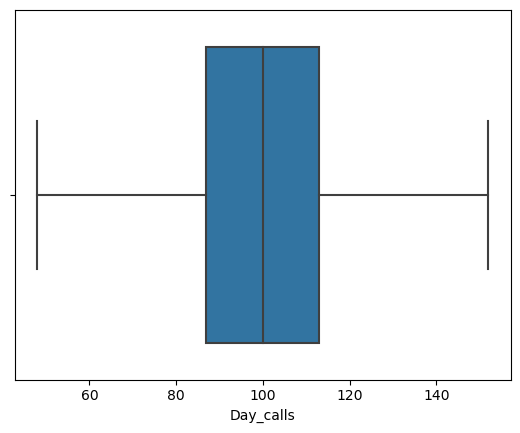

In [70]:
sns.boxplot(x=df.Day_calls)

In [71]:
df.head(2)

Unnamed: 0  State  Account_Length  Area_code      Phone  \
0           0     16             128        415   382-4657   
1           1      4             107        415   371-7191   

   International_Plan  VMail_Plan  VMail_Message  Day_Mins  Day_calls  \
0                   0           1             25     265.1        110   
1                   0           1             26     161.6        123   

   Day_Charge  Eve_Mins  Eve_calls  Eve_Charge  Night_Mins  Night_Calls  \
0       45.07     197.4         99       16.78       244.7           91   
1       27.47     195.5        103       16.62       254.4          103   

   Night_Charge  International_Mins  International_Calls  \
0         11.01                10.0                    3   
1         11.45                13.7                    3   

   International_Charge  CustServ_Calls  Churn  
0                   2.7               1      0  
1                   3.7               1      0

### Day_Charge

C:\Users\sahir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

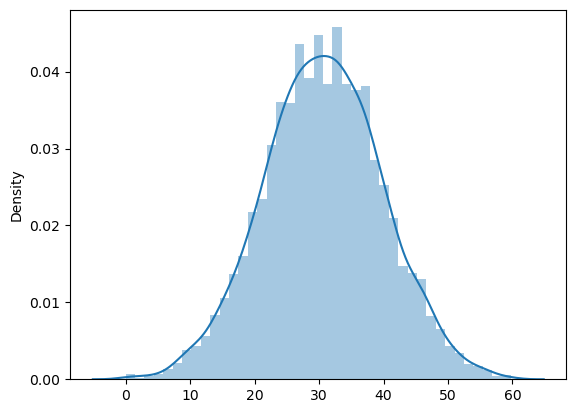

In [72]:
sns.distplot(x=df.Day_Charge)

In [73]:
IQR=stats.iqr(df.Day_Charge,interpolation='midpoint')
IQR

12.43

In [74]:
Q1=df.Day_Charge.quantile(0.25)
Q3=df.Day_Charge.quantile(0.75)

min_limit= Q1-1.5*IQR
max_limit= Q3+1.5*IQR

In [75]:
len(df.loc[df['Day_Charge']<min_limit])

14

In [76]:
len(df.loc[df['Day_Charge']>max_limit])

13

In [77]:
df.shape[0]
len(df.loc[df['Day_Charge']>max_limit]) 
13/4617*100

0.2815681178254278

In [78]:
df.shape[0]
len(df.loc[df['Day_Charge']<min_limit]) 
14/4617*100

0.30322720381199914

In [79]:
df.loc[df['Day_Charge']>max_limit,'Day_Charge']=np.median(df.Day_Charge)

In [80]:
df.loc[df['Day_Charge']<min_limit,'Day_Charge']=np.median(df.Day_Charge)

<AxesSubplot:xlabel='Day_Charge'>

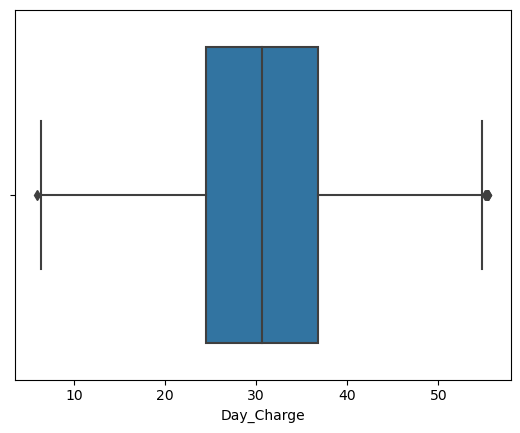

In [81]:
sns.boxplot(x=df.Day_Charge)

In [82]:
df.head(2)

Unnamed: 0  State  Account_Length  Area_code      Phone  \
0           0     16             128        415   382-4657   
1           1      4             107        415   371-7191   

   International_Plan  VMail_Plan  VMail_Message  Day_Mins  Day_calls  \
0                   0           1             25     265.1        110   
1                   0           1             26     161.6        123   

   Day_Charge  Eve_Mins  Eve_calls  Eve_Charge  Night_Mins  Night_Calls  \
0       45.07     197.4         99       16.78       244.7           91   
1       27.47     195.5        103       16.62       254.4          103   

   Night_Charge  International_Mins  International_Calls  \
0         11.01                10.0                    3   
1         11.45                13.7                    3   

   International_Charge  CustServ_Calls  Churn  
0                   2.7               1      0  
1                   3.7               1      0

### Eve_Mins

C:\Users\sahir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

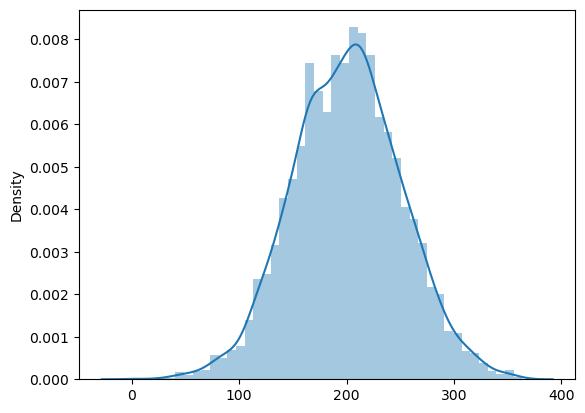

In [83]:
sns.distplot(x=df.Eve_Mins)

In [84]:

IQR=stats.iqr(df.Eve_Mins,interpolation='midpoint')
IQR

68.1

In [85]:
Q1=df.Eve_Mins.quantile(0.25)
Q3=df.Eve_Mins.quantile(0.75)

min_limit= Q1-1.5*IQR
max_limit= Q3+1.5*IQR

In [86]:
min_limit

63.750000000000014

In [87]:
max_limit

336.15

In [88]:
len(df.loc[df['Eve_Mins']<min_limit])

20

In [89]:
len(df.loc[df['Eve_Mins']>max_limit])

16

In [90]:
df.shape[0]
len(df.loc[df['Eve_Mins']>max_limit]) 
16/4617*100

0.3465453757851419

In [91]:
df.shape[0]
len(df.loc[df['Eve_Mins']<min_limit]) 
20/4617*100

0.43318171973142733

In [92]:
df.loc[df['Eve_Mins']>max_limit,'Eve_Mins']=np.median(df.Eve_Mins)

In [93]:
df.loc[df['Eve_Mins']<min_limit,'Eve_Mins']=np.median(df.Eve_Mins)

<AxesSubplot:xlabel='Eve_Mins'>

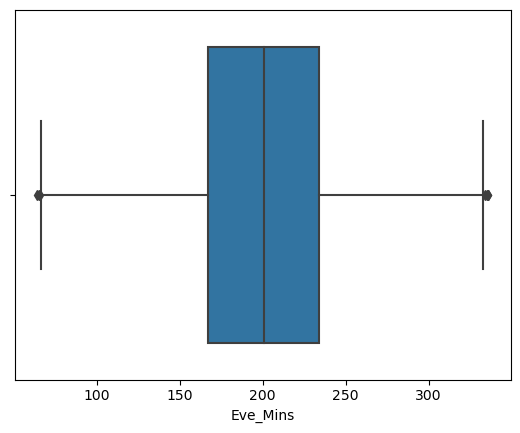

In [94]:
sns.boxplot(x=df.Eve_Mins)

### Eve_calls

C:\Users\sahir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

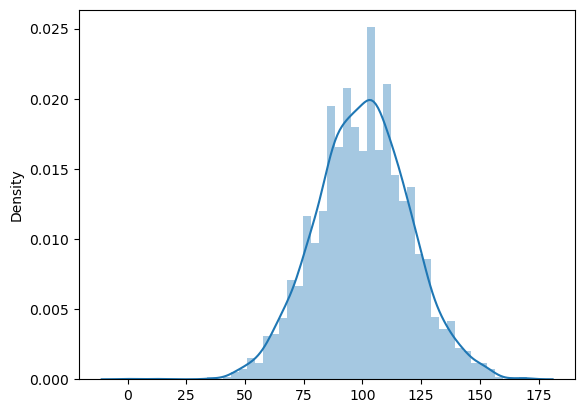

In [95]:
sns.distplot(x=df.Eve_calls)

In [96]:
IQR=stats.iqr(df.Eve_calls,interpolation='midpoint')
IQR

27.0

In [97]:
Q1=df.Eve_calls.quantile(0.25)
Q3=df.Eve_calls.quantile(0.75)

min_limit= Q1-1.5*IQR
max_limit= Q3+1.5*IQR

In [98]:
len(df.loc[df['Eve_calls']<min_limit])

13

In [99]:
len(df.loc[df['Eve_calls']>max_limit])

12

In [100]:
df.shape[0]
len(df.loc[df['Eve_calls']>max_limit]) 
12/4617*100

0.2599090318388564

In [101]:
df.shape[0]
len(df.loc[df['Eve_calls']<min_limit]) 
13/4617*100

0.2815681178254278

In [102]:
df.loc[df['Eve_calls']>max_limit,'Eve_calls']=np.median(df.Eve_calls)

In [103]:
df.loc[df['Eve_calls']<min_limit,'Eve_calls']=np.median(df.Eve_calls)

<AxesSubplot:xlabel='Eve_calls'>

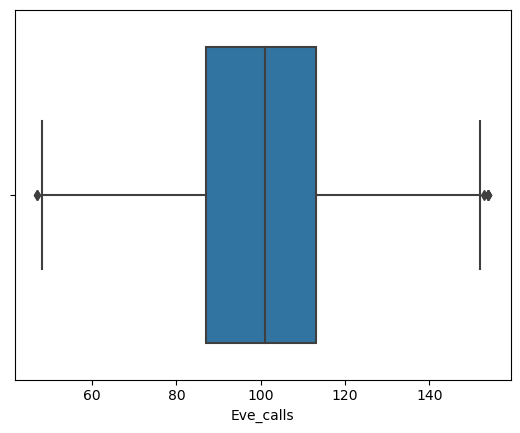

In [104]:
sns.boxplot(x=df.Eve_calls)

### Eve_Charge

C:\Users\sahir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

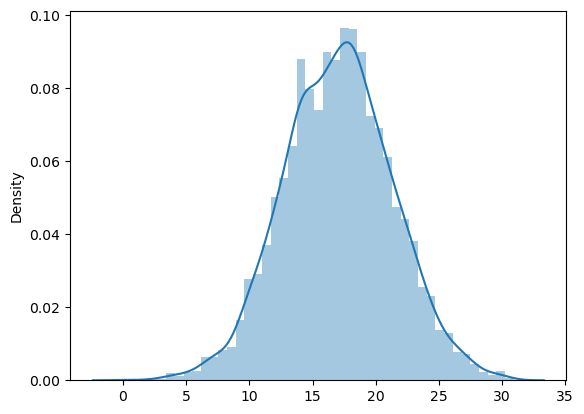

In [105]:
sns.distplot(x=df.Eve_Charge)

In [106]:
IQR=stats.iqr(df.Eve_Charge,interpolation='midpoint')
IQR

5.790000000000001

In [107]:
Q1=df.Eve_Charge.quantile(0.25)
Q3=df.Eve_Charge.quantile(0.75)

min_limit= Q1-1.5*IQR
max_limit= Q3+1.5*IQR

In [108]:
len(df.loc[df['Eve_Charge']<min_limit])

20

In [109]:
len(df.loc[df['Eve_Charge']>max_limit])

16

In [110]:
df.shape[0]
len(df.loc[df['Eve_Charge']>max_limit]) 
16/4617*100

0.3465453757851419

In [111]:
df.shape[0]
len(df.loc[df['Eve_Charge']<min_limit]) 
20/4617*100

0.43318171973142733

In [112]:
df.loc[df['Eve_Charge']>max_limit,'Eve_Charge']=np.median(df.Eve_Charge)

In [113]:
df.loc[df['Eve_Charge']<min_limit,'Eve_Charge']=np.median(df.Eve_Charge)

<AxesSubplot:xlabel='Eve_Charge'>

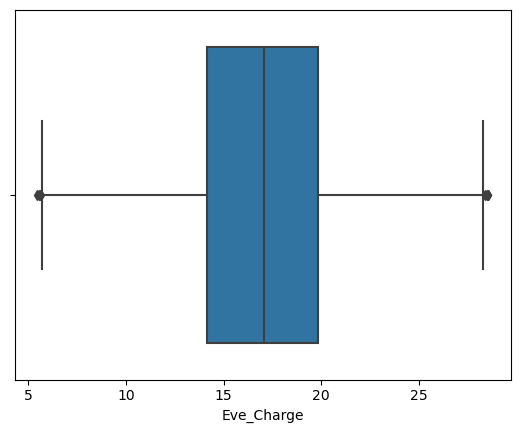

In [114]:
sns.boxplot(x=df.Eve_Charge)

### Night_Mins

C:\Users\sahir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

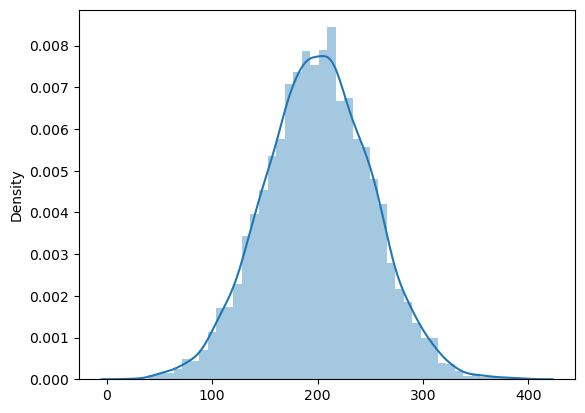

In [115]:
sns.distplot(x=df.Night_Mins)

In [116]:
IQR=stats.iqr(df.Night_Mins,interpolation='midpoint')


In [117]:
Q1=df.Night_Mins.quantile(0.25)
Q3=df.Night_Mins.quantile(0.75)

min_limit= Q1-1.5*IQR
max_limit= Q3+1.5*IQR

In [118]:
len(df.loc[df['Night_Mins']<min_limit])

19

In [119]:
len(df.loc[df['Night_Mins']>max_limit])

17

In [120]:
df.shape[0]
len(df.loc[df['Night_Mins']>max_limit]) 
17/4617*100

0.36820446177171323

In [121]:
df.shape[0]
len(df.loc[df['Night_Mins']<min_limit]) 
19/4617*100

0.411522633744856

In [122]:
df.loc[df['Night_Mins']>max_limit,'Night_Mins']=np.median(df.Night_Mins)

In [123]:
df.loc[df['Night_Mins']<min_limit,'Night_Mins']=np.median(df.Night_Mins)

<AxesSubplot:xlabel='Night_Mins'>

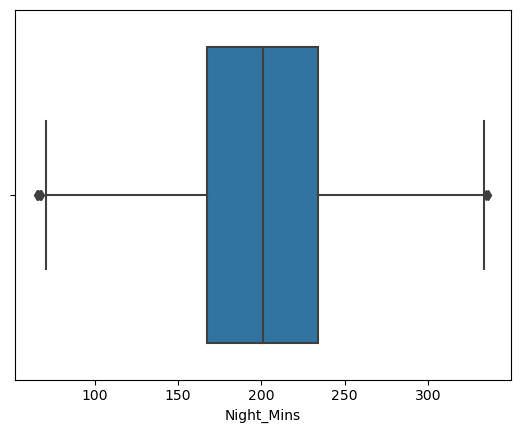

In [124]:
sns.boxplot(x=df.Night_Mins)

### Night_Calls

C:\Users\sahir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

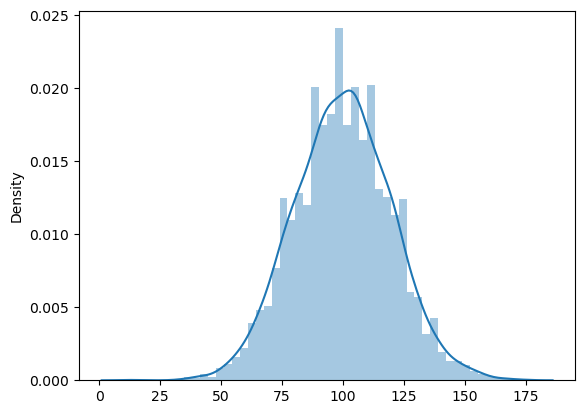

In [125]:
sns.distplot(x=df.Night_Calls)

In [126]:
IQR=stats.iqr(df.Night_Calls,interpolation='midpoint')
IQR

26.0

In [127]:
Q1=df.Night_Calls.quantile(0.25)
Q3=df.Night_Calls.quantile(0.75)

min_limit= Q1-1.5*IQR
max_limit= Q3+1.5*IQR

In [128]:
len(df.loc[df['Night_Calls']<min_limit])

16

In [129]:
len(df.loc[df['Night_Calls']>max_limit])

26

In [130]:
df.shape[0]
len(df.loc[df['Night_Calls']>max_limit]) 
26/4617*100

0.5631362356508556

In [131]:
df.shape[0]
len(df.loc[df['Night_Calls']<min_limit]) 
16/4617*100

0.3465453757851419

In [132]:
df.loc[df['Night_Calls']>max_limit,'Night_Calls']=np.median(df.Night_Calls)

In [133]:
df.loc[df['Night_Calls']<min_limit,'Night_Calls']=np.median(df.Night_Calls)

<AxesSubplot:xlabel='Night_Calls'>

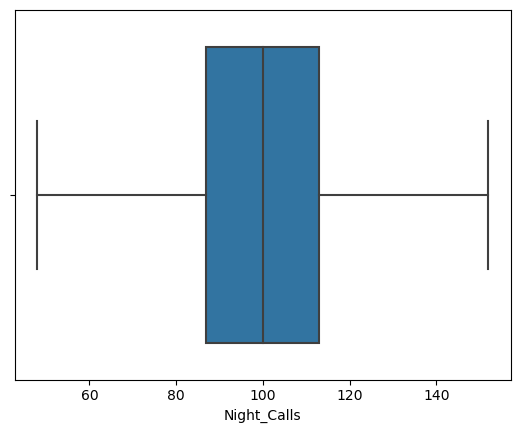

In [134]:
sns.boxplot(x=df.Night_Calls)

### International_Mins

C:\Users\sahir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

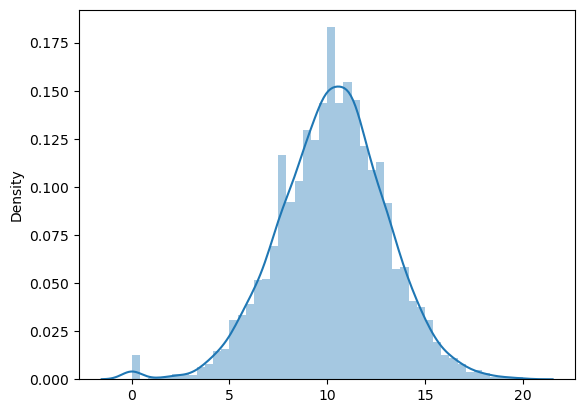

In [135]:
sns.distplot(x=df.International_Mins)

In [136]:
IQR=stats.iqr(df.International_Mins,interpolation='midpoint')
IQR

3.5

In [137]:
Q1=df.International_Mins.quantile(0.25)
Q3=df.International_Mins.quantile(0.75)

min_limit= Q1-1.5*IQR
max_limit= Q3+1.5*IQR

In [138]:
min_limit

3.3499999999999996

In [139]:
max_limit

17.35

In [140]:
len(df.loc[df['International_Mins']<min_limit])

42

In [141]:
len(df.loc[df['International_Mins']>max_limit])

23

In [142]:
df.shape[0]
len(df.loc[df['International_Mins']>max_limit]) 
23/4617*100

0.4981589776911414

In [143]:
df.shape[0]
len(df.loc[df['International_Mins']<min_limit]) 
42/4617*100

0.9096816114359974

In [144]:
df.loc[df['International_Mins']<min_limit,'International_Mins']=np.median(df.International_Mins)

In [145]:
df.loc[df['International_Mins']>max_limit,'International_Mins']=np.median(df.International_Mins)

<AxesSubplot:xlabel='International_Mins'>

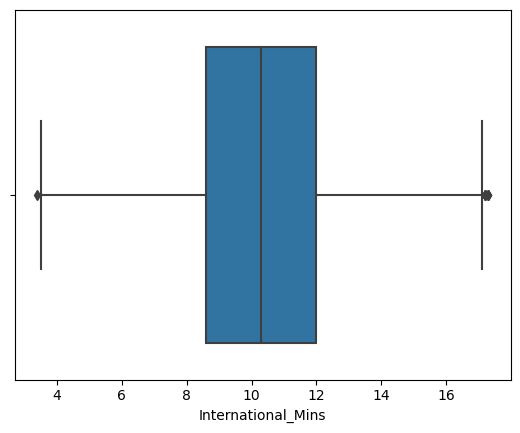

In [146]:
sns.boxplot(x=df.International_Mins)

### International_Calls

C:\Users\sahir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

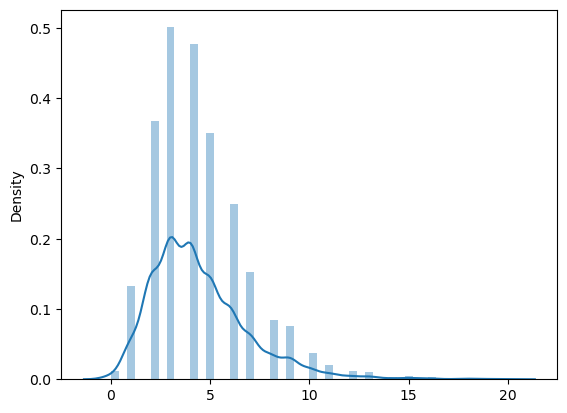

In [147]:
sns.distplot(x=df.International_Calls)

In [148]:
IQR=stats.iqr(df.International_Calls,interpolation='midpoint')
IQR

3.0

In [149]:
Q1=df.International_Calls.quantile(0.25)
Q3=df.International_Calls.quantile(0.75)

min_limit= Q1-1.5*IQR
max_limit= Q3+1.5*IQR

In [150]:
min_limit

-1.5

In [151]:
max_limit

10.5

In [152]:
len(df.loc[df['International_Calls']<min_limit])

0

In [153]:
len(df.loc[df['International_Calls']>max_limit])

107

In [154]:
df.shape[0]
len(df.loc[df['International_Calls']>max_limit]) 
107/4617*100

2.317522200563136

In [155]:
df.shape[0]
len(df.loc[df['International_Calls']<min_limit]) 
0/4617*100

0.0

In [156]:
df.loc[df['International_Calls']>max_limit,'International_Calls']=np.median(df.International_Calls)

<AxesSubplot:xlabel='International_Calls'>

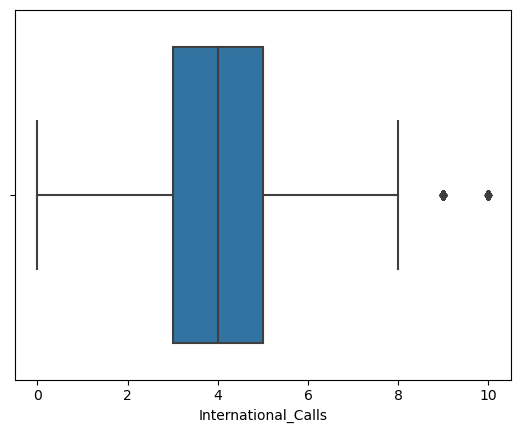

In [157]:
sns.boxplot(x=df.International_Calls)

### International_Charge

C:\Users\sahir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

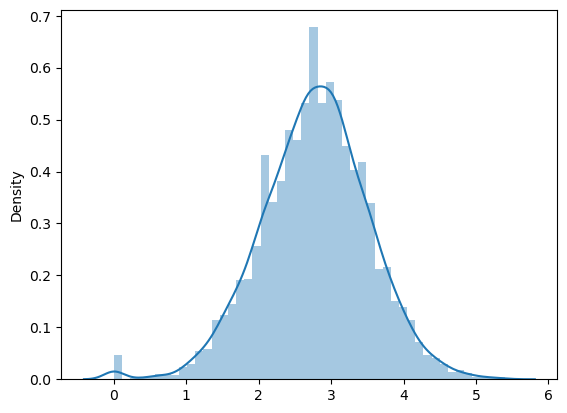

In [158]:
sns.distplot(x=df.International_Charge)

In [159]:
IQR=stats.iqr(df.International_Charge,interpolation='midpoint')
IQR

0.9500000000000002

In [160]:
Q1=df.International_Charge.quantile(0.25)
Q3=df.International_Charge.quantile(0.75)

min_limit= Q1-1.5*IQR
max_limit= Q3+1.5*IQR

In [161]:
min_limit

0.8949999999999996

In [162]:
max_limit

4.695

In [163]:
len(df.loc[df['International_Charge']<min_limit])

42

In [164]:
len(df.loc[df['International_Charge']>max_limit])

23

In [165]:
df.shape[0]
len(df.loc[df['International_Charge']>max_limit]) 
23/4617*100

0.4981589776911414

In [166]:
df.shape[0]
len(df.loc[df['International_Charge']<min_limit]) 
42/4617*100

0.9096816114359974

In [167]:
df.loc[df['International_Charge']<min_limit,'International_Charge']=np.median(df.International_Charge)

In [168]:
df.loc[df['International_Charge']>max_limit,'International_Charge']=np.median(df.International_Charge)

<AxesSubplot:xlabel='International_Charge'>

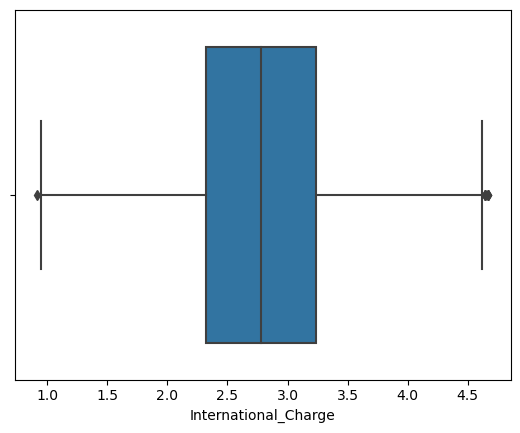

In [169]:
sns.boxplot(x=df.International_Charge)

### CustServ_Calls

C:\Users\sahir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

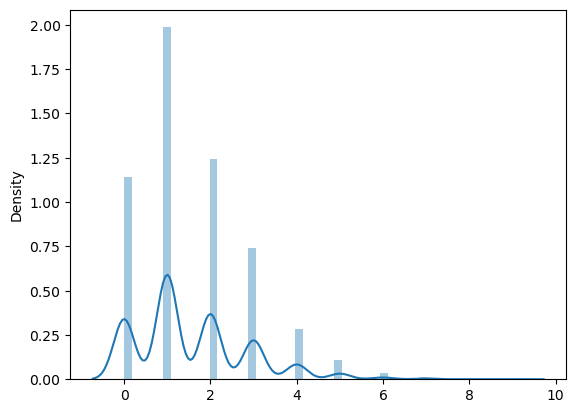

In [170]:
sns.distplot(x=df.CustServ_Calls)

In [171]:
IQR=stats.iqr(df.CustServ_Calls,interpolation='midpoint')
IQR

1.0

In [172]:
Q1=df.CustServ_Calls.quantile(0.25)
Q3=df.CustServ_Calls.quantile(0.75)

min_limit= Q1-1.5*IQR
max_limit= Q3+1.5*IQR

In [173]:
min_limit

-0.5

In [174]:
max_limit

3.5

In [175]:
len(df.loc[df['CustServ_Calls']<min_limit])

0

In [176]:
len(df.loc[df['CustServ_Calls']>max_limit])

368

In [177]:
df.shape[0]
len(df.loc[df['CustServ_Calls']>max_limit]) 
368/4617*100

7.970543643058263

In [178]:
df.to_csv('df.csv')

In [179]:
df=pd.read_csv('df.csv')

In [180]:
df.head()

Unnamed: 0.1  Unnamed: 0  State  Account_Length  Area_code      Phone  \
0             0           0     16             128        415   382-4657   
1             1           1      4             107        415   371-7191   
2             2           2      9             137        415   358-1921   
3             3           3      4              84        408   375-9999   
4             4           4     40              75        415   330-6626   

   International_Plan  VMail_Plan  VMail_Message  Day_Mins  Day_calls  \
0                   0           1             25     265.1        110   
1                   0           1             26     161.6        123   
2                   0           0              0     243.4        114   
3                   1           0              0     299.4         71   
4                   1           0              0     166.7        113   

   Day_Charge  Eve_Mins  Eve_calls  Eve_Charge  Night_Mins  Night_Calls  \
0       45.07     197.4         99       16.78       244.7           91   
1       27.47     195.5        103       16.62       254.4          103   
2       41.38     121.2        110       10.30       162.6          104   
3       50.90     200.8         88       17.07       196.9           89   
4       28.34     148.3        122       12.61       186.9          121   

   Night_Charge  International_Mins  International_Calls  \
0         11.01                10.0                    3   
1         11.45                13.7                    3   
2          7.32                12.2                    5   
3          8.86                 6.6                    7   
4          8.41                10.1                    3   

   International_Charge  CustServ_Calls  Churn  
0                  2.70               1      0  
1                  3.70               1      0  
2                  3.29               0      0  
3                  1.78               2      0  
4                  2.73               3      0

### Scaling

In [181]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
df[['Account_Length','Area_code','International_Plan','VMail_Plan','VMail_Message','Day_Mins','Day_calls','Day_Charge','Eve_Mins','Eve_calls','Eve_Charge','Night_Mins','Night_Calls','Night_Charge','International_Mins','International_Calls','International_Charge','CustServ_Calls']]=scale.fit_transform(df[['Account_Length','Area_code','International_Plan','VMail_Plan','VMail_Message','Day_Mins','Day_calls','Day_Charge','Eve_Mins','Eve_calls','Eve_Charge','Night_Mins','Night_Calls','Night_Charge','International_Mins','International_Calls','International_Charge','CustServ_Calls']])

In [182]:
df.duplicated().sum()

0

In [193]:
df.to_csv('data.csv')

In [5]:
df=pd.read_csv('data.csv')
df

Unnamed: 0.1  Unnamed: 0  State  Account_Length  Area_code      Phone  \
0                0           0     16        0.622549   0.068627   382-4657   
1                1           1      4        0.519608   0.068627   371-7191   
2                2           2      9        0.666667   0.068627   358-1921   
3                3           3      4        0.406863   0.000000   375-9999   
4                4           4     40        0.362745   0.068627   330-6626   
...            ...         ...    ...             ...        ...        ...   
4612          4612        4612      7        0.274510   1.000000   345-7512   
4613          4613        4613     32        0.862745   0.000000   343-6820   
4614          4614        4614     17        0.323529   0.000000   338-4794   
4615          4615        4615     14        0.475490   0.068627   355-8388   
4616          4616        4616     28        0.681373   0.068627   409-6884   

      International_Plan  VMail_Plan  VMail_Message  Day_Mins  Day_calls  \
0                    0.0         1.0       0.595238  0.789835   0.596154   
1                    0.0         1.0       0.619048  0.434409   0.721154   
2                    0.0         0.0       0.000000  0.715316   0.634615   
3                    1.0         0.0       0.000000  0.907624   0.221154   
4                    1.0         0.0       0.000000  0.451923   0.625000   
...                  ...         ...            ...       ...        ...   
4612                 0.0         1.0       0.595238  0.373970   0.317308   
4613                 0.0         1.0       0.690476  0.528503   0.413462   
4614                 0.0         1.0       0.785714  0.317308   0.750000   
4615                 0.0         1.0       0.547619  0.459478   0.480769   
4616                 0.0         0.0       0.000000  0.582418   0.500000   

      Day_Charge  Eve_Mins  Eve_calls  Eve_Charge  Night_Mins  Night_Calls  \
0       0.789899  0.489879   0.485981    0.489822    0.661982     0.413462   
1       0.434343  0.482886   0.523364    0.482893    0.697855     0.528846   
2       0.715354  0.209422   0.588785    0.209181    0.358358     0.538462   
3       0.907677  0.502392   0.383178    0.502382    0.485207     0.394231   
4       0.451919  0.309165   0.700935    0.309225    0.448225     0.701923   
...          ...       ...        ...         ...         ...          ...   
4612    0.373939  0.452337   0.607477    0.452144    0.343565     0.711538   
4613    0.528485  0.878911   0.457944    0.878735    0.362056     0.653846   
4614    0.317374  0.853147   0.766355    0.853183    0.500000     0.413462   
4615    0.459394  0.596246   0.654206    0.596362    0.369083     0.461538   
4616    0.582424  0.230033   0.560748    0.229970    0.507027     0.644231   

      Night_Charge  International_Mins  International_Calls  \
0         0.595935            0.474820                  0.3   
1         0.622236            0.741007                  0.3   
2         0.375374            0.633094                  0.5   
3         0.467424            0.230216                  0.7   
4         0.440526            0.482014                  0.3   
...            ...                 ...                  ...   
4612      0.364614            0.366906                  0.6   
4613      0.377764            0.884892                  0.1   
4614      0.478183            0.690647                  0.3   
4615      0.383144            0.784173                  0.3   
4616      0.483562            0.625899                  0.4   

      International_Charge  CustServ_Calls  Churn  
0                 0.474667        0.111111      0  
1                 0.741333        0.111111      0  
2                 0.632000        0.000000      0  
3                 0.229333        0.222222      0  
4                 0.482667        0.333333      0  
...                    ...             ...    ...  
4612              0.368000        0.333333      0  
4613              0.885333        

## Feature Selection

<AxesSubplot:>

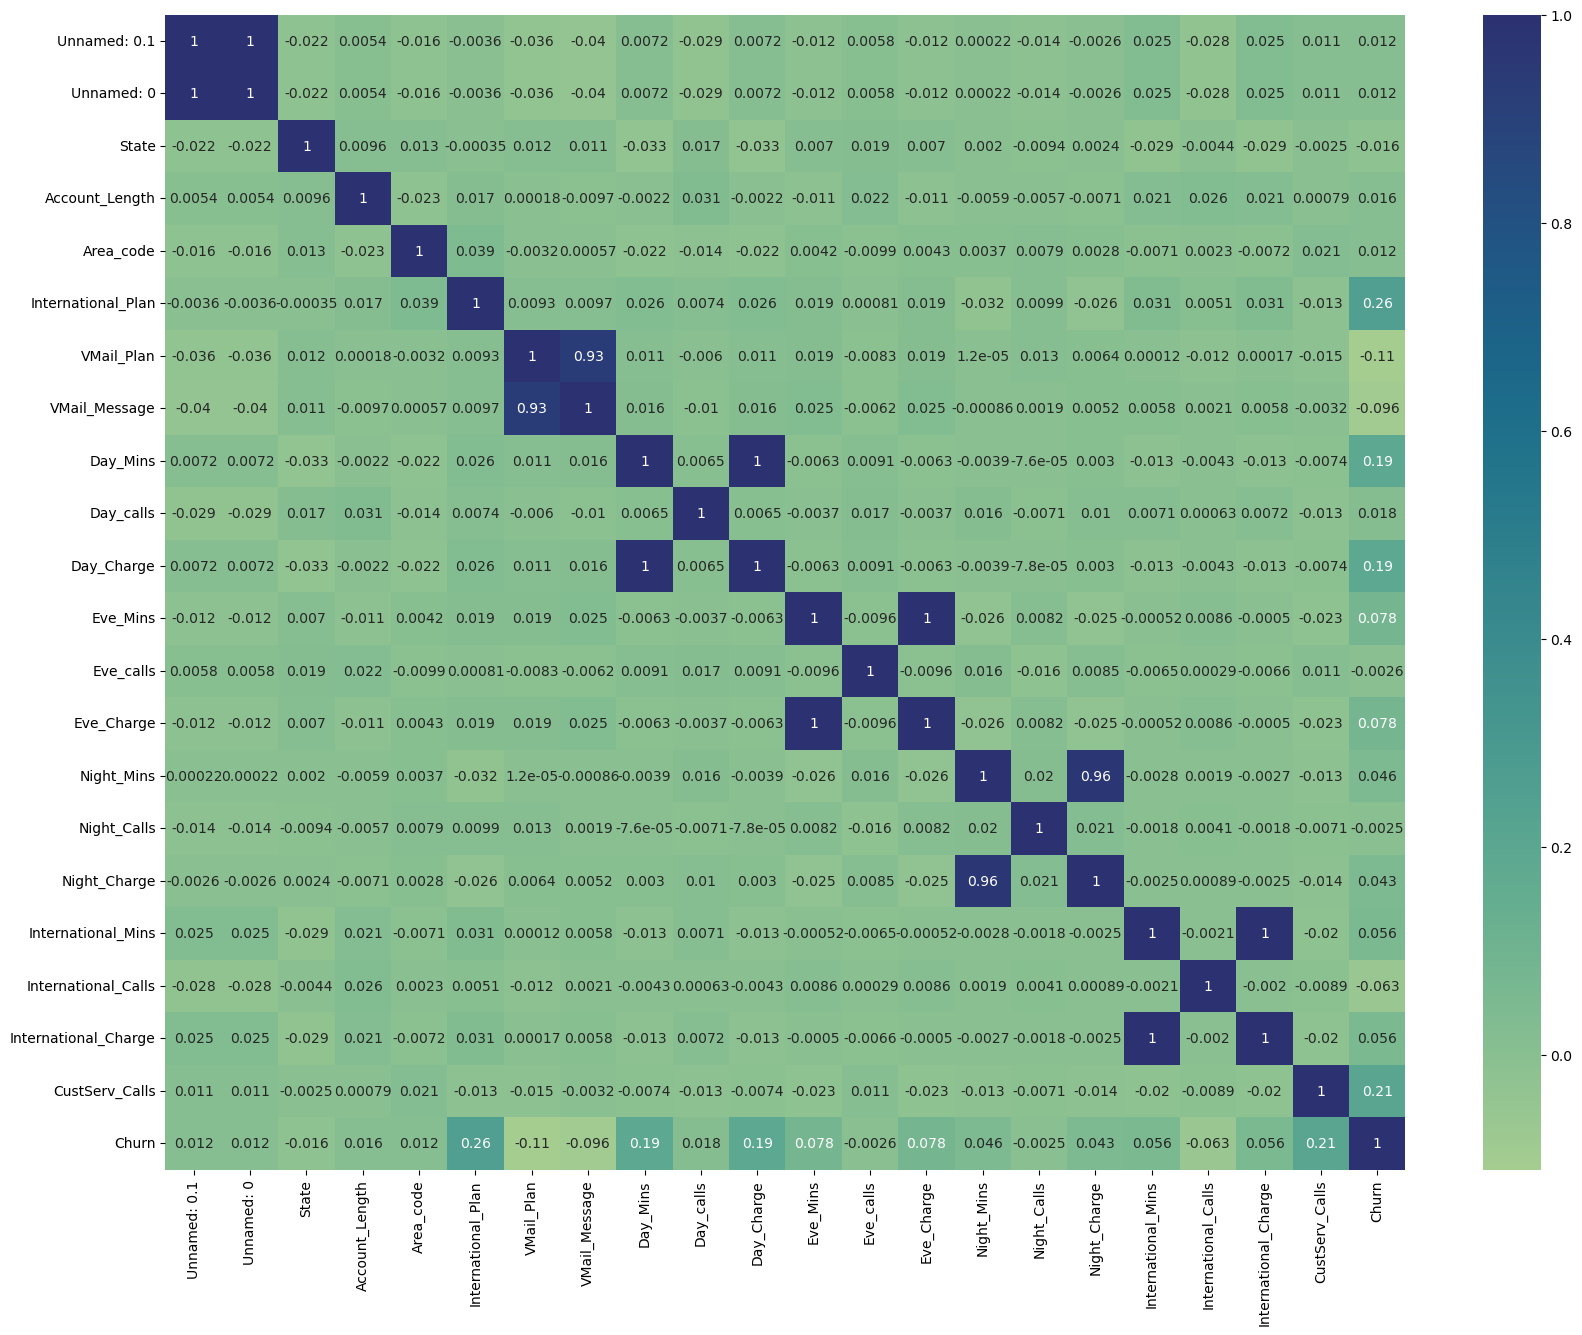

In [179]:
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,cmap="crest")

-  Let's remove one feature from each of the highly correlated pairs: Eve charge from the pair with Eve Mins Day Charge from the pair with Day Mins, Night Charge from the pair with Night Mins, Intl Charge from the pair with Intl Mins:

In [13]:
df.head(2)

Unnamed: 0  State  Account_Length  Area_code      Phone  \
0           0     16        0.524793   0.068627   382-4657   
1           1      4        0.438017   0.068627   371-7191   

   International_Plan  VMail_Plan  VMail_Message  Day_Mins  Day_calls  ...  \
0                 0.0         1.0       0.490196  0.754196   0.666667  ...   
1                 0.0         1.0       0.509804  0.459744   0.745455  ...   

   Eve_calls  Eve_Charge  Night_Mins  Night_Calls  Night_Charge  \
0   0.582353    0.542866     0.59575     0.484663      0.595935   
1   0.605882    0.537690     0.62184     0.558282      0.622236   

   International_Mins  International_Calls  International_Charge  \
0               0.500                 0.15              0.500000   
1               0.685                 0.15              0.685185   

   CustServ_Calls  Churn  
0        0.111111      0  
1        0.111111      0  

[2 rows x 22 columns]

In [6]:
df.drop(['State','Unnamed: 0.1','Unnamed: 0','Day_Mins','Day_calls','Eve_Mins','Eve_calls','Night_Mins','Night_Calls','International_Mins','International_Calls','Area_code','Phone','VMail_Message'],axis=1,inplace=True)

In [7]:
df

Account_Length  International_Plan  VMail_Plan  Day_Charge  Eve_Charge  \
0           0.622549                 0.0         1.0    0.789899    0.489822   
1           0.519608                 0.0         1.0    0.434343    0.482893   
2           0.666667                 0.0         0.0    0.715354    0.209181   
3           0.406863                 1.0         0.0    0.907677    0.502382   
4           0.362745                 1.0         0.0    0.451919    0.309225   
...              ...                 ...         ...         ...         ...   
4612        0.274510                 0.0         1.0    0.373939    0.452144   
4613        0.862745                 0.0         1.0    0.528485    0.878735   
4614        0.323529                 0.0         1.0    0.317374    0.853183   
4615        0.475490                 0.0         1.0    0.459394    0.596362   
4616        0.681373                 0.0         0.0    0.582424    0.229970   

      Night_Charge  International_Charge  CustServ_Calls  Churn  
0         0.595935              0.474667        0.111111      0  
1         0.622236              0.741333        0.111111      0  
2         0.375374              0.632000        0.000000      0  
3         0.467424              0.229333        0.222222      0  
4         0.440526              0.482667        0.333333      0  
...            ...                   ...             ...    ...  
4612      0.364614              0.368000        0.333333      0  
4613      0.377764              0.885333        0.333333      0  
4614      0.478183              0.690667        0.111111      0  
4615      0.383144              0.784000        0.000000      0  
4616      0.483562              0.626667        0.222222      0  

[4617 rows x 9 columns]

## Model Creation

In [8]:
X=df.loc[:,[ 'Account_Length', 'International_Plan', 'VMail_Plan',
       'Day_Charge', 'Eve_Charge',
       'Night_Charge', 'International_Charge',
       'CustServ_Calls']]
y=df.Churn

In [9]:
X

Account_Length  International_Plan  VMail_Plan  Day_Charge  Eve_Charge  \
0           0.622549                 0.0         1.0    0.789899    0.489822   
1           0.519608                 0.0         1.0    0.434343    0.482893   
2           0.666667                 0.0         0.0    0.715354    0.209181   
3           0.406863                 1.0         0.0    0.907677    0.502382   
4           0.362745                 1.0         0.0    0.451919    0.309225   
...              ...                 ...         ...         ...         ...   
4612        0.274510                 0.0         1.0    0.373939    0.452144   
4613        0.862745                 0.0         1.0    0.528485    0.878735   
4614        0.323529                 0.0         1.0    0.317374    0.853183   
4615        0.475490                 0.0         1.0    0.459394    0.596362   
4616        0.681373                 0.0         0.0    0.582424    0.229970   

      Night_Charge  International_Charge  CustServ_Calls  
0         0.595935              0.474667        0.111111  
1         0.622236              0.741333        0.111111  
2         0.375374              0.632000        0.000000  
3         0.467424              0.229333        0.222222  
4         0.440526              0.482667        0.333333  
...            ...                   ...             ...  
4612      0.364614              0.368000        0.333333  
4613      0.377764              0.885333        0.333333  
4614      0.478183              0.690667        0.111111  
4615      0.383144              0.784000        0.000000  
4616      0.483562              0.626667        0.222222  

[4617 rows x 8 columns]

In [187]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4612    0
4613    0
4614    0
4615    0
4616    0
Name: Churn, Length: 4617, dtype: int64

In [185]:
df.to_csv('dff.csv')

In [186]:
df1=pd.read_csv('dff.csv')

In [208]:
df1

Unnamed: 0  Account_Length  International_Plan  VMail_Plan  Day_Charge  \
0              0             128                   0           1       45.07   
1              1             107                   0           1       27.47   
2              2             137                   0           0       41.38   
3              3              84                   1           0       50.90   
4              4              75                   1           0       28.34   
...          ...             ...                 ...         ...         ...   
4612        4612              57                   0           1       24.48   
4613        4613             177                   0           1       32.13   
4614        4614              67                   0           1       21.68   
4615        4615              98                   0           1       28.71   
4616        4616             140                   0           0       34.80   

      Eve_Charge  Night_Charge  International_Charge  CustServ_Calls  Churn  
0          16.78         11.01                  2.70               1      0  
1          16.62         11.45                  3.70               1      0  
2          10.30          7.32                  3.29               0      0  
3          17.07          8.86                  1.78               2      0  
4          12.61          8.41                  2.73               3      0  
...          ...           ...                   ...             ...    ...  
4612       15.91          7.14                  2.30               3      0  
4613       25.76          7.36                  4.24               3      0  
4614       25.17          9.04                  3.51               1      0  
4615       19.24          7.45                  3.86               0      0  
4616       10.78          9.13                  3.27               2      0  

[4617 rows x 10 columns]

In [209]:
df1.drop(['Unnamed:0'],axis=1,inplace=True) 

KeyError: "['Unnamed:0'] not found in axis"

In [10]:
## Balacing the data
from collections import Counter# importing counter to check count of each label
from imblearn.over_sampling import SMOTE #for balancing the data
sm=SMOTE()#object creation
print(Counter(y))# checking count for each class 
X_smote,y_smote=sm.fit_resample(X,y)#applying sampling on target variable 
print(Counter(y_smote))# checking count after sampling for  each class

Counter({0: 3961, 1: 656})
Counter({0: 3961, 1: 3961})


## RandomForest

In [194]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=50)

In [195]:
from sklearn.ensemble import RandomForestClassifier

In [196]:
rf=RandomForestClassifier()

In [197]:
rf.fit(X_smote,y_smote)

RandomForestClassifier()

In [198]:
y1=rf.predict(X_test)

In [199]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,f1_score,recall_score,precision_score

In [200]:
print(accuracy_score(y_test,y1))

1.0


In [201]:
print(f1_score(y_test,y1))

1.0


In [202]:
print(recall_score(y_test,y1))

1.0


In [186]:
pd.crosstab(y_test,y1)

col_0    0    1
Churn          
0      790    0
1        0  134

From this table, we can see that there are a total of 1155 observations. Out of these, 1033 were predicted as class 0 (978 true negatives and 55 false negatives), and 122 were predicted as class 1 (13 false positives and 109 true positives).

In [22]:
print(classification_report(y_test,y1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       790
           1       1.00      1.00      1.00       134

    accuracy                           1.00       924
   macro avg       1.00      1.00      1.00       924
weighted avg       1.00      1.00      1.00       924



## hyperparameter tuning to reduce overftting 

In [148]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# define the Random Forest classifier
rf = RandomForestClassifier()

# define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [10,50,100],  # number of trees in the forest
    'max_depth': [1,2,3],  # maximum depth of the tree
    'min_samples_split': [3,4,5],  # minimum number of samples required to split an internal node
    'min_samples_leaf': [1,3,4], # minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2'],  # number of features to consider when looking for the best split
    'max_samples': [0.3, 0.5, 0.6]  # number
}

# define the GridSearchCV object with the defined hyperparameters and cross-validation strategy
rf_cv = GridSearchCV(rf, param_grid, cv=5)

# fit the GridSearchCV object on the training data
rf_cv.fit(X_smote, y_smote)

# print the best hyperparameters and the corresponding score
print("Best hyperparameters: ", rf_cv.best_params_)
print("Best score: ", rf_cv.best_score_)


Best hyperparameters:  {'max_depth': 3, 'max_features': 'sqrt', 'max_samples': 0.3, 'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 100}
Best score:  0.8442312717076124


In [174]:
# Initialize a random forest classifier with the best hyperparameters
rf_clf = RandomForestClassifier(max_depth=20,max_features='log2',max_samples=0.3, min_samples_leaf=4, min_samples_split=4, n_estimators=100)

# Train the model on the entire training dataset
rf_clf.fit(X_smote, y_smote)

# Make predictions on the test dataset
y_predrf = rf_clf.predict(X_test)

# Evaluate the performance of the model on the test dataset
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predrf))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       799
           1       0.65      0.87      0.74       125

    accuracy                           0.92       924
   macro avg       0.81      0.90      0.85       924
weighted avg       0.93      0.92      0.92       924



In [175]:
# Make predictions on the training set and calculate the accuracy
train_predr= rf_clf.predict(X_smote)
train_acc = accuracy_score(y_smote, train_predr)

# Make predictions on the test set and calculate the accuracy
test_predr = rf_clf.predict(X_test)
test_acc = accuracy_score(y_test, test_predr)

# Print the training and test accuracy
print("Training accuracy:", train_acc)
print("Test accuracy:", test_acc)

Training accuracy: 0.9256500883615248
Test accuracy: 0.9188311688311688


In [33]:

from sklearn.model_selection import cross_val_score

# Evaluate the model using cross-validation
ran_scores = cross_val_score(rf_clf, X, y, cv=5)  # use 5-fold cross-validation
mean_score = np.mean(ran_scores)
std_score = np.std(ran_scores)

# Print the results
print("Cross-validation scores:", ran_scores)
print("Mean score:", mean_score)
print("Standard deviation:", std_score)

Cross-validation scores: [0.92099567 0.92424242 0.92091008 0.93391116 0.92091008]
Mean score: 0.9241938812361348
Standard deviation: 0.005024403510592494


The cross-validation scores indicate that the model is performing consistently well across different folds, with a mean score of 0.90 and a standard deviation of 0.001, suggesting that the model is not overfitting to the training data.

In [277]:
from sklearn.metrics import roc_auc_score,roc_curve

In [278]:
roc_curve(y_test,y1)

(array([0.        , 0.00759494, 1.        ]),
 array([0.        , 0.59701493, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [279]:
# Predict probabilities for test data
y_pred_prob = rf.predict_proba(X_test)[:,1]

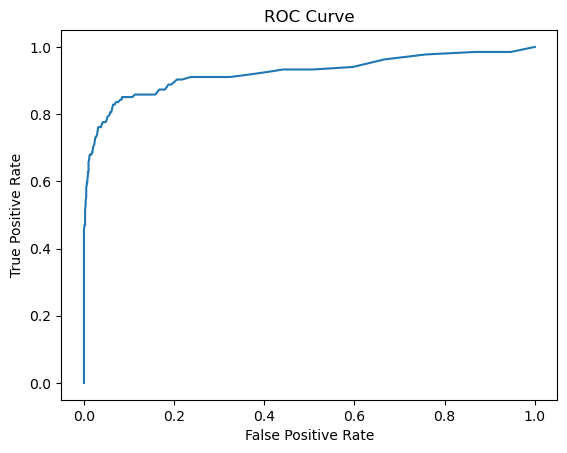

AUC: 0.9226006045720765


In [280]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)  ## tpr=true positive rate , fpr=false positve rate

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_prob)
print('AUC:', auc)

the AUC is 0.9, which is a good performance. The true positive rate (TPR) is 0.85, which means that 85% of the actual positive instances are correctly classified as positive. The false positive rate (FPR) is 0.1, which means that 10% of the actual negative instances are incorrectly classified as positive.

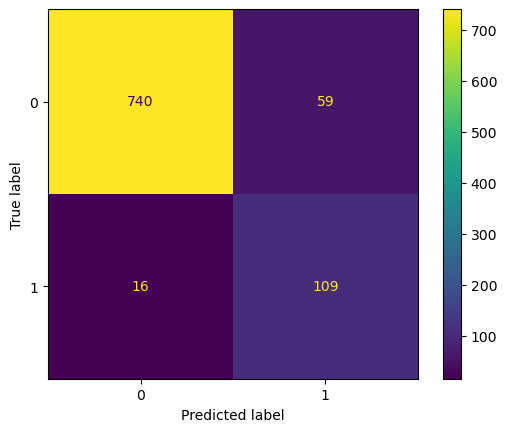

In [176]:
cm = confusion_matrix(y_test, test_predr, labels=rf_clf.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=rf_clf.classes_)
display.plot()

From the confusion matrix :

There are 740 true negatives (TN) - instances where the actual label is 0 and the model predicted 0.
There are 59 false positives (FP) - instances where the actual label is 0 but the model predicted 1.
There are 16 false negatives (FN) - instances where the actual label is 1 but the model predicted 0.
There are 109 true positives (TP) - instances where the actual label is 1 and the model predicted 1.

## Logistic Regression

In [203]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,f1_score,recall_score,precision_score
from sklearn.metrics import roc_auc_score,roc_curve

In [204]:
## Step 2 Creating training and testing data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [205]:
## Step 3 Model creation
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [206]:
## Step 4 Prediction
y_predl=clf.predict(X_test)

In [207]:
len(y_predl)

924

In [208]:
len(y_test)

924

In [209]:
pd.crosstab(y_predl,y_test)

Churn    0    1
row_0          
0      772  103
1       27   22

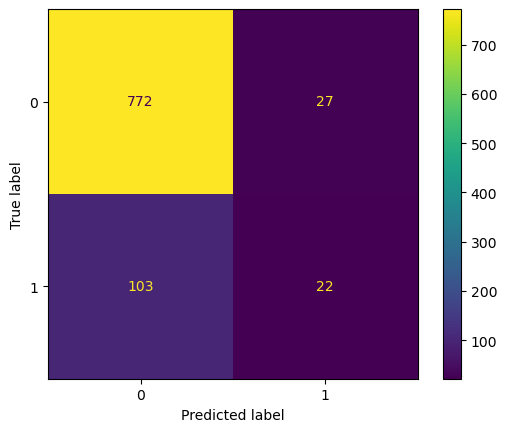

In [210]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_predl, labels=clf.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=clf.classes_)
display.plot()

From the confusion matrix :

- There are 772 true negatives (TN) - instances where the actual label is 0 and the model predicted 0.
- There are 27 false positives (FP) - instances where the actual label is 0 but the model predicted 1.
- There are 103 false negatives (FN) - instances where the actual label is 1 but the model predicted 0.
- There are 22 true positives (TP) - instances where the actual label is 1 and the model predicted 1.



In [211]:
recall=recall_score(y_test,y_predl)
recall

0.176

In [212]:
precision=precision_score(y_test,y_predl)
precision

0.4489795918367347

In [213]:
f1score=f1_score(y_test,y_predl)
f1score

0.25287356321839083

In [214]:
cr=classification_report(y_test,y_predl)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       799
           1       0.45      0.18      0.25       125

    accuracy                           0.86       924
   macro avg       0.67      0.57      0.59       924
weighted avg       0.82      0.86      0.83       924



In [220]:
from sklearn.model_selection import cross_val_score
# Evaluate the model using cross-validation
cv_scores = cross_val_score(clf, X, y, cv=5)  # use 5-fold cross-validation
mean_score = np.mean(cv_scores)
std_score = np.std(cv_scores)

# Print the results
print("Cross-validation scores:", cv_scores)
print("Mean score:", mean_score)
print("Standard deviation:", std_score)

C:\Users\sahir\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sahir\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Cross-validation scores: [0.86363636 0.8517316  0.86348862 0.85915493 0.86457205]
Mean score: 0.8605167133336147
Standard deviation: 0.004775831839018343


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The cross-validation scores indicate that the model's performance is consistent across different folds of the data, with a mean score of 0.864 and a low standard deviation of 0.005. This means that the model is not overfitting to the training data and is likely to perform similarly well on new, unseen data.

In [205]:
# Predict probabilities for test data
y_pred_probl = clf.predict_proba(X_test)[:,1]

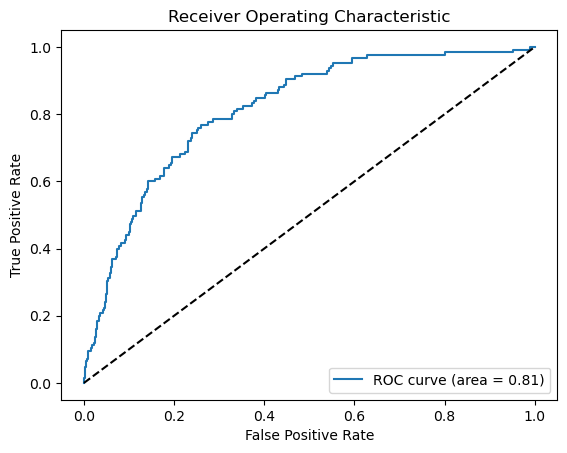

In [261]:

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probl)
roc_auc = roc_auc_score(y_test, y_pred_probl)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

With AUC of 0.7, we can say that the logistic regression model has a moderate predictive power in distinguishing between positive and negative classes.

### hyperparamter tuning for logistic regression

In [314]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the logistic regression model
logreg = LogisticRegression(class_weight='balanced')


# Define the hyperparameters to be tuned
param_grid = {'C': [0.1, 1, 10, 110], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}

# Define the Grid Search object
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')

# Fit the Grid Search object to the data
grid_search.fit(X_smote, y_smote)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the logistic regression model with the best hyperparameters
logreg = LogisticRegression(**best_params,class_weight='balanced')
logreg.fit(X_smote, y_smote)


LogisticRegression(C=1, class_weight='balanced', penalty='l1',
                   solver='liblinear')

In [232]:
logreg = LogisticRegression(C=1, class_weight='balanced', penalty='l2',
                   solver='liblinear')
logreg.fit(X_smote, y_smote)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

In [233]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.74      0.83       799
           1       0.31      0.76      0.44       125

    accuracy                           0.74       924
   macro avg       0.63      0.75      0.64       924
weighted avg       0.87      0.74      0.78       924



In [323]:
logreg = LogisticRegression(C=10, class_weight={0: 0.2, 1: 0.9}, penalty='l1',
                   solver='liblinear')
logreg.fit(X_smote, y_smote)

# Make predictions using predict_proba()
y_proba = logreg.predict_proba(X_test)[:, 1] # probability of class 1 (churn)

# Adjust the decision threshold
threshold = 0.8
y_predl = (y_proba > threshold).astype(int)

# Evaluate the model performance
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predl))

              precision    recall  f1-score   support

           0       0.96      0.72      0.82       799
           1       0.31      0.81      0.45       125

    accuracy                           0.73       924
   macro avg       0.64      0.76      0.64       924
weighted avg       0.87      0.73      0.77       924



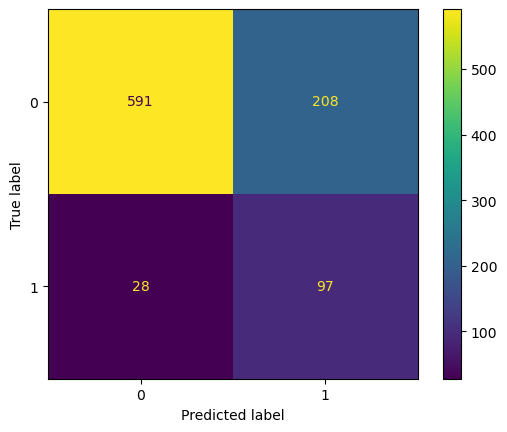

In [324]:
cm = confusion_matrix(y_test, y_pred, labels=logreg.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
display.plot()

The confusion matrix shows the following:

- 591 true negatives (TN): instances that are actually negative and predicted as negative.
- 208 false positives (FP): instances that are actually negative but predicted as positive.
- 28 false negatives (FN): instances that are actually positive but predicted as negative.
- 97 true positives (TP): instances that are actually positive and predicted as positive

## SVM

In [234]:
## creating training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y,random_state=3)

In [242]:
from sklearn.svm import SVC
svclassifier = SVC() ## base model with default parameters
svclassifier.fit(X_train, y_train)


SVC()

In [243]:
# Predict output for X_test

y_hat1=svclassifier.predict(X_test)

In [244]:
y_hat1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [245]:
## evaluating the model created
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report,f1_score
acc=accuracy_score(y_test,y_hat1)
acc

0.9168831168831169

In [246]:
print(classification_report(y_test,y_hat1))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1003
           1       0.88      0.43      0.58       152

    accuracy                           0.92      1155
   macro avg       0.90      0.71      0.76      1155
weighted avg       0.91      0.92      0.90      1155



In [247]:
cm1=pd.crosstab(y_test,y_hat1)
cm1

col_0    0   1
Churn         
0      994   9
1       87  65

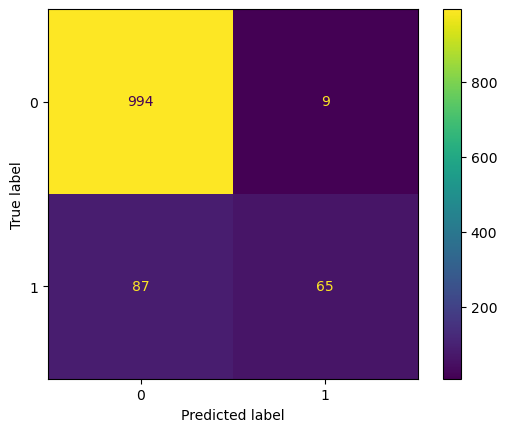

In [195]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,f1_score,recall_score,precision_score
from sklearn.metrics import roc_auc_score,roc_curve

cm = confusion_matrix(y_test, y_hat1, labels=svclassifier.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=svclassifier.classes_)
display.plot()

Based on the confusion matrix , the model seems to be doing well in predicting negative instances (label 0), as there are only 9 false negatives (predicted as 1 but actually 0) out of 1003 true negatives. However, it seems to struggle with positive instances (label 1), with 87 false negatives and 65 true positives out of 152 total positive instances.

### hyperparamter tuning for SVM

In [196]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# defining parameter range
param_grid = {'C': [10, 15, 20],
              'gamma': [0.001, 0.01, 0.1],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'class_weight': [None, 'balanced'],
              'probability': [True, False],
              'shrinking': [True, False],
              'tol': [0.0001, 0.001, 0.01]}

# create an SVC model
model = SVC()

# perform grid search with cross-validation
grid = GridSearchCV(model, param_grid, refit=True, verbose=2, scoring='accuracy', cv=2)
grid.fit(X, y)

# print best hyperparameters and performance
print("Best hyperparameters:", grid.best_params_)
print("Best score:", grid.best_score_)

# use the best hyperparameters to train the model
clf = SVC(**grid.best_params_)
clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)
print(classification_report(y_test, y_preds))


Fitting 2 folds for each of 864 candidates, totalling 1728 fits
[CV] END C=10, class_weight=None, gamma=0.001, kernel=linear, probability=True, shrinking=True, tol=0.0001; total time=   0.4s
[CV] END C=10, class_weight=None, gamma=0.001, kernel=linear, probability=True, shrinking=True, tol=0.0001; total time=   0.4s
[CV] END C=10, class_weight=None, gamma=0.001, kernel=linear, probability=True, shrinking=True, tol=0.001; total time=   0.4s
[CV] END C=10, class_weight=None, gamma=0.001, kernel=linear, probability=True, shrinking=True, tol=0.001; total time=   0.4s
[CV] END C=10, class_weight=None, gamma=0.001, kernel=linear, probability=True, shrinking=True, tol=0.01; total time=   0.4s
[CV] END C=10, class_weight=None, gamma=0.001, kernel=linear, probability=True, shrinking=True, tol=0.01; total time=   0.3s
[CV] END C=10, class_weight=None, gamma=0.001, kernel=linear, probability=True, shrinking=False, tol=0.0001; total time=   0.4s
[CV] END C=10, class_weight=None, gamma=0.001, kerne

[CV] END C=10, class_weight=None, gamma=0.001, kernel=rbf, probability=False, shrinking=True, tol=0.01; total time=   0.2s
[CV] END C=10, class_weight=None, gamma=0.001, kernel=rbf, probability=False, shrinking=False, tol=0.0001; total time=   0.3s
[CV] END C=10, class_weight=None, gamma=0.001, kernel=rbf, probability=False, shrinking=False, tol=0.0001; total time=   0.2s
[CV] END C=10, class_weight=None, gamma=0.001, kernel=rbf, probability=False, shrinking=False, tol=0.001; total time=   0.2s
[CV] END C=10, class_weight=None, gamma=0.001, kernel=rbf, probability=False, shrinking=False, tol=0.001; total time=   0.2s
[CV] END C=10, class_weight=None, gamma=0.001, kernel=rbf, probability=False, shrinking=False, tol=0.01; total time=   0.2s
[CV] END C=10, class_weight=None, gamma=0.001, kernel=rbf, probability=False, shrinking=False, tol=0.01; total time=   0.2s
[CV] END C=10, class_weight=None, gamma=0.001, kernel=sigmoid, probability=True, shrinking=True, tol=0.0001; total time=   0.5s

[CV] END C=10, class_weight=None, gamma=0.01, kernel=poly, probability=True, shrinking=False, tol=0.01; total time=   0.3s
[CV] END C=10, class_weight=None, gamma=0.01, kernel=poly, probability=True, shrinking=False, tol=0.01; total time=   0.3s
[CV] END C=10, class_weight=None, gamma=0.01, kernel=poly, probability=False, shrinking=True, tol=0.0001; total time=   0.0s
[CV] END C=10, class_weight=None, gamma=0.01, kernel=poly, probability=False, shrinking=True, tol=0.0001; total time=   0.1s
[CV] END C=10, class_weight=None, gamma=0.01, kernel=poly, probability=False, shrinking=True, tol=0.001; total time=   0.0s
[CV] END C=10, class_weight=None, gamma=0.01, kernel=poly, probability=False, shrinking=True, tol=0.001; total time=   0.0s
[CV] END C=10, class_weight=None, gamma=0.01, kernel=poly, probability=False, shrinking=True, tol=0.01; total time=   0.1s
[CV] END C=10, class_weight=None, gamma=0.01, kernel=poly, probability=False, shrinking=True, tol=0.01; total time=   0.0s
[CV] END C

[CV] END C=10, class_weight=None, gamma=0.1, kernel=linear, probability=True, shrinking=True, tol=0.01; total time=   0.4s
[CV] END C=10, class_weight=None, gamma=0.1, kernel=linear, probability=True, shrinking=True, tol=0.01; total time=   0.4s
[CV] END C=10, class_weight=None, gamma=0.1, kernel=linear, probability=True, shrinking=False, tol=0.0001; total time=   0.4s
[CV] END C=10, class_weight=None, gamma=0.1, kernel=linear, probability=True, shrinking=False, tol=0.0001; total time=   0.4s
[CV] END C=10, class_weight=None, gamma=0.1, kernel=linear, probability=True, shrinking=False, tol=0.001; total time=   0.4s
[CV] END C=10, class_weight=None, gamma=0.1, kernel=linear, probability=True, shrinking=False, tol=0.001; total time=   0.4s
[CV] END C=10, class_weight=None, gamma=0.1, kernel=linear, probability=True, shrinking=False, tol=0.01; total time=   0.4s
[CV] END C=10, class_weight=None, gamma=0.1, kernel=linear, probability=True, shrinking=False, tol=0.01; total time=   0.4s
[CV]

[CV] END C=10, class_weight=None, gamma=0.1, kernel=rbf, probability=False, shrinking=False, tol=0.01; total time=   0.2s
[CV] END C=10, class_weight=None, gamma=0.1, kernel=sigmoid, probability=True, shrinking=True, tol=0.0001; total time=   0.8s
[CV] END C=10, class_weight=None, gamma=0.1, kernel=sigmoid, probability=True, shrinking=True, tol=0.0001; total time=   0.8s
[CV] END C=10, class_weight=None, gamma=0.1, kernel=sigmoid, probability=True, shrinking=True, tol=0.001; total time=   0.8s
[CV] END C=10, class_weight=None, gamma=0.1, kernel=sigmoid, probability=True, shrinking=True, tol=0.001; total time=   0.8s
[CV] END C=10, class_weight=None, gamma=0.1, kernel=sigmoid, probability=True, shrinking=True, tol=0.01; total time=   0.7s
[CV] END C=10, class_weight=None, gamma=0.1, kernel=sigmoid, probability=True, shrinking=True, tol=0.01; total time=   0.8s
[CV] END C=10, class_weight=None, gamma=0.1, kernel=sigmoid, probability=True, shrinking=False, tol=0.0001; total time=   1.0s
[

[CV] END C=10, class_weight=balanced, gamma=0.001, kernel=poly, probability=False, shrinking=True, tol=0.001; total time=   0.5s
[CV] END C=10, class_weight=balanced, gamma=0.001, kernel=poly, probability=False, shrinking=True, tol=0.01; total time=   0.4s
[CV] END C=10, class_weight=balanced, gamma=0.001, kernel=poly, probability=False, shrinking=True, tol=0.01; total time=   0.5s
[CV] END C=10, class_weight=balanced, gamma=0.001, kernel=poly, probability=False, shrinking=False, tol=0.0001; total time=   0.4s
[CV] END C=10, class_weight=balanced, gamma=0.001, kernel=poly, probability=False, shrinking=False, tol=0.0001; total time=   0.5s
[CV] END C=10, class_weight=balanced, gamma=0.001, kernel=poly, probability=False, shrinking=False, tol=0.001; total time=   0.5s
[CV] END C=10, class_weight=balanced, gamma=0.001, kernel=poly, probability=False, shrinking=False, tol=0.001; total time=   0.5s
[CV] END C=10, class_weight=balanced, gamma=0.001, kernel=poly, probability=False, shrinking=

[CV] END C=10, class_weight=balanced, gamma=0.01, kernel=linear, probability=True, shrinking=False, tol=0.0001; total time=   1.7s
[CV] END C=10, class_weight=balanced, gamma=0.01, kernel=linear, probability=True, shrinking=False, tol=0.001; total time=   1.3s
[CV] END C=10, class_weight=balanced, gamma=0.01, kernel=linear, probability=True, shrinking=False, tol=0.001; total time=   1.4s
[CV] END C=10, class_weight=balanced, gamma=0.01, kernel=linear, probability=True, shrinking=False, tol=0.01; total time=   1.1s
[CV] END C=10, class_weight=balanced, gamma=0.01, kernel=linear, probability=True, shrinking=False, tol=0.01; total time=   1.1s
[CV] END C=10, class_weight=balanced, gamma=0.01, kernel=linear, probability=False, shrinking=True, tol=0.0001; total time=   0.2s
[CV] END C=10, class_weight=balanced, gamma=0.01, kernel=linear, probability=False, shrinking=True, tol=0.0001; total time=   0.2s
[CV] END C=10, class_weight=balanced, gamma=0.01, kernel=linear, probability=False, shrin

[CV] END C=10, class_weight=balanced, gamma=0.01, kernel=rbf, probability=False, shrinking=False, tol=0.01; total time=   0.7s
[CV] END C=10, class_weight=balanced, gamma=0.01, kernel=sigmoid, probability=True, shrinking=True, tol=0.0001; total time=   1.5s
[CV] END C=10, class_weight=balanced, gamma=0.01, kernel=sigmoid, probability=True, shrinking=True, tol=0.0001; total time=   1.5s
[CV] END C=10, class_weight=balanced, gamma=0.01, kernel=sigmoid, probability=True, shrinking=True, tol=0.001; total time=   1.6s
[CV] END C=10, class_weight=balanced, gamma=0.01, kernel=sigmoid, probability=True, shrinking=True, tol=0.001; total time=   1.4s
[CV] END C=10, class_weight=balanced, gamma=0.01, kernel=sigmoid, probability=True, shrinking=True, tol=0.01; total time=   1.4s
[CV] END C=10, class_weight=balanced, gamma=0.01, kernel=sigmoid, probability=True, shrinking=True, tol=0.01; total time=   1.4s
[CV] END C=10, class_weight=balanced, gamma=0.01, kernel=sigmoid, probability=True, shrinking

[CV] END C=10, class_weight=balanced, gamma=0.1, kernel=poly, probability=False, shrinking=True, tol=0.001; total time=   0.4s
[CV] END C=10, class_weight=balanced, gamma=0.1, kernel=poly, probability=False, shrinking=True, tol=0.01; total time=   0.3s
[CV] END C=10, class_weight=balanced, gamma=0.1, kernel=poly, probability=False, shrinking=True, tol=0.01; total time=   0.4s
[CV] END C=10, class_weight=balanced, gamma=0.1, kernel=poly, probability=False, shrinking=False, tol=0.0001; total time=   0.3s
[CV] END C=10, class_weight=balanced, gamma=0.1, kernel=poly, probability=False, shrinking=False, tol=0.0001; total time=   0.3s
[CV] END C=10, class_weight=balanced, gamma=0.1, kernel=poly, probability=False, shrinking=False, tol=0.001; total time=   0.3s
[CV] END C=10, class_weight=balanced, gamma=0.1, kernel=poly, probability=False, shrinking=False, tol=0.001; total time=   0.3s
[CV] END C=10, class_weight=balanced, gamma=0.1, kernel=poly, probability=False, shrinking=False, tol=0.01;

[CV] END C=15, class_weight=None, gamma=0.001, kernel=linear, probability=True, shrinking=False, tol=0.001; total time=   0.4s
[CV] END C=15, class_weight=None, gamma=0.001, kernel=linear, probability=True, shrinking=False, tol=0.001; total time=   0.4s
[CV] END C=15, class_weight=None, gamma=0.001, kernel=linear, probability=True, shrinking=False, tol=0.01; total time=   0.4s
[CV] END C=15, class_weight=None, gamma=0.001, kernel=linear, probability=True, shrinking=False, tol=0.01; total time=   0.4s
[CV] END C=15, class_weight=None, gamma=0.001, kernel=linear, probability=False, shrinking=True, tol=0.0001; total time=   0.1s
[CV] END C=15, class_weight=None, gamma=0.001, kernel=linear, probability=False, shrinking=True, tol=0.0001; total time=   1.1s
[CV] END C=15, class_weight=None, gamma=0.001, kernel=linear, probability=False, shrinking=True, tol=0.001; total time=   0.1s
[CV] END C=15, class_weight=None, gamma=0.001, kernel=linear, probability=False, shrinking=True, tol=0.001; tot

[CV] END C=15, class_weight=None, gamma=0.001, kernel=sigmoid, probability=True, shrinking=True, tol=0.001; total time=   0.6s
[CV] END C=15, class_weight=None, gamma=0.001, kernel=sigmoid, probability=True, shrinking=True, tol=0.001; total time=   0.5s
[CV] END C=15, class_weight=None, gamma=0.001, kernel=sigmoid, probability=True, shrinking=True, tol=0.01; total time=   0.5s
[CV] END C=15, class_weight=None, gamma=0.001, kernel=sigmoid, probability=True, shrinking=True, tol=0.01; total time=   0.5s
[CV] END C=15, class_weight=None, gamma=0.001, kernel=sigmoid, probability=True, shrinking=False, tol=0.0001; total time=   0.5s
[CV] END C=15, class_weight=None, gamma=0.001, kernel=sigmoid, probability=True, shrinking=False, tol=0.0001; total time=   0.5s
[CV] END C=15, class_weight=None, gamma=0.001, kernel=sigmoid, probability=True, shrinking=False, tol=0.001; total time=   0.5s
[CV] END C=15, class_weight=None, gamma=0.001, kernel=sigmoid, probability=True, shrinking=False, tol=0.001;

[CV] END C=15, class_weight=None, gamma=0.01, kernel=poly, probability=False, shrinking=False, tol=0.001; total time=   0.1s
[CV] END C=15, class_weight=None, gamma=0.01, kernel=poly, probability=False, shrinking=False, tol=0.01; total time=   0.0s
[CV] END C=15, class_weight=None, gamma=0.01, kernel=poly, probability=False, shrinking=False, tol=0.01; total time=   0.1s
[CV] END C=15, class_weight=None, gamma=0.01, kernel=rbf, probability=True, shrinking=True, tol=0.0001; total time=   1.0s
[CV] END C=15, class_weight=None, gamma=0.01, kernel=rbf, probability=True, shrinking=True, tol=0.0001; total time=   1.1s
[CV] END C=15, class_weight=None, gamma=0.01, kernel=rbf, probability=True, shrinking=True, tol=0.001; total time=   1.0s
[CV] END C=15, class_weight=None, gamma=0.01, kernel=rbf, probability=True, shrinking=True, tol=0.001; total time=   1.1s
[CV] END C=15, class_weight=None, gamma=0.01, kernel=rbf, probability=True, shrinking=True, tol=0.01; total time=   0.9s
[CV] END C=15, c

[CV] END C=15, class_weight=None, gamma=0.1, kernel=linear, probability=False, shrinking=True, tol=0.001; total time=   0.1s
[CV] END C=15, class_weight=None, gamma=0.1, kernel=linear, probability=False, shrinking=True, tol=0.01; total time=   0.1s
[CV] END C=15, class_weight=None, gamma=0.1, kernel=linear, probability=False, shrinking=True, tol=0.01; total time=   0.1s
[CV] END C=15, class_weight=None, gamma=0.1, kernel=linear, probability=False, shrinking=False, tol=0.0001; total time=   0.1s
[CV] END C=15, class_weight=None, gamma=0.1, kernel=linear, probability=False, shrinking=False, tol=0.0001; total time=   1.2s
[CV] END C=15, class_weight=None, gamma=0.1, kernel=linear, probability=False, shrinking=False, tol=0.001; total time=   0.1s
[CV] END C=15, class_weight=None, gamma=0.1, kernel=linear, probability=False, shrinking=False, tol=0.001; total time=   0.1s
[CV] END C=15, class_weight=None, gamma=0.1, kernel=linear, probability=False, shrinking=False, tol=0.01; total time=   0

[CV] END C=15, class_weight=None, gamma=0.1, kernel=sigmoid, probability=True, shrinking=False, tol=0.01; total time=   0.9s
[CV] END C=15, class_weight=None, gamma=0.1, kernel=sigmoid, probability=True, shrinking=False, tol=0.01; total time=   0.7s
[CV] END C=15, class_weight=None, gamma=0.1, kernel=sigmoid, probability=False, shrinking=True, tol=0.0001; total time=   0.1s
[CV] END C=15, class_weight=None, gamma=0.1, kernel=sigmoid, probability=False, shrinking=True, tol=0.0001; total time=   0.1s
[CV] END C=15, class_weight=None, gamma=0.1, kernel=sigmoid, probability=False, shrinking=True, tol=0.001; total time=   0.1s
[CV] END C=15, class_weight=None, gamma=0.1, kernel=sigmoid, probability=False, shrinking=True, tol=0.001; total time=   0.1s
[CV] END C=15, class_weight=None, gamma=0.1, kernel=sigmoid, probability=False, shrinking=True, tol=0.01; total time=   0.1s
[CV] END C=15, class_weight=None, gamma=0.1, kernel=sigmoid, probability=False, shrinking=True, tol=0.01; total time=  

[CV] END C=15, class_weight=balanced, gamma=0.001, kernel=rbf, probability=True, shrinking=True, tol=0.001; total time=   2.6s
[CV] END C=15, class_weight=balanced, gamma=0.001, kernel=rbf, probability=True, shrinking=True, tol=0.001; total time=   2.7s
[CV] END C=15, class_weight=balanced, gamma=0.001, kernel=rbf, probability=True, shrinking=True, tol=0.01; total time=   2.5s
[CV] END C=15, class_weight=balanced, gamma=0.001, kernel=rbf, probability=True, shrinking=True, tol=0.01; total time=   2.5s
[CV] END C=15, class_weight=balanced, gamma=0.001, kernel=rbf, probability=True, shrinking=False, tol=0.0001; total time=   2.5s
[CV] END C=15, class_weight=balanced, gamma=0.001, kernel=rbf, probability=True, shrinking=False, tol=0.0001; total time=   2.4s
[CV] END C=15, class_weight=balanced, gamma=0.001, kernel=rbf, probability=True, shrinking=False, tol=0.001; total time=   2.6s
[CV] END C=15, class_weight=balanced, gamma=0.001, kernel=rbf, probability=True, shrinking=False, tol=0.001;

[CV] END C=15, class_weight=balanced, gamma=0.01, kernel=linear, probability=False, shrinking=False, tol=0.0001; total time=   0.4s
[CV] END C=15, class_weight=balanced, gamma=0.01, kernel=linear, probability=False, shrinking=False, tol=0.0001; total time=   0.8s
[CV] END C=15, class_weight=balanced, gamma=0.01, kernel=linear, probability=False, shrinking=False, tol=0.001; total time=   0.4s
[CV] END C=15, class_weight=balanced, gamma=0.01, kernel=linear, probability=False, shrinking=False, tol=0.001; total time=   0.4s
[CV] END C=15, class_weight=balanced, gamma=0.01, kernel=linear, probability=False, shrinking=False, tol=0.01; total time=   0.2s
[CV] END C=15, class_weight=balanced, gamma=0.01, kernel=linear, probability=False, shrinking=False, tol=0.01; total time=   0.3s
[CV] END C=15, class_weight=balanced, gamma=0.01, kernel=poly, probability=True, shrinking=True, tol=0.0001; total time=   1.7s
[CV] END C=15, class_weight=balanced, gamma=0.01, kernel=poly, probability=True, shrin

[CV] END C=15, class_weight=balanced, gamma=0.01, kernel=sigmoid, probability=True, shrinking=False, tol=0.01; total time=   1.5s
[CV] END C=15, class_weight=balanced, gamma=0.01, kernel=sigmoid, probability=True, shrinking=False, tol=0.01; total time=   1.6s
[CV] END C=15, class_weight=balanced, gamma=0.01, kernel=sigmoid, probability=False, shrinking=True, tol=0.0001; total time=   0.4s
[CV] END C=15, class_weight=balanced, gamma=0.01, kernel=sigmoid, probability=False, shrinking=True, tol=0.0001; total time=   0.4s
[CV] END C=15, class_weight=balanced, gamma=0.01, kernel=sigmoid, probability=False, shrinking=True, tol=0.001; total time=   0.4s
[CV] END C=15, class_weight=balanced, gamma=0.01, kernel=sigmoid, probability=False, shrinking=True, tol=0.001; total time=   0.4s
[CV] END C=15, class_weight=balanced, gamma=0.01, kernel=sigmoid, probability=False, shrinking=True, tol=0.01; total time=   0.4s
[CV] END C=15, class_weight=balanced, gamma=0.01, kernel=sigmoid, probability=False,

[CV] END C=15, class_weight=balanced, gamma=0.1, kernel=rbf, probability=True, shrinking=True, tol=0.001; total time=   1.8s
[CV] END C=15, class_weight=balanced, gamma=0.1, kernel=rbf, probability=True, shrinking=True, tol=0.001; total time=   2.0s
[CV] END C=15, class_weight=balanced, gamma=0.1, kernel=rbf, probability=True, shrinking=True, tol=0.01; total time=   1.7s
[CV] END C=15, class_weight=balanced, gamma=0.1, kernel=rbf, probability=True, shrinking=True, tol=0.01; total time=   1.9s
[CV] END C=15, class_weight=balanced, gamma=0.1, kernel=rbf, probability=True, shrinking=False, tol=0.0001; total time=   1.7s
[CV] END C=15, class_weight=balanced, gamma=0.1, kernel=rbf, probability=True, shrinking=False, tol=0.0001; total time=   1.9s
[CV] END C=15, class_weight=balanced, gamma=0.1, kernel=rbf, probability=True, shrinking=False, tol=0.001; total time=   1.8s
[CV] END C=15, class_weight=balanced, gamma=0.1, kernel=rbf, probability=True, shrinking=False, tol=0.001; total time=   1

[CV] END C=20, class_weight=None, gamma=0.001, kernel=linear, probability=False, shrinking=False, tol=0.0001; total time=  17.2s
[CV] END C=20, class_weight=None, gamma=0.001, kernel=linear, probability=False, shrinking=False, tol=0.001; total time=   0.1s
[CV] END C=20, class_weight=None, gamma=0.001, kernel=linear, probability=False, shrinking=False, tol=0.001; total time=   0.1s
[CV] END C=20, class_weight=None, gamma=0.001, kernel=linear, probability=False, shrinking=False, tol=0.01; total time=   0.1s
[CV] END C=20, class_weight=None, gamma=0.001, kernel=linear, probability=False, shrinking=False, tol=0.01; total time=   0.1s
[CV] END C=20, class_weight=None, gamma=0.001, kernel=poly, probability=True, shrinking=True, tol=0.0001; total time=   0.5s
[CV] END C=20, class_weight=None, gamma=0.001, kernel=poly, probability=True, shrinking=True, tol=0.0001; total time=   0.4s
[CV] END C=20, class_weight=None, gamma=0.001, kernel=poly, probability=True, shrinking=True, tol=0.001; total 

[CV] END C=20, class_weight=None, gamma=0.001, kernel=sigmoid, probability=False, shrinking=True, tol=0.0001; total time=   0.1s
[CV] END C=20, class_weight=None, gamma=0.001, kernel=sigmoid, probability=False, shrinking=True, tol=0.001; total time=   0.1s
[CV] END C=20, class_weight=None, gamma=0.001, kernel=sigmoid, probability=False, shrinking=True, tol=0.001; total time=   0.1s
[CV] END C=20, class_weight=None, gamma=0.001, kernel=sigmoid, probability=False, shrinking=True, tol=0.01; total time=   0.1s
[CV] END C=20, class_weight=None, gamma=0.001, kernel=sigmoid, probability=False, shrinking=True, tol=0.01; total time=   0.1s
[CV] END C=20, class_weight=None, gamma=0.001, kernel=sigmoid, probability=False, shrinking=False, tol=0.0001; total time=   0.1s
[CV] END C=20, class_weight=None, gamma=0.001, kernel=sigmoid, probability=False, shrinking=False, tol=0.0001; total time=   0.1s
[CV] END C=20, class_weight=None, gamma=0.001, kernel=sigmoid, probability=False, shrinking=False, to

[CV] END C=20, class_weight=None, gamma=0.01, kernel=rbf, probability=True, shrinking=False, tol=0.0001; total time=   1.7s
[CV] END C=20, class_weight=None, gamma=0.01, kernel=rbf, probability=True, shrinking=False, tol=0.001; total time=   1.4s
[CV] END C=20, class_weight=None, gamma=0.01, kernel=rbf, probability=True, shrinking=False, tol=0.001; total time=   1.3s
[CV] END C=20, class_weight=None, gamma=0.01, kernel=rbf, probability=True, shrinking=False, tol=0.01; total time=   1.1s
[CV] END C=20, class_weight=None, gamma=0.01, kernel=rbf, probability=True, shrinking=False, tol=0.01; total time=   1.0s
[CV] END C=20, class_weight=None, gamma=0.01, kernel=rbf, probability=False, shrinking=True, tol=0.0001; total time=   0.3s
[CV] END C=20, class_weight=None, gamma=0.01, kernel=rbf, probability=False, shrinking=True, tol=0.0001; total time=   0.3s
[CV] END C=20, class_weight=None, gamma=0.01, kernel=rbf, probability=False, shrinking=True, tol=0.001; total time=   0.4s
[CV] END C=20, 

[CV] END C=20, class_weight=None, gamma=0.1, kernel=poly, probability=True, shrinking=True, tol=0.0001; total time=   0.5s
[CV] END C=20, class_weight=None, gamma=0.1, kernel=poly, probability=True, shrinking=True, tol=0.001; total time=   0.4s
[CV] END C=20, class_weight=None, gamma=0.1, kernel=poly, probability=True, shrinking=True, tol=0.001; total time=   0.5s
[CV] END C=20, class_weight=None, gamma=0.1, kernel=poly, probability=True, shrinking=True, tol=0.01; total time=   0.4s
[CV] END C=20, class_weight=None, gamma=0.1, kernel=poly, probability=True, shrinking=True, tol=0.01; total time=   0.4s
[CV] END C=20, class_weight=None, gamma=0.1, kernel=poly, probability=True, shrinking=False, tol=0.0001; total time=   0.5s
[CV] END C=20, class_weight=None, gamma=0.1, kernel=poly, probability=True, shrinking=False, tol=0.0001; total time=   0.5s
[CV] END C=20, class_weight=None, gamma=0.1, kernel=poly, probability=True, shrinking=False, tol=0.001; total time=   0.4s
[CV] END C=20, class

[CV] END C=20, class_weight=None, gamma=0.1, kernel=sigmoid, probability=False, shrinking=False, tol=0.001; total time=   0.2s
[CV] END C=20, class_weight=None, gamma=0.1, kernel=sigmoid, probability=False, shrinking=False, tol=0.001; total time=   0.2s
[CV] END C=20, class_weight=None, gamma=0.1, kernel=sigmoid, probability=False, shrinking=False, tol=0.01; total time=   0.2s
[CV] END C=20, class_weight=None, gamma=0.1, kernel=sigmoid, probability=False, shrinking=False, tol=0.01; total time=   0.2s
[CV] END C=20, class_weight=balanced, gamma=0.001, kernel=linear, probability=True, shrinking=True, tol=0.0001; total time=   1.6s
[CV] END C=20, class_weight=balanced, gamma=0.001, kernel=linear, probability=True, shrinking=True, tol=0.0001; total time=   1.7s
[CV] END C=20, class_weight=balanced, gamma=0.001, kernel=linear, probability=True, shrinking=True, tol=0.001; total time=   1.6s
[CV] END C=20, class_weight=balanced, gamma=0.001, kernel=linear, probability=True, shrinking=True, to

[CV] END C=20, class_weight=balanced, gamma=0.001, kernel=rbf, probability=False, shrinking=True, tol=0.0001; total time=   0.9s
[CV] END C=20, class_weight=balanced, gamma=0.001, kernel=rbf, probability=False, shrinking=True, tol=0.0001; total time=   0.9s
[CV] END C=20, class_weight=balanced, gamma=0.001, kernel=rbf, probability=False, shrinking=True, tol=0.001; total time=   0.9s
[CV] END C=20, class_weight=balanced, gamma=0.001, kernel=rbf, probability=False, shrinking=True, tol=0.001; total time=   0.9s
[CV] END C=20, class_weight=balanced, gamma=0.001, kernel=rbf, probability=False, shrinking=True, tol=0.01; total time=   0.9s
[CV] END C=20, class_weight=balanced, gamma=0.001, kernel=rbf, probability=False, shrinking=True, tol=0.01; total time=   0.9s
[CV] END C=20, class_weight=balanced, gamma=0.001, kernel=rbf, probability=False, shrinking=False, tol=0.0001; total time=   0.9s
[CV] END C=20, class_weight=balanced, gamma=0.001, kernel=rbf, probability=False, shrinking=False, tol

[CV] END C=20, class_weight=balanced, gamma=0.01, kernel=poly, probability=True, shrinking=True, tol=0.001; total time=   1.8s
[CV] END C=20, class_weight=balanced, gamma=0.01, kernel=poly, probability=True, shrinking=True, tol=0.01; total time=   1.7s
[CV] END C=20, class_weight=balanced, gamma=0.01, kernel=poly, probability=True, shrinking=True, tol=0.01; total time=   1.7s
[CV] END C=20, class_weight=balanced, gamma=0.01, kernel=poly, probability=True, shrinking=False, tol=0.0001; total time=   1.6s
[CV] END C=20, class_weight=balanced, gamma=0.01, kernel=poly, probability=True, shrinking=False, tol=0.0001; total time=   1.6s
[CV] END C=20, class_weight=balanced, gamma=0.01, kernel=poly, probability=True, shrinking=False, tol=0.001; total time=   1.7s
[CV] END C=20, class_weight=balanced, gamma=0.01, kernel=poly, probability=True, shrinking=False, tol=0.001; total time=   1.5s
[CV] END C=20, class_weight=balanced, gamma=0.01, kernel=poly, probability=True, shrinking=False, tol=0.01;

[CV] END C=20, class_weight=balanced, gamma=0.01, kernel=sigmoid, probability=False, shrinking=False, tol=0.0001; total time=   0.3s
[CV] END C=20, class_weight=balanced, gamma=0.01, kernel=sigmoid, probability=False, shrinking=False, tol=0.001; total time=   0.3s
[CV] END C=20, class_weight=balanced, gamma=0.01, kernel=sigmoid, probability=False, shrinking=False, tol=0.001; total time=   0.4s
[CV] END C=20, class_weight=balanced, gamma=0.01, kernel=sigmoid, probability=False, shrinking=False, tol=0.01; total time=   0.3s
[CV] END C=20, class_weight=balanced, gamma=0.01, kernel=sigmoid, probability=False, shrinking=False, tol=0.01; total time=   0.3s
[CV] END C=20, class_weight=balanced, gamma=0.1, kernel=linear, probability=True, shrinking=True, tol=0.0001; total time=   1.3s
[CV] END C=20, class_weight=balanced, gamma=0.1, kernel=linear, probability=True, shrinking=True, tol=0.0001; total time=   1.3s
[CV] END C=20, class_weight=balanced, gamma=0.1, kernel=linear, probability=True, s

[CV] END C=20, class_weight=balanced, gamma=0.1, kernel=rbf, probability=False, shrinking=True, tol=0.0001; total time=   0.6s
[CV] END C=20, class_weight=balanced, gamma=0.1, kernel=rbf, probability=False, shrinking=True, tol=0.0001; total time=   0.6s
[CV] END C=20, class_weight=balanced, gamma=0.1, kernel=rbf, probability=False, shrinking=True, tol=0.001; total time=   0.6s
[CV] END C=20, class_weight=balanced, gamma=0.1, kernel=rbf, probability=False, shrinking=True, tol=0.001; total time=   0.6s
[CV] END C=20, class_weight=balanced, gamma=0.1, kernel=rbf, probability=False, shrinking=True, tol=0.01; total time=   0.6s
[CV] END C=20, class_weight=balanced, gamma=0.1, kernel=rbf, probability=False, shrinking=True, tol=0.01; total time=   0.6s
[CV] END C=20, class_weight=balanced, gamma=0.1, kernel=rbf, probability=False, shrinking=False, tol=0.0001; total time=   0.6s
[CV] END C=20, class_weight=balanced, gamma=0.1, kernel=rbf, probability=False, shrinking=False, tol=0.0001; total t

In [282]:
clfs = SVC(C=5,gamma=0.1,kernel='rbf',class_weight=None,probability=False,shrinking=False,tol=1)
clfs.fit(X_smote, y_smote)
y_predss = clfs.predict(X_test)
print(classification_report(y_test, y_predss))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89      1003
           1       0.43      0.91      0.58       152

    accuracy                           0.83      1155
   macro avg       0.70      0.86      0.74      1155
weighted avg       0.91      0.83      0.85      1155



In [87]:
from sklearn.model_selection import cross_val_score
scores_after = cross_val_score(clfs,X,y,cv=3,scoring='f1')
print(scores_after)
print("Cross validation Score:",scores_after.mean())
print("Std :",scores_after.std())
#std of < 0.05 is good. 

[0.17391304 0.20224719 0.18461538]
Cross validation Score: 0.1869252063682938
Std : 0.011682107016081156


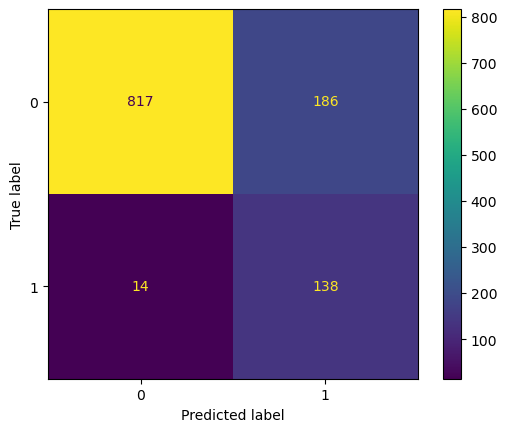

In [283]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,f1_score,recall_score,precision_score
from sklearn.metrics import roc_auc_score,roc_curve

classes = np.unique(y_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_predss, labels=classes)

# Plot the confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
display.plot()

Based on the confusion matrix , it looks like the SVM model predicted:

817 true negatives (customers who were predicted not to churn and did not actually churn)

186 false positives (customers who were predicted to churn but did not actually churn)

14 false negatives (customers who were predicted not to churn but actually churned)

138 true positives (customers who were predicted to churn and actually churned)

### Gradient Boosting

In [284]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the model
gbc = GradientBoostingClassifier()

# Fit the model to the training data
gbc.fit(X_smote, y_smote)

# Make predictions on the test data
y_predg = gbc.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_predg)
precision = precision_score(y_test, y_predg)
recall = recall_score(y_test, y_predg)
f1 = f1_score(y_test, y_predg)

# Print evaluation metrics
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-Score: {:.2f}".format(f1))


Accuracy: 0.91
Precision: 0.62
Recall: 0.88
F1-Score: 0.73


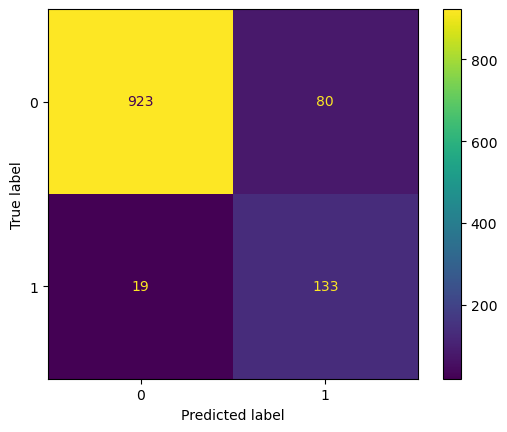

In [286]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,f1_score,recall_score,precision_score
from sklearn.metrics import roc_auc_score,roc_curve

cm = confusion_matrix(y_test, y_predg, labels=gbc.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=gbc.classes_)
display.plot()

In [287]:
cm = confusion_matrix(y_test, y_predg)
cm

array([[923,  80],
       [ 19, 133]], dtype=int64)

Based on the confusion matrix , it looks like the gradient boosting model predicted:

- 923 true negatives (customers who were predicted not to churn and did not actually churn)
- 80 false positives (customers who were predicted to churn but did not actually  churn)
- 19 false negatives (customers who were predicted not to churn but actually churned)
- 133 true positives (customers who were predicted to churn and actually churned)

 However, it appears that the model's precision and recall for the positive class (churned customers) are not as high as they could be. To improve these metrics, you may want to consider adjusting the class weights or optimizing the hyperparameters further

### Hyperparameter for gradient boosting

In [87]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Define the Gradient Boosting model
gbm = GradientBoostingClassifier()

# Define the hyperparameters to be tuned
param_grid = {
    'learning_rate': [0.01, 0.05,1],
    'n_estimators': [5,50,100],
    'max_depth': [1,2,3],
    'min_samples_split': [3,6,12,14,16],
    'min_samples_leaf': [12,13,14]
}

# Define the Grid Search object
grid_search = GridSearchCV(gbm, param_grid, cv=10, scoring='f1')

# Fit the Grid Search object to the data
grid_search.fit(X_smote, y_smote)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the Gradient Boosting model with the best hyperparameters
gbm1 = GradientBoostingClassifier(**best_params)
gbm1.fit(X_smote, y_smote)

# Evaluate the model on the test set
y_predb = gbm1.predict(X_test)

# Print classification report
print(classification_report(y_test, y_predb))
print("Accuracy: {:.2f}".format(accuracy))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       799
           1       0.94      0.91      0.93       125

    accuracy                           0.98       924
   macro avg       0.96      0.95      0.96       924
weighted avg       0.98      0.98      0.98       924



NameError: name 'accuracy' is not defined

In [88]:
# Make predictions on the training set and calculate the accuracy
train_pred = gbm1.predict(X_smote)
train_pred

train_acc = accuracy_score(y_smote, train_pred)
print('train accuracy',train_acc)

train accuracy 0.9842211562736682


In [89]:
y_predb = gbm1.predict(X_test)

# Print classification report
print(accuracy_score(y_test, y_predb))

0.9805194805194806


It seems like the model is not overfitting as both the training accuracy (0.9842) and the test accuracy (0.9805) are relatively high and very close to each other. If the training accuracy was significantly higher than the test accuracy, then we could suspect overfitting.

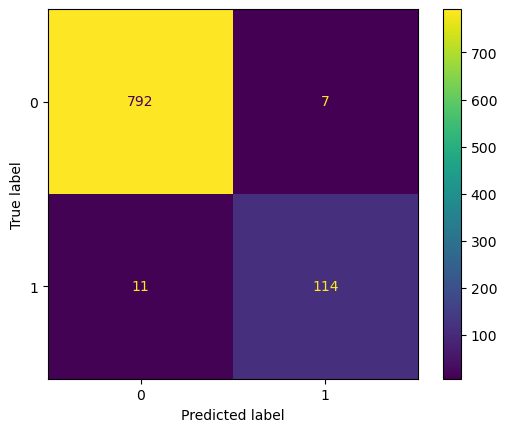

In [90]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,f1_score,recall_score,precision_score
from sklearn.metrics import roc_auc_score,roc_curve

cm = confusion_matrix(y_test, y_predb, labels=gbm1.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=gbm1.classes_)
display.plot()

Based on the confusion matrix , it looks like the after hyperparameter tuning gradient boosting model predicted:

- 792 true negatives (customers who were predicted not to churn and did not actually churn)

- 7 false positives (customers who were predicted to churn but did not actually churn)

- 11 false negatives (customers who were predicted not to churn but actually churned)

- 114 true positives (customers who were predicted to churn and actually churned)

## Decison tree

In [288]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define the Decision Tree model
dt = DecisionTreeClassifier(max_depth=5, random_state=42)

# Fit the model to the training data
dt.fit(X_smote, y_smote)

# Make predictions on the test data
y_preddec = dt.predict(X_test)

# Print classification report and confusion matrix
print(classification_report(y_test, y_preddec))
print(confusion_matrix(y_test, y_preddec))


              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1003
           1       0.63      0.86      0.72       152

    accuracy                           0.91      1155
   macro avg       0.80      0.89      0.84      1155
weighted avg       0.93      0.91      0.92      1155

[[926  77]
 [ 22 130]]


### hyperparameter tuning for decision tree

In [290]:
from sklearn.model_selection import GridSearchCV


# Define the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Define the hyperparameters to tune
params = {
    'max_depth': [3, 5, 7, 9, 11],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

# Create a Grid Search object with 5-fold cross-validation
grid = GridSearchCV(dt, param_grid=params, cv=5, scoring='f1')

# Fit the Grid Search object to the training data
grid.fit(X_smote, y_smote)

# Print the best hyperparameters and their score
print("Best hyperparameters:", grid.best_params_)
print("Best score:", grid.best_score_)

# Use the best hyperparameters to train the model on the full training data
dt = DecisionTreeClassifier(**grid.best_params_, random_state=42)
dt.fit(X_smote, y_smote)

# Make predictions on the test data
y_predd = dt.predict(X_test)

# Print classification report and confusion matrix
print(classification_report(y_test, y_predd))
print(confusion_matrix(y_test, y_predd))




Best hyperparameters: {'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.8916211149054629
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1003
           1       0.89      0.94      0.92       152

    accuracy                           0.98      1155
   macro avg       0.94      0.96      0.95      1155
weighted avg       0.98      0.98      0.98      1155

[[986  17]
 [  9 143]]


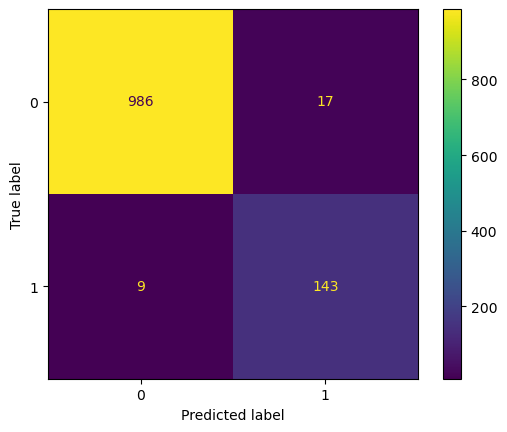

In [291]:
cm = confusion_matrix(y_test, y_predd, labels=dt.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=dt.classes_)
display.plot()

Based on the confusion matrix , it looks like the after hyperparameter tuning gradient boosting model predicted:

986 true negatives (customers who were predicted not to churn and did not actually churn)

17 false positives (customers who were predicted to churn but did not actually churn)

9 false negatives (customers who were predicted not to churn but actually churned)

143 true positives (customers who were predicted to churn and actually churned)

## Project Goal

### Creating Churn risk scores that can be indicative to drive retention campaigns.

In [100]:


# Get the probability estimates for each sample
prob_estimates = gbm1.predict_proba(X)

# Extract the probability estimate for the positive class (churn)
churn_risk_scores = prob_estimates[:, 1]

# Convert the churn risk scores to percentages
churn_risk_percentages = churn_risk_scores * 100

print(churn_risk_scores)



[0.00079052 0.01391763 0.00430099 ... 0.00125751 0.02569031 0.00030168]


In [101]:
churn_risk_scores

array([0.00079052, 0.01391763, 0.00430099, ..., 0.00125751, 0.02569031,
       0.00030168])

In [293]:
#(Lost Customers ÷ Total Customers at the Start of Time Period) x 100
(143/4617)*100

3.0972492960797053

### Introduce new predicting variable “CHURN-FLAG” with values YES(1) or NO(0) so that email campaigns with lucrative offers can be targeted to Churn YES customers.

In [104]:
# trained Gradient boost model and made predictions on a dataset called "df"

# Add a new column called "CHURN-FLAG" to the dataset
df["CHURN-FLAG"] = 0

# For each row in the dataset, set the value of "CHURN-FLAG" to 1 if the churn prediction is "YES"
churn_indices = df[df["Churn"] == 1].index
df.loc[churn_indices, "CHURN-FLAG"] = 1

# Save the modified dataset as a new file or update the existing dataset with the new column
df.to_csv("data_with_churn_flag.csv", index=False)


In [105]:
df.head()

Account_Length  International_Plan  VMail_Plan  Day_Charge  Eve_Charge  \
0        0.622549                 0.0         1.0    0.789899    0.489822   
1        0.519608                 0.0         1.0    0.434343    0.482893   
2        0.666667                 0.0         0.0    0.715354    0.209181   
3        0.406863                 1.0         0.0    0.907677    0.502382   
4        0.362745                 1.0         0.0    0.451919    0.309225   

   Night_Charge  International_Charge  CustServ_Calls  Churn  CHURN-FLAG  
0      0.595935              0.474667        0.111111      0           0  
1      0.622236              0.741333        0.111111      0           0  
2      0.375374              0.632000        0.000000      0           0  
3      0.467424              0.229333        0.222222      0           0  
4      0.440526              0.482667        0.333333      0           0

This new column can be used as a target variable for building and evaluating a classification model to predict customer churn. The model can be trained on the existing features in the dataset and the "CHURN-FLAG" column as the target variable.



### Understanding the variables that are influencing the customers to migrate.

There are two variables that could significantly impact customers' decision to migrate: charges and customer service calls. High charges imposed by the service provider could result in a high rate of churn. Additionally, an increased number of customer service calls may also lead to customers switching to another service provider.





## Conclusion

In a churn telecom model, we should focus more on recall (true positive rate) because it is more important to correctly identify customers who are likely to churn and take proactive measures to retain them. False negatives (missing customers who will churn) can be very costly to the business in terms of lost revenue and customer loyalty.

However, we should also consider precision (positive predictive value) as it is important to avoid falsely identifying customers who are not likely to churn as potential churners, as it may result in unnecessary retention efforts or even alienation of customers.



| Model              | Recall | Precision | F1 Score | False -ve | True +ve
|--------------------|--------|-----------|----------|-----------|-------------
| Gradient Boost     | 91%    | 94%       | 93%      | 11        | 792
| Decision Tree      | 94%    | 89%       | 92%      | 9         | 986
| Logistic Regression| 81%    | 31%       | 45%      | 28        | 591
| SVM                | 91%    | 43%       | 58%      | 14        | 817
| Random Forest      | 87%    | 65%       | 74%      | 16        | 740

### Based on the table, the best performing model for this classification task appears to be Gradient Boost, with a high recall of 91% and precision of 94%, resulting in an overall F1 score of 93%. The Decision Tree model also performed well, with a slightly higher recall of 94%, but slightly lower precision of 89%, resulting in an overall F1 score of 92%.

### The Logistic Regression and SVM models had lower overall performance, with relatively low precision scores of 31% and 43%, respectively. While both models had high recall scores (81% and 91%, respectively), they both had relatively high false negative rates, indicating that they missed a significant number of positive cases.

### The Random Forest model had a good balance of recall and precision, resulting in an F1 score of 74%. While it had a higher recall score of 87%, its precision score of 65% was lower than the Gradient Boost and Decision Tree models.

## Overall, the Gradient Boost and Decision Tree models appear to be the best performing models for this classification task.